<a href="https://colab.research.google.com/github/tpias-thinksense/Accelerometer-APP/blob/main/Sensor_Data_Analysis_Missing_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Developer: Tanmoy Sarkar Pias
Last updated: June 1, 2023

Description:
This code tempalate for analysing missing samples of sensor signals recorded in different device states such as battery conditions, sleeping/active, load, moving etc. 
There are two part of this projects. First one analyze and visualize single state and the second part is for comparing different states. 
```



# Missing Sample Analysis Class





In [52]:
# Import libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Connect to google drive first or upload the file
# This is to set working directory so that can access necessary files just by using name of the file
%cd /content/drive/MyDrive/Dataset/Sensor Data - Missing Samples


'''
Class for missing sensor sample analysis
Variables:
  1. raw_sensor_data: Raw sensor data stored as pandas DataFrame. 
Functions:
  1. Constructor: takes JSON file path as only argument. By default file name set to: 10% bat, speeping, app in backg_acc.txt
  It reads the json file and stores it as a pandas DataFrame for later use. This dataframe can be accessed by raw_sensor_data variable.

  2. trim_data: Takes start time (s) and end time (s) to slice the raw dataframe. 
  It also adds more information in the dataframe such as 
'''
class Missing_Data_Analysis():

  def __init__(self, file = '10% bat, sleeping, app in backg_acc.txt', end_time = 180):
    self.file = file
    self.end_time = end_time
    self.missed_samples_df = None
    with open(self.file,'r') as f:
        data = json.loads(f.read())

    # Normalizing data
    self.raw_sensor_data = pd.json_normalize(data, record_path =['records'], record_prefix='')
    #print(" ------------------------------- Raw data reading complete -------------------------------")
    #print(self.raw_sensor_data)

    self.trim_data()



  '''
  The experiment was run for about 4 minute
  '''
  def trim_data(self, start_time = 30.0, end_time = 180.0):

    dt = [] # keeps sampling period 
    duration = 0 # time from the raw start point (s)
    duration2 = 0 # time from the trimmed start point (s)
    duration_ms2 = 0 # time from the trimmed start point (ms)
    counter = 1 # keep track of number of samples
    ideal_period = 200 #ms
    ideal_duration_ms2 = 0 #ms
    x = self.raw_sensor_data # storing raw sensor data in a temporary variable 


    sensor_dict = {
        'time_stamp (ms)': [], # this is system timestamp taken from raw sensor data
        'sample_count (#)': [], # sample number
         'time elapsed (s)': [], # this elapsed time is calculated from very beginning when raw data was collected
         'time elapsed2 (s)': [], # this elapsed time starts from trimmed data
         'time elapsed2 (ms)': [], # this cumulative elapsed time starts from trimmed data
         'sample period (ms)': [], # this calculates the sampling period 
         'ideal period (ms)': [], # this stores ideal sample period which is 200 for this scenario
         'ideal time elapsed2 (ms)': [], # elapsed time from starts from trimmed data if the sensors acted like ideal 
         'x': [], # x component of  sensor
         'y': [], # y component of  sensor
         'z': [], # z component of  sensor
    }
    
    for i in range(x.shape[0]-1):
      dx = x.iloc[i+1]['timestamp'] - x.iloc[i]['timestamp'] # Sampling period = (i+1)th time stamp - i-th time stamp
      dt.append(dx)
      duration += (dt[-1]/1000) # converting to seconds from miliseconds

      
      if duration >= start_time: # slice by time frame
        duration2 += (dt[-1]/1000) # comulative sampling period in seconds
        duration_ms2 += dt[-1] # comulative sampling period in miliseconds
        ideal_duration_ms2 += ideal_period # comulative ideal sampling period

        if duration2 > end_time:
          break

        sensor_dict['time_stamp (ms)'].append(x.iloc[i+1]['timestamp'])
        sensor_dict['sample_count (#)'].append(counter)
        sensor_dict['time elapsed (s)'].append(round(duration, 3))
        sensor_dict['time elapsed2 (s)'].append(round(duration2, 3))
        sensor_dict['time elapsed2 (ms)'].append(duration_ms2)
        sensor_dict['sample period (ms)'].append(dt[-1])
        sensor_dict['ideal period (ms)'].append(ideal_period)
        sensor_dict['ideal time elapsed2 (ms)'].append(ideal_duration_ms2)
        sensor_dict['x'].append(x.iloc[i+1]['x'])
        sensor_dict['y'].append(x.iloc[i+1]['y'])
        sensor_dict['z'].append(x.iloc[i+1]['z'])

        counter +=1 

        

    self.sensor_data_preprocessed = pd.DataFrame(sensor_dict) # convert dictonary to dataframe
    #print(self.sensor_data_preprocessed)

    #self.sample = [i+1 for i in range(len(self.ideal_dt))]
   #print("------------------------------- Data Preprocess Complete -------------------------------")
    

  def process_all_data(self, start_time = 30.0, end_time = 180.0):

    dt = [] # keeps sampling period 
    duration = 0 # time from the raw start point (s)
    duration2 = 0 # time from the trimmed start point (s)
    duration_ms2 = 0 # time from the trimmed start point (ms)
    counter = 1 # keep track of number of samples
    ideal_period = 200 #ms
    ideal_duration_ms2 = 0 #ms
    x = self.raw_sensor_data # storing raw sensor data in a temporary variable 


    sensor_dict = {
        'time_stamp (ms)': [], # this is system timestamp taken from raw sensor data
        'sample_count (#)': [], # sample number
         'time elapsed (s)': [], # this elapsed time is calculated from very beginning when raw data was collected
         'time elapsed2 (s)': [], # this elapsed time starts from trimmed data
         'time elapsed2 (ms)': [], # this cumulative elapsed time starts from trimmed data
         'sample period (ms)': [], # this calculates the sampling period 
         'ideal period (ms)': [], # this stores ideal sample period which is 200 for this scenario
         'ideal time elapsed2 (ms)': [], # elapsed time from starts from trimmed data if the sensors acted like ideal 
         'x': [], # x component of  sensor
         'y': [], # y component of  sensor
         'z': [], # z component of  sensor
    }
    
    for i in range(x.shape[0]-1):
      dx = x.iloc[i+1]['timestamp'] - x.iloc[i]['timestamp'] # Sampling period = (i+1)th time stamp - i-th time stamp
      dt.append(dx)
      duration += (dt[-1]/1000) # converting to seconds from miliseconds
      
      if duration >= start_time: # slice by time frame
        duration2 += (dt[-1]/1000) # comulative sampling period in seconds
        duration_ms2 += dt[-1] # comulative sampling period in miliseconds
        ideal_duration_ms2 += ideal_period # comulative ideal sampling period

      sensor_dict['time_stamp (ms)'].append(x.iloc[i+1]['timestamp'])
      sensor_dict['sample_count (#)'].append(counter)
      sensor_dict['time elapsed (s)'].append(round(duration, 3))
      sensor_dict['time elapsed2 (s)'].append(round(duration2, 3))
      sensor_dict['time elapsed2 (ms)'].append(duration_ms2)
      sensor_dict['sample period (ms)'].append(dt[-1])
      sensor_dict['ideal period (ms)'].append(ideal_period)
      sensor_dict['ideal time elapsed2 (ms)'].append(ideal_duration_ms2)
      sensor_dict['x'].append(x.iloc[i+1]['x'])
      sensor_dict['y'].append(x.iloc[i+1]['y'])
      sensor_dict['z'].append(x.iloc[i+1]['z'])

      counter +=1 

        

    self.sensor_data_preprocessed_all = pd.DataFrame(sensor_dict) # convert dictonary to dataframe
    return self.sensor_data_preprocessed_all
    #print(self.sensor_data_preprocessed)

    #self.sample = [i+1 for i in range(len(self.ideal_dt))]
   #print("------------------------------- Data Preprocess Complete -------------------------------")


  '''
  this method returns preprocessed sensor data
  '''
  def print_preprocessed_data(self):
    display(self.sensor_data_preprocessed)
  
  '''
  this method return raw sensor data
  '''
  def print_raw_data(self):
    display(self.raw_sensor_data)
  

  '''
  Description: this method calculates missing samples within a given window (interval)

  Input arguments:
  starting_time = start time of the window in ms
  ending_time = end time of the window in ms
  verbose = 1 => to print information and calculation, 0 => no print

  Return:
  total missing samples (#) within the given window
  '''
  def missing_samples(self, starting_time = 0, ending_time = 14000, verbose = 0):
    
    # slice by time frame
    total_recorded_samples = self.sensor_data_preprocessed[ (self.sensor_data_preprocessed['time elapsed2 (ms)'] >= starting_time) &  (self.sensor_data_preprocessed['time elapsed2 (ms)'] <= ending_time)].shape[0]
    self.sampling_rate = 200 #ms
    total_expected_samples = (ending_time //self.sampling_rate  - starting_time //self.sampling_rate )
    total_missing_samples = total_expected_samples - total_recorded_samples

    if verbose == 1:
      print("Start time (ms): ", starting_time)
      print("End time (ms): ", ending_time)
      print("Time frame (ms): ", ending_time - starting_time)
      print('Ideal sampling period (ms): ', self.sampling_rate)
      if total_recorded_samples != 0:
        print("Average sampling period (ms): ", (ending_time - starting_time)//total_recorded_samples)
      print('total_expected_samples (#): ', total_expected_samples)
      print('total_recorded_samples (#): ', total_recorded_samples)
      print('total_missing_samples (#): ', total_missing_samples)
      print("------------------------------------------")
      
    return [total_expected_samples, total_recorded_samples, total_missing_samples]


  '''
  Description: This method calculates missing samples for the given interval

  Input arguments:
  interval = takes the interval in seconds

  Return:
  A pandas DataFrame containing missing sample count for every interval (ms)
  '''

  def calculate_missing_interval(self, interval = 1, end_time = 180):
  
    interval_ms = interval*1000
    interval_start = []
    interval_end = []
    interval_start_end = []

    x = [] #missing_sample_counts
    r = [] #recoreded sample count
    point = 0 #pointer moves along the row

    time_elapsed_ms = self.sensor_data_preprocessed['time elapsed2 (ms)'].to_list()

    if end_time == -1:
      end_time = time_elapsed_ms[-1]/1000

    # if the given interval is larger than the recorded time, set interval to
    # max recoreded time
    if interval > end_time:
      print(f"Given interval {interval}s is larger than total sensor reading time {time_elapsed_ms[-1]/1000}s")
      print(f"Interval is now set to {end_time/1000}s")
      interval_ms = end_time*1000

    # loop until the las recoreded sample
    #while point+interval_ms <= time_elapsed_ms[-1]:
    while point+interval_ms <= end_time*1000: #180s is the ending time of the experiment
      result = self.missing_samples(point+1, point+interval_ms)
      missed = result[2]
      recorded = result[1]

      x.append(missed)   
      r.append(recorded)

      interval_start.append(point+1)
      interval_end.append(point+interval_ms)
      interval_start_end.append(str(point+1)+"-"+str(point+interval_ms))

      point = point+interval_ms

    # this is to acomodate the extra faction of interval at the end
    # this is not required if the ending time is 180s
    # if point < time_elapsed_ms[-1]:
    #   result = self.missing_samples(point+1, time_elapsed_ms[-1])
    #   missed = result[2]
    #   recorded = result[1]

    #   x.append(missed)   
    #   r.append(recorded)

    #   interval_start.append(point+1)
    #   interval_end.append(time_elapsed_ms[-1])
    #   interval_start_end.append(str(point+1)+"-"+str(time_elapsed_ms[-1]))
    
    
    d = {
        'interval_start': interval_start,
         'interval_end' : interval_end,
         'interval': interval_start_end,
         'missed samples': x,
         'recorded samples': r
    }

    self.missed_samples_df = pd.DataFrame(d)
    return self.missed_samples_df



  '''
  Description: Plots the missing sample count for the given interval
  '''
  def plot_missing_intervals(self, interval = 1):
      self.calculate_missing_interval(interval)

      # this section adds a dummy row at the end 
      # to show the very last x_tick correctly 
      df = self.missed_samples_df
      interval_start = df['interval_start'].to_list()
      interval_end = df['interval_end'].to_list()
      diff = interval_end[-1] - interval_start[-1]
      new_row = {'interval_start': interval_end[-1], 'interval_end': interval_end[-1]+diff,  'missed samples': 0}
      df = df.append(new_row, ignore_index= True)
      
      plt.rcParams["figure.figsize"] = (20,6)
      bar_plot = df.plot.bar(x='interval_start', y='missed samples', rot=90, align='edge', width = 0.9)

      # Set labels and title
      plt.xlabel('Sampling Interval (ms)')
      plt.ylabel('Missed Samples (#)')
      title = str(self.file) + ": Missing Sample interval: " + str(interval) + "s = " +str(interval*1000) + "ms"
      plt.title(title)

      #self.set_tick_font(df)

      plt.show()

  

  '''
  Description: Plots the missing sample count for the given interval. 
  Uses color map for better visualization
  '''
  def plot_missing_intervals_color(self, interval = 1):
    self.calculate_missing_interval(interval)
    plt.rcParams["figure.figsize"] = (20,6)
    #plt.rcParams.update({'font.size': 16})

    # this section adds a dummy row at the end 
    # to show the very last x_tick correctly 
    df = self.missed_samples_df
    interval_start = df['interval_start'].to_list()
    interval_end = df['interval_end'].to_list()
    diff = interval_end[-1] - interval_start[-1]
    new_row = {'interval_start': interval_end[-1], 'interval_end': interval_end[-1]+diff,  'missed samples': 0}
    df = df.append(new_row, ignore_index= True)

    # Define a color map
    color_map = 'rainbow' #'coolwarm'
    # Normalize the values between 0 and 1
    norm = plt.Normalize(df['missed samples'].min(), df['missed samples'].max())
    # Create the color list using the color map
    colors = plt.cm.get_cmap(color_map)(norm(df['missed samples']))

    bar_plot = df.plot.bar(x='interval_start', y='missed samples', rot=90, align='edge', width = 0.9, color=colors, alpha=0.5, legend=False)


    # Set labels and title
    plt.xlabel('Sampling Interval (ms)', fontsize=12)
    plt.ylabel('Missed Samples (#)', fontsize=12)
    title = str(self.file[:-4]) + ": Missing Sample interval: " + str(interval) + "s = " +str(interval*1000) + "ms"
    plt.title(title, fontsize=12)  

    #self.set_tick_font(df)

    # Add a color bar
    sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, alpha=0.5)


    # Show the plot
    plt.show()


  '''
  An intenal method which sets the x tick values
  based on the x length, so that the x ticks
  doesn't overlap
  '''
  def set_tick_font(self, df):
    return
    
    interval_start = df['missed samples'].to_list()
    info_count = len(interval_start)

    if info_count > 50:
      plt.tick_params(labelsize=5)
    if info_count > 30:
      plt.tick_params(labelsize=8)
    elif info_count > 20:
      plt.tick_params(labelsize=12)
    else:
      plt.tick_params(labelsize=14)


  '''
  Description: Calculates the missing sample count for each window. 
  The window size is defined by the interval argument.
  The window stride is defines by the slide variable.
  if slide variable is not given, it sets slide = interval which makes 
  this method same as calculate_missing_interval. 

  Return:
  A dataframe containing missing sample counts for each window
  '''
  
  def calculate_missing_window(self, interval = 1, slide = -1):

    # if interval is not given, slide is set to interval
    if slide == -1:
      slide = interval

    # convert s to ms
    interval_ms = interval*1000
    slide_ms = slide*1000

    interval_start = []
    interval_end = []
    intervals_start_end = []

    x = [] # missing sample counts
    r = [] #recorded sample counts
    point = 0 # a pointer moves along the rows
    time_elapsed_ms = self.sensor_data_preprocessed['time elapsed2 (ms)'].to_list()

    # if the given interval is larger than the recorded time, set interval to
    # max recoreded time
    if interval_ms > time_elapsed_ms[-1]:
      print(f"Given interval {interval}s is larger than total sensor reading time {time_elapsed_ms[-1]/1000}s")
      print(f"Interval is now set to {time_elapsed_ms[-1]/1000}s")
      interval_ms = time_elapsed_ms[-1]

    # loop until last record
    while point+interval_ms <= time_elapsed_ms[-1]:
      result = self.missing_samples(point+1, point+interval_ms)
      missed = result[2]
      recorded = result[1]

      x.append(missed)
      r.append(recorded)
      interval_start.append(point+1)
      interval_end.append(point+interval_ms)
      intervals_start_end.append(str(point+1) + "-" + str(point+interval_ms))

      point = point+slide_ms
    
    d = {
        'interval_start': interval_start,
         'interval_end' : interval_end,
         'intervals':intervals_start_end,
         'missed samples': x,
         'recorded samples': r
    }

    self.missed_samples_window_df = pd.DataFrame(d)
    return self.missed_samples_window_df


  '''
  Plots missing samples for given window 
  '''
  def plot_missing_window(self, interval = 1, slide = -1):
    self.calculate_missing_window(interval, slide)
    plt.rcParams["figure.figsize"] = (20,6)

    df = self.missed_samples_window_df
    df.plot.bar(x = 'intervals', y = 'missed samples' , width = 0.9)

    # Set labels and title
    plt.xlabel('Sampling Interval (ms)')
    plt.ylabel('Missed Samples (#)')
    title = str(self.file) + ": Missing Sample interval: " + str(interval) + "s = " +str(interval*1000) + "ms"
    plt.title(title)

    #self.set_tick_font(df)

    plt.show()


  '''
  Plots missing samples for given window. Adds a color scale for better
  visualization.
  '''
  
  def plot_missing_window_color(self, interval = 1, slide = -1):
    self.calculate_missing_window(interval, slide)
    plt.rcParams["figure.figsize"] = (20,6)

    df = self.missed_samples_window_df
    
    x = df['intervals'].to_list()
    y = df['missed samples'].to_list()


    # Define color map and normalize the values
    color_map = plt.cm.get_cmap('rainbow')
    values = df['missed samples'].to_list()
    normalize = plt.Normalize(vmin=min(values), vmax=max(values))

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=color_map, norm=normalize)
    sm.set_array([])  # Set an empty array to avoid error
    plt.colorbar(sm, alpha=0.5)
    plt.xticks(rotation=90)
    plt.xlim([-0.5,len(x)-0.5])

    plt.bar(x, y, color=color_map(normalize(values)), alpha=0.5)

    # Set labels and title
    plt.xlabel('Sampling Interval (ms)')
    plt.ylabel('Missed Samples (#)')
    title = str(self.file) + ": Missing Sample interval: " + str(interval) + "s = " +str(interval*1000) + "ms"
    plt.title(title)

    plt.show()

  
  def calculate__missing_distribution(self, intervals = [1]):

    for i in intervals:
      MSI = self.calculate_missing_interval(i)

      data = MSI['missed samples'].to_list()

      # Calculate mean and standard deviation
      mean = np.mean(data)
      std_dev = np.std(data)

      print(f"Inerval {i}: Mean: ", mean)
      print(f"Interval {i}: Standard Deviation: ", std_dev) 



  def plot_missing_sample_distribution(self, intervals = [1]):

    for i in intervals:
      MSI = self.calculate_missing_interval(i)
      data = MSI['missed samples'].to_list()

      # Calculate mean and standard deviation
      mean = np.mean(data)
      std_dev = np.std(data)

      # Generate values for x-axis (range around mean)
      x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)

      # Calculate the corresponding y-values using the normal distribution equation
      y = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

      # Plot the normal distribution
      plt.plot(x, y, label="Interval " + str(i) + "s Mean: "+ str(round(mean, 2)) + " SD: " + str(round(std_dev, 2)) )

    # Add labels and title
    plt.xlabel('Missing Sample Count (#)')
    plt.ylabel('Probability Density')
    plt.title('Normal Distribution of Missing Samples')
    plt.legend()

    # Show the plot
    plt.show()

  
  def plot_sampling_count_distribution(self, intervals = [1]):

    for i in intervals:
      MSI = self.calculate_missing_interval(i)
      data = MSI['recorded samples'].to_list()

      # Calculate mean and standard deviation
      mean = np.mean(data)
      std_dev = np.std(data)

      # Generate values for x-axis (range around mean)
      x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)

      # Calculate the corresponding y-values using the normal distribution equation
      y = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

      # Plot the normal distribution
      plt.plot(x, y, label="Interval " + str(i) + "s Mean: "+ str(round(mean, 2)) + " SD: " + str(round(std_dev, 2)) )

    # Add labels and title
    plt.xlabel('Recorded Sample Count (#)')
    plt.ylabel('Probability Density')
    plt.title('Normal Distribution of Recorded Samples')
    plt.legend()

    # Show the plot
    plt.show()

  
  def plot_sampling_period_distribution(self):

    data = self.sensor_data_preprocessed['sample period (ms)'].to_list()

    # Calculate mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)
    print(mean, std_dev)

    # Generate values for x-axis (range around mean)
    x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)

    # Calculate the corresponding y-values using the normal distribution equation
    y = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plot the normal distribution
    plt.plot(x, y, label="Mean: "+ str(round(mean, 2)) + " SD: " + str(round(std_dev, 2)) )

    # Add labels and title
    plt.xlabel('Sampling Period (ms)')
    plt.ylabel('Probability Density')
    plt.title('Normal Distribution')

    # Show the plot
    plt.show()


  def missing_sample_pdf(self, interval = 1):
    MSI_1 = self.calculate_missing_interval(interval)
    numbers = MSI_1['missed samples'].to_list()

    # Count the frequency of each number
    counts = np.bincount(numbers)

    # Generate x-axis values
    x = np.arange(len(counts))

    # Plot the distribution
    plt.bar(x, counts)
    plt.xlabel('Missing Sample')
    plt.ylabel('Frequency')
    plt.title('Discrete Variable Distribution (pdf)')
    plt.xticks(x, rotation = 90)
    plt.show()



  '''
  Plots cummulative sample period for each sample. Adds a color bar for 
  better visualization.
  '''

  def plot1(self):
    
    trimmed_dt_cm = self.sensor_data_preprocessed['time elapsed2 (ms)'].to_list()
    sample = [i+1 for i in range(len(trimmed_dt_cm))]
    trimmed_dt = self.sensor_data_preprocessed['sample period (ms)'].to_list()
    
    # Create subplots
    fig, ax = plt.subplots()

    # Plot data with different sampling frequencies
    plot = ax.scatter(x=trimmed_dt_cm, y=sample, vmin=0, vmax=10000, c =trimmed_dt, cmap = 'viridis', s=20)
    # Set plot title and labels
    ax.set_title(self.file)
    ax.set_xlabel('Elapsed Time (ms)')
    ax.set_ylabel('n-th Sample')

    # # Specify x-axis step
    # plt.xticks(range(0, trimmed_dt_cm[-1], 10000), rotation = 90)  # Start: 1, Stop: 6, Step: 2

    # # Specify y-axis step
    # plt.yticks(range(1, len(trimmed_dt_cm)+1, 5))  # Start: 10, Stop: 20, Step: 2

    # Add legend
    ax.legend()

    # Show the plot
    plt.rcParams["figure.figsize"] = (6,6)

    plt.colorbar(plot)
    plt.grid()
    plt.show()


  '''
  Plots cummulative sample period for each sample and compares with ideal 
  sampling period. 
  '''

  def plot2(self):

    trimmed_dt_cm = self.sensor_data_preprocessed['time elapsed2 (ms)'].to_list()
    sample = [i+1 for i in range(len(trimmed_dt_cm))]
    trimmed_dt = self.sensor_data_preprocessed['sample period (ms)'].to_list()
    ideal_dt_cm = self.sensor_data_preprocessed['ideal time elapsed2 (ms)'].to_list() 

    # Create subplots
    fig, ax = plt.subplots()

    # Plot data with different sampling frequencies
    ax.scatter(ideal_dt_cm, sample, label='Ideal', s=10)
    ax.scatter(trimmed_dt_cm, sample, label='real',s=10)

    # Set plot title and labels
    plt.xticks(rotation=90)
    ax.set_title(self.file[:-4])
    ax.set_xlabel('Elapsed Time (ms)')
    ax.set_ylabel('n-th Sample')

    # Add legend
    ax.legend()

    #plt.rcParams["figure.figsize"] = (6,6)

    # Show the plot
    plt.grid()
    plt.show()


  '''
  Shows the sampling period for each sample
  '''
  def plot3(self, ylim=(190, 1000)):
    
    trimmed_dt_cm = self.sensor_data_preprocessed['time elapsed2 (ms)'].to_list()
    sample = [i+1 for i in range(len(trimmed_dt_cm))]
    trimmed_dt = self.sensor_data_preprocessed['sample period (ms)'].to_list()
    ideal_dt_cm = self.sensor_data_preprocessed['ideal time elapsed2 (ms)'].to_list() 
    ideal_dt = self.sensor_data_preprocessed['ideal period (ms)'].to_list() 


    # Create subplots
    fig, ax = plt.subplots()

    # Plot data with different sampling frequencies
    ax.scatter( sample, ideal_dt, label='ideal')
    ax.scatter( sample, trimmed_dt, label='real')


    # Set plot title and labels
    ax.set_title(self.file[:-4])
    ax.set_xlabel('n-th sample')
    ax.set_ylabel('Sampling time (ms)')
    #plt.ylim(ylim)

    # Add legend
    ax.legend()

    plt.rcParams["figure.figsize"] = (6,6)

    # Show the plot
    plt.grid()
    plt.show()
  
  def plot3_log(self, ylim = (2.0,5.0)):
    
    
    trimmed_dt = np.array(self.sensor_data_preprocessed['sample period (ms)'].to_list())
    ideal_dt = np.array(self.sensor_data_preprocessed['ideal period (ms)'].to_list())
    sample = [i+1 for i in range(len(trimmed_dt))]


    trimmed_dt_log = np.log10(trimmed_dt)
    ideal_dt_log = np.log10(ideal_dt)

    # Create subplots
    fig, ax = plt.subplots()

    # Plot data with different sampling frequencies
    ax.scatter( sample, ideal_dt_log, label='ideal sensor sample (5Hz)')
    ax.scatter( sample, trimmed_dt_log, label='real sensor sample')

    # Set plot title and labels
    ax.set_title(self.file[:-4])
    ax.set_xlabel('n-th sample')
    ax.set_ylabel('log10 ( elapsed time (ms) between\n two consecutive samples )')
    plt.ylim(ylim)

    # Add legend
    ax.legend()

    #plt.rcParams["figure.figsize"] = (6,6)

    # Show the plot
    plt.grid()
    plt.show()

  def plot_pmf(self, interval = 1):

    MSI_1 = self.calculate_missing_interval(interval)

    # Example list of numbers
    numbers = MSI_1['missed samples'].to_list()

    # Count the frequency of each number
    counts = np.bincount(numbers)

    # Integer to divide by
    divisor = sum(counts)

    # Divide each number by the divisor using a list comprehension
    probability = [num / divisor for num in counts]

    # Generate x-axis values
    x = np.arange(len(counts))


    # Define color map and normalize the values
    color_map = plt.cm.get_cmap('rainbow')
    normalize = plt.Normalize(vmin=min(probability), vmax=max(probability))

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=color_map, norm=normalize)
    sm.set_array([])  # Set an empty array to avoid error
    plt.colorbar(sm, alpha=0.5)

    plt.rcParams["figure.figsize"] = (8,6)
    # Plot the distribution
    plt.bar(x, probability, color=color_map(normalize(probability)), alpha=0.5)


    # Add value labels to each bar
    for i in range(len(probability)):
      v = probability[i]
      plt.text(i, v, str(counts[i]), ha='center', va='bottom')

    txt = "Figure caption"
    plt.xlabel('Missed Sample Count - Interval: ' + str(interval) + "s")
    plt.ylabel('Probability of Missing Samples')
    plt.title(self.file[:-4] + ' - pmf plot')
    plt.xticks(x, rotation = 90)
    plt.show()



  def plot_cmf(self, interval=1):
    MSI_1 = self.calculate_missing_interval(interval)

    # Example list of numbers
    numbers = MSI_1['missed samples'].to_list()

    # Count the frequency of each number
    counts = np.bincount(numbers)

    cmf = [counts[0]]

    for i in range(1, len(counts)):
      cmf.append(counts[i] + cmf[i-1])

    # Integer to divide by
    divisor = sum(cmf)

    # Divide each number by the divisor using a list comprehension
    probability = [num / divisor for num in cmf]

    # Generate x-axis values
    x = np.arange(len(cmf))


    # Define color map and normalize the values
    color_map = plt.cm.get_cmap('rainbow')
    normalize = plt.Normalize(vmin=min(probability), vmax=max(probability))

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=color_map, norm=normalize)
    sm.set_array([])  # Set an empty array to avoid error
    plt.colorbar(sm, alpha=0.5)

    plt.rcParams["figure.figsize"] = (8,6)
    # Plot the distribution
    plt.bar(x, probability, color=color_map(normalize(probability)), alpha=0.5)


    # Add value labels to each bar
    for i in range(len(probability)):
      v = probability[i]
      plt.text(i, v, str(cmf[i]), ha='center', va='bottom')

    txt = "Figure caption"
    plt.xlabel('Missed Sample Count - Interval: ' + str(interval) + "s")
    plt.ylabel('Probability')
    plt.title('Missing Sample Distribution - cmf plot')
    plt.xticks(x, rotation = 90)
    plt.show()

/content/drive/MyDrive/Dataset/Sensor Data - Missing Samples


# Accelerometer


## 10% bat, sleeping, app in backg_acc_moving

In [ ]:
obj = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc.txt')

In [ ]:
obj.print_raw_data() #12.366 AM

Acc_timestamp      Acc_x      Acc_y        Acc_z
0    1678595952366   2.242673   9.499506    -1.244866
1    1678595952657  2.2558336  9.5048895   -1.1497513
2    1678595952950  2.3700907   9.503095   -1.2209377
3    1678595953239   2.210968   9.529416  -0.87338024
4    1678595953531  2.2582264   9.544372     -1.14018
..             ...        ...        ...          ...
141  1678596328041  2.9635108   9.323035   -1.1048858
142  1678596328331  2.9102705   9.312267   -1.2532408
143  1678596328623  2.8929226   9.347562   -1.1958131
144  1678596328914   2.906083   9.330214   -1.0695918
145  1678596329207  2.5896323    9.38824   -1.3016955

[146 rows x 4 columns]

In [ ]:
obj.sensor_data_preprocessed

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0     1678595982451                 1            30.085              0.290   
1     1678595982744                 2            30.378              0.583   
2     1678595983033                 3            30.667              0.872   
3     1678595983327                 4            30.961              1.166   
4     1678595983618                 5            31.252              1.457   
..              ...               ...               ...                ...   
76    1678596109347                77           156.981            127.186   
77    1678596109567                78           157.201            127.406   
78    1678596109859                79           157.493            127.698   
79    1678596110150                80           157.784            127.989   
80    1678596110441                81           158.075            128.280   

    time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                  290                 290                200   
1                  583                 293                200   
2                  872                 289                200   
3                 1166                 294                200   
4                 1457                 291                200   
..                 ...                 ...                ...   
76              127186               30848                200   
77              127406                 220                200   
78              127698                 292                200   
79              127989                 291                200   
80              128280                 291                200   

    ideal time elapsed2 (ms)        Acc_x        Acc_y     Acc_z  
0                        200    -0.503091   0.10827523  9.684352  
1                        400   -0.5132605   0.11006984  9.702896  
2                        600   -0.5054838   0.10289137  9.684352  
3                        800   -0.5102694    0.1058824  9.699904  
4                       1000  -0.50368917    0.0951147   9.69153  
..                       ...          ...          ...       ...  
76                     15400   -0.4989035   0.07597212  9.690333  
77                     15600  -0.48753762    0.0951147  9.688539  
78                     15800  -0.48873404  0.093918286  9.689137  
79                     16000  -0.48873404   0.09810573  9.690931  
80                     16200  -0.48993045  0.101694964  9.693923  

[81 rows x 11 columns]

In [ ]:
# parameterize
obj.missing_samples(0, 12000, verbose=1)

Start time (ms):  0
End time (ms):  12000
Time frame (ms):  12000
Ideal sampling period (ms):  200
Average sampling period (ms):  444
total_expected_samples (#):  60
total_recorded_samples (#):  27
total_missing_samples (#):  33
------------------------------------------


[60, 27, 33]

In [ ]:
obj.calculate_missing_interval(1) #s

interval_start  interval_end       interval  missed samples  \
0                 1          1000         1-1000               2   
1              1001          2000      1001-2000               2   
2              2001          3000      2001-3000               1   
3              3001          4000      3001-4000               2   
4              4001          5000      4001-5000               1   
..              ...           ...            ...             ...   
175          175001        176000  175001-176000               5   
176          176001        177000  176001-177000               5   
177          177001        178000  177001-178000               5   
178          178001        179000  178001-179000               5   
179          179001        180000  179001-180000               5   

     recorded samples  
0                   3  
1                   3  
2                   4  
3                   3  
4                   4  
..                ...  
175                 0  
176                 0  
177                 0  
178                 0  
179                 0  

[180 rows x 5 columns]

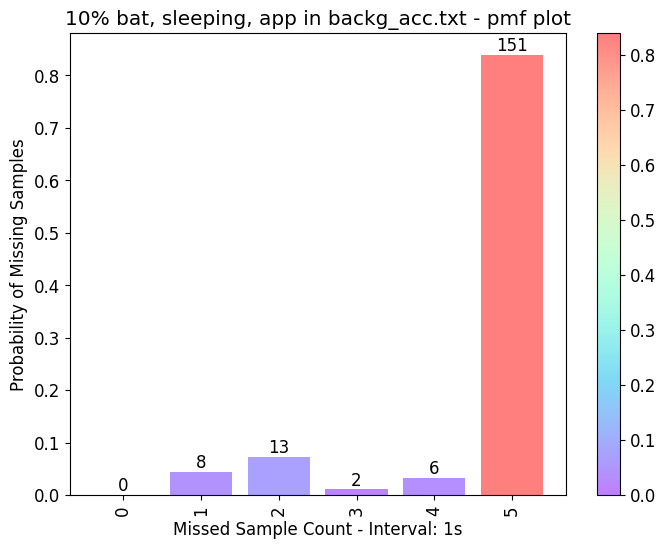

In [ ]:
plt.rcParams['font.size'] = 12
obj.plot_pmf(1)

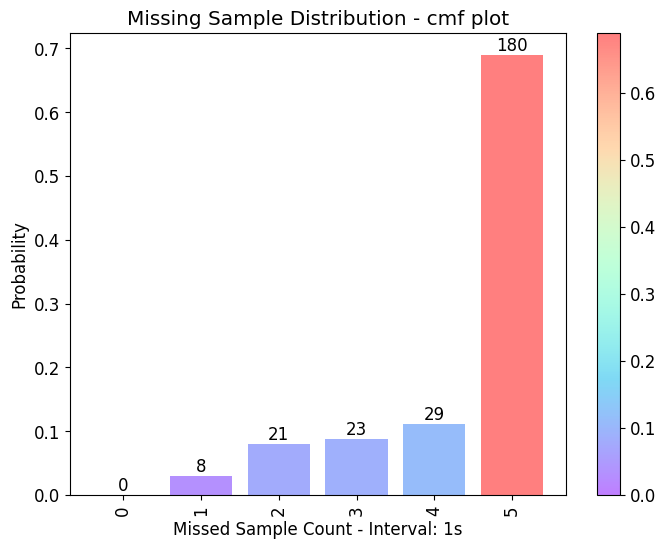

In [ ]:
obj.plot_cmf(1)

In [ ]:
obj.calculate_missing_interval(0.5) #s

interval_start  interval_end           interval  missed samples  \
0               1.0         500.0            1-500.0             1.0   
1             501.0        1000.0       501.0-1000.0             1.0   
2            1001.0        1500.0      1001.0-1500.0             0.0   
3            1501.0        2000.0      1501.0-2000.0             2.0   
4            2001.0        2500.0      2001.0-2500.0             0.0   
..              ...           ...                ...             ...   
355        177501.0      178000.0  177501.0-178000.0             3.0   
356        178001.0      178500.0  178001.0-178500.0             2.0   
357        178501.0      179000.0  178501.0-179000.0             3.0   
358        179001.0      179500.0  179001.0-179500.0             2.0   
359        179501.0      180000.0  179501.0-180000.0             3.0   

     recorded samples  
0                   1  
1                   2  
2                   2  
3                   1  
4                   2  
..                ...  
355                 0  
356                 0  
357                 0  
358                 0  
359                 0  

[360 rows x 5 columns]

In [ ]:
obj.calculate_missing_interval(10000) #s

Given interval 10000s is larger than total sensor reading time 128.28s
Interval is now set to 0.18s


interval_start  interval_end  interval  missed samples  recorded samples
0               1        180000  1-180000             819                81

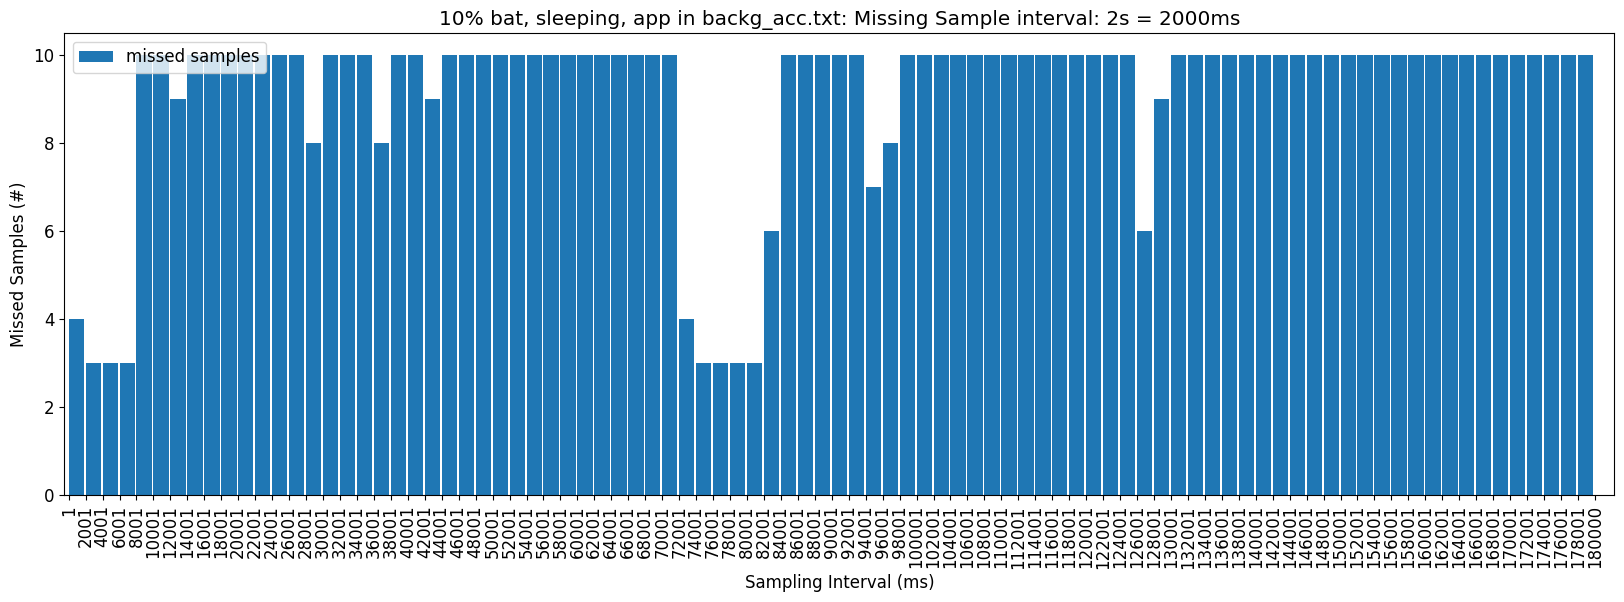

In [ ]:
obj.plot_missing_intervals(2)

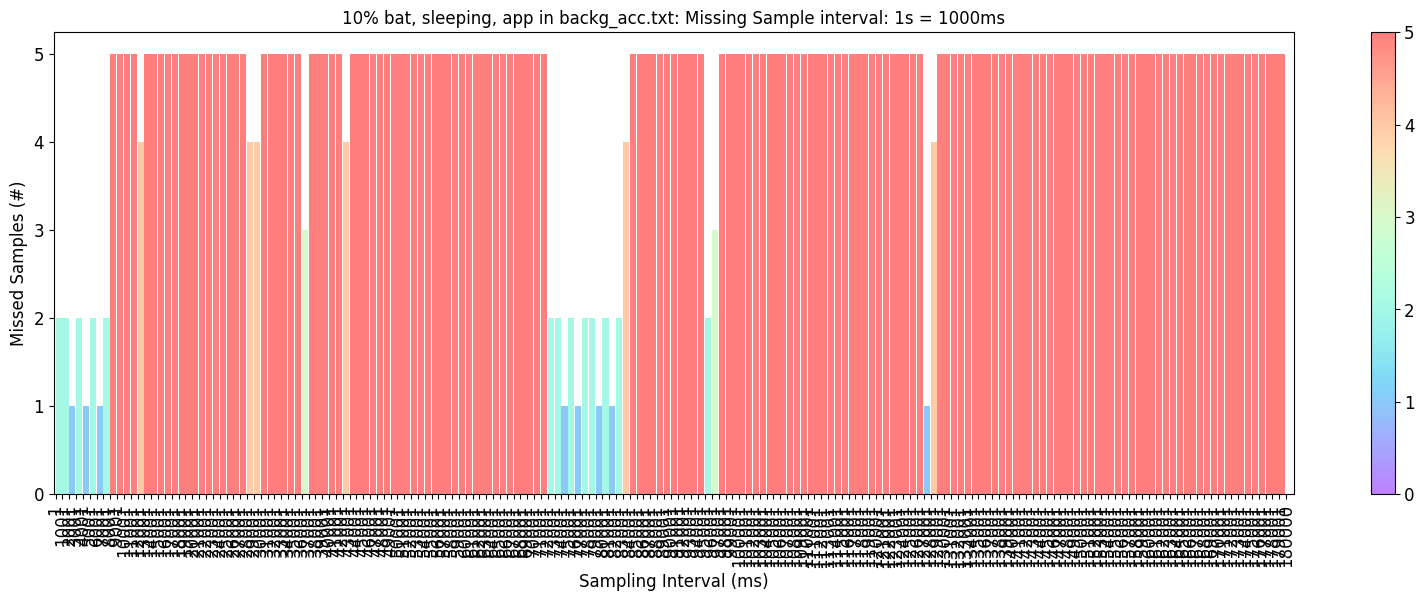

In [ ]:
#plt.rcParams['font.size'] = 5
obj.plot_missing_intervals_color(1) #s # get rid of the color lagend

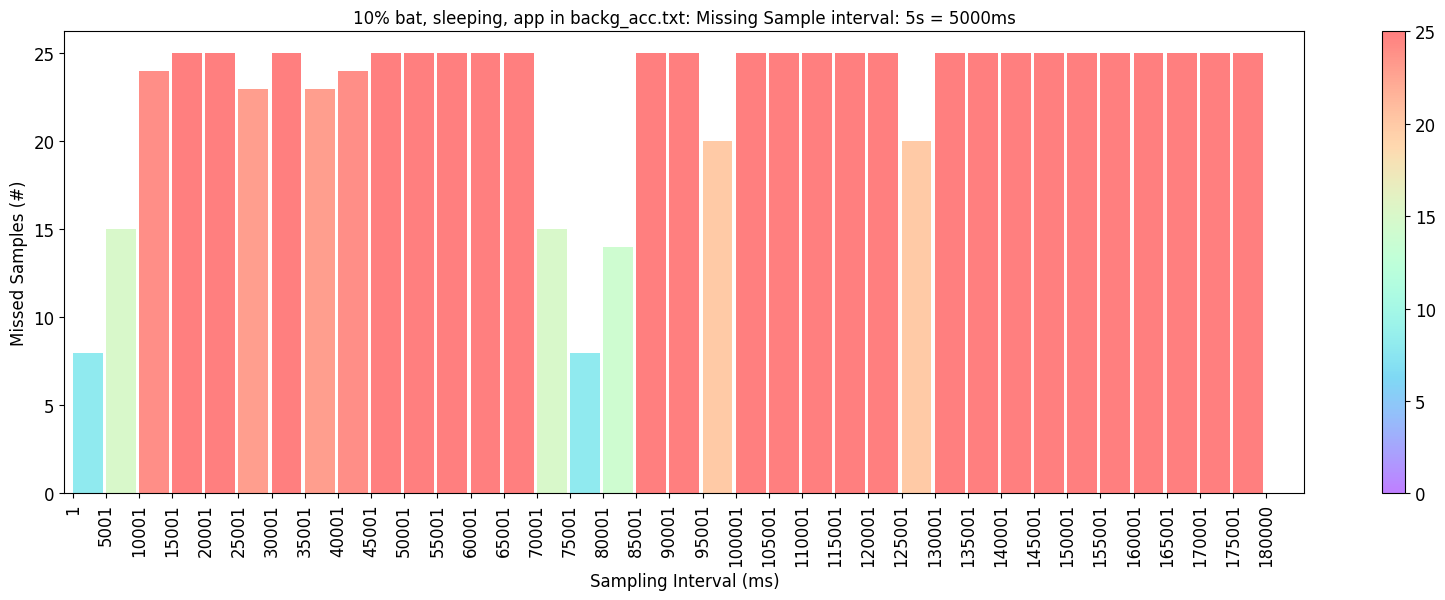

In [ ]:
obj.plot_missing_intervals_color(5) #s # get rid of the color lagend

In [ ]:
obj.calculate_missing_window(10, 5)

interval_start  interval_end      intervals  missed samples  \
0                1         10000        1-10000              23   
1             5001         15000     5001-15000              39   
2            10001         20000    10001-20000              49   
3            15001         25000    15001-25000              50   
4            20001         30000    20001-30000              48   
5            25001         35000    25001-35000              48   
6            30001         40000    30001-40000              48   
7            35001         45000    35001-45000              47   
8            40001         50000    40001-50000              49   
9            45001         55000    45001-55000              50   
10           50001         60000    50001-60000              50   
11           55001         65000    55001-65000              50   
12           60001         70000    60001-70000              50   
13           65001         75000    65001-75000              40   
14           70001         80000    70001-80000              23   
15           75001         85000    75001-85000              22   
16           80001         90000    80001-90000              39   
17           85001         95000    85001-95000              50   
18           90001        100000   90001-100000              45   
19           95001        105000   95001-105000              45   
20          100001        110000  100001-110000              50   
21          105001        115000  105001-115000              50   
22          110001        120000  110001-120000              50   
23          115001        125000  115001-125000              50   

    recorded samples  
0                 27  
1                 11  
2                  1  
3                  0  
4                  2  
5                  2  
6                  2  
7                  3  
8                  1  
9                  0  
10                 0  
11                 0  
12                 0  
13                10  
14                27  
15                28  
16                11  
17                 0  
18                 5  
19                 5  
20                 0  
21                 0  
22                 0  
23                 0

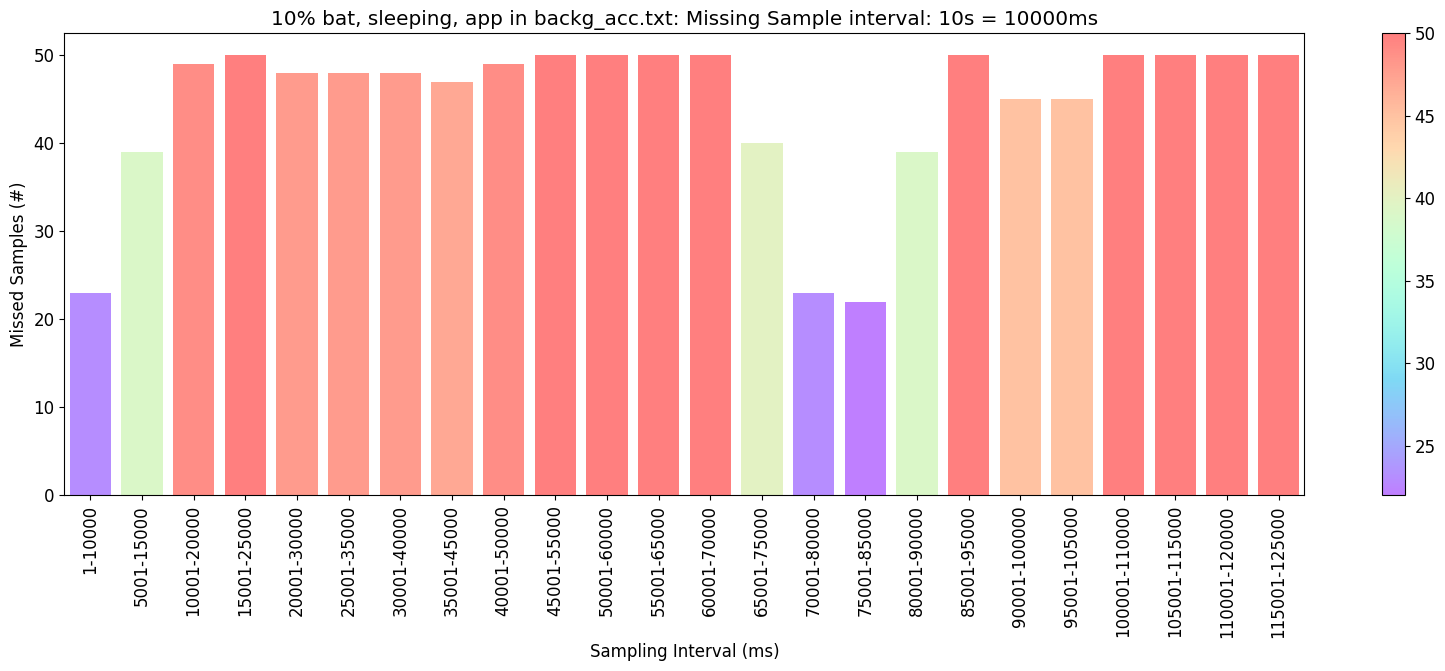

In [ ]:
obj.plot_missing_window_color(10,5)

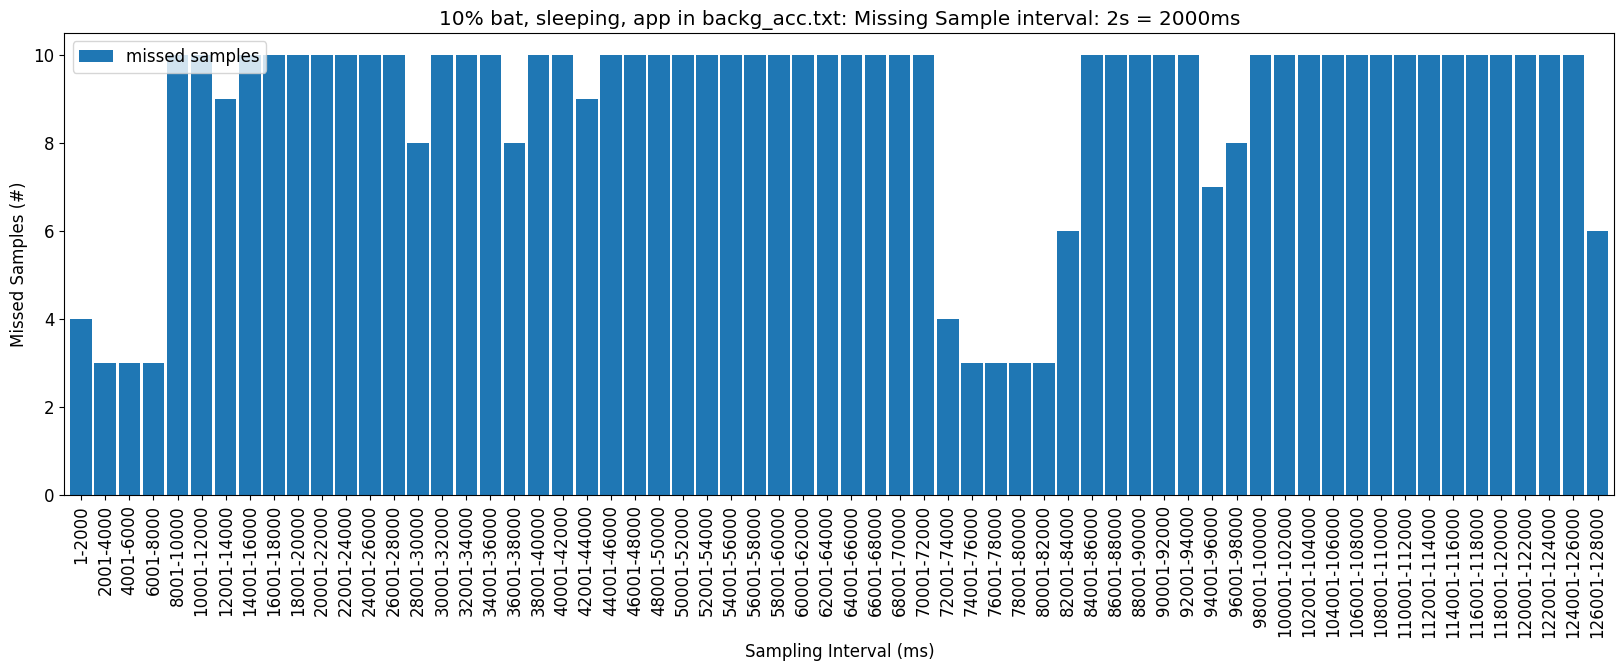

In [ ]:
obj.plot_missing_window(2)

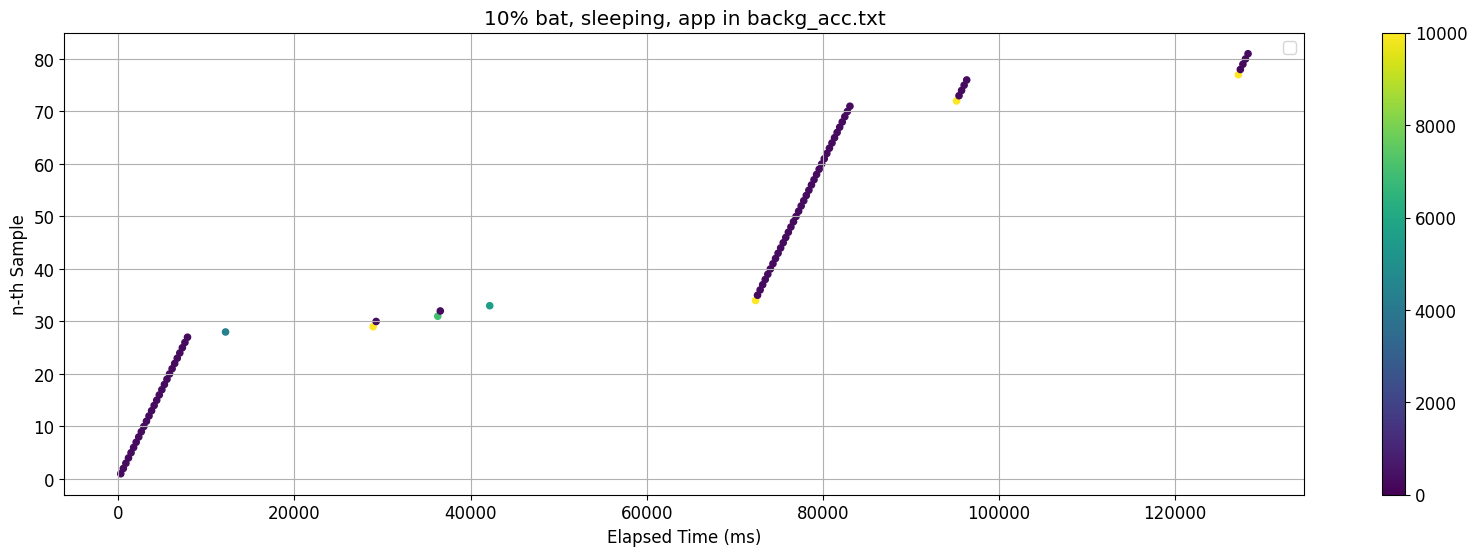

In [ ]:
obj.plot1()

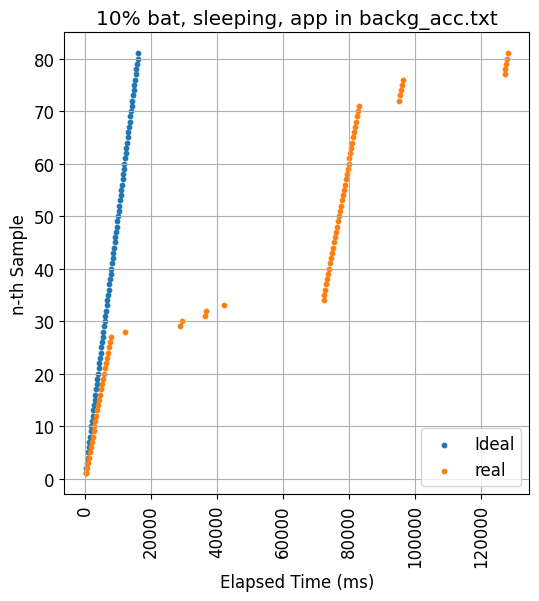

In [ ]:
obj.plot2()

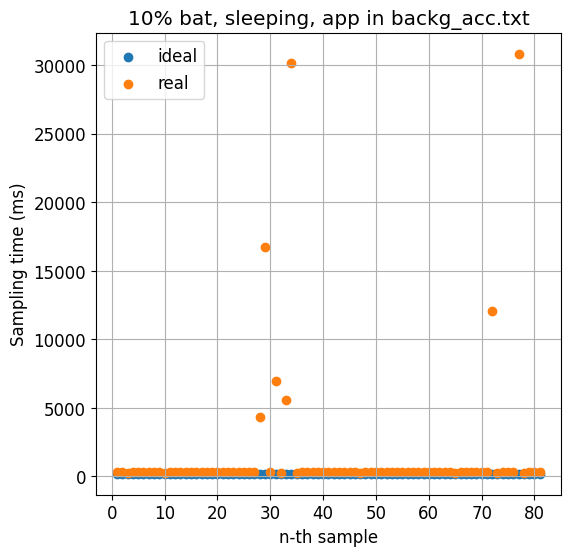

In [ ]:
obj.plot3()

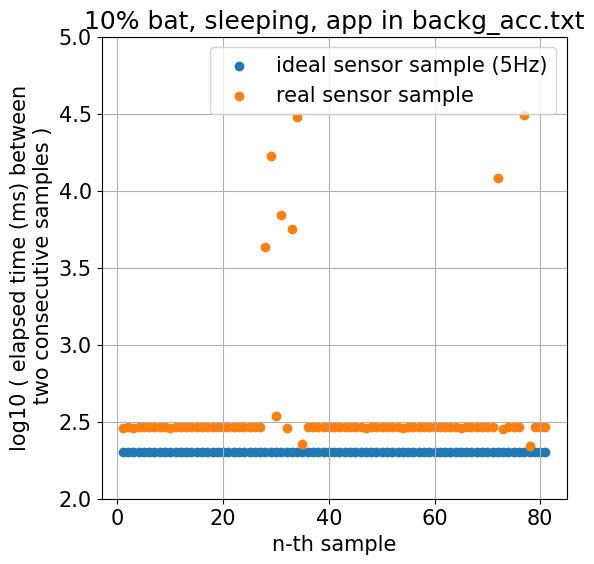

In [ ]:
plt.rcParams['font.size'] = 15
obj.plot3_log()

## 10% bat, speeping, app in backg_acc_moving.txt

Acc_timestamp         Acc_x      Acc_y      Acc_z
0    1680235602274    -1.7186449   5.029713   7.791629
1    1680235602566    -1.0594223   4.347759   8.889935
2    1680235602856  -0.024526432  3.9128633   7.896913
3    1680235603147    0.15134603   4.305286   8.833703
4    1680235603439     1.4901303  5.1990056   8.356933
..             ...           ...        ...        ...
307  1680235923633     -0.401396   8.152945  5.3359947
308  1680235923925   -0.30867413  7.9854474    5.48076
309  1680235924216    -1.1503495    8.41795  4.5619164
310  1680235924510   -0.74895346   8.328817  5.1062837
311  1680235924800   -0.89431745   8.505288   4.875974

[312 rows x 4 columns]

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0      1680235633983                 1            31.709              6.814   
1      1680235634310                 2            32.036              7.141   
2      1680235647503                 3            45.229             20.334   
3      1680235647768                 4            45.494             20.599   
4      1680235648059                 5            45.785             20.890   
..               ...               ...               ...                ...   
139    1680235805772               140           203.498            178.603   
140    1680235806064               141           203.790            178.895   
141    1680235806354               142           204.080            179.185   
142    1680235806647               143           204.373            179.478   
143    1680235806938               144           204.664            179.769   

     time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                  6814                6814                200   
1                  7141                 327                200   
2                 20334               13193                200   
3                 20599                 265                200   
4                 20890                 291                200   
..                  ...                 ...                ...   
139              178603                 291                200   
140              178895                 292                200   
141              179185                 290                200   
142              179478                 293                200   
143              179769                 291                200   

     ideal time elapsed2 (ms)      Acc_x       Acc_y       Acc_z  
0                         200   9.614362   0.9302098   1.9728823  
1                         400   9.527023    0.634098  -3.1561332  
2                         600   9.352347   1.6546369  -3.8991046  
3                         800    8.22772   1.2897314   5.1003013  
4                        1000  9.4534445   1.0767702   1.3369896  
..                        ...        ...         ...         ...  
139                     28000   9.296116   0.6556334    3.269194  
140                     28200   9.293125  0.87338024   1.6911274  
141                     28400   8.193623   2.9533412   5.2947183  
142                     28600  6.6849484   3.0999017    7.536195  
143                     28800   8.099705   1.3130615     5.06082  

[144 rows x 11 columns]

Start time (ms):  0
End time (ms):  1200
Time frame (ms):  1200
Ideal sampling period (ms):  200
total_expected_samples (#):  6
total_recorded_samples (#):  0
total_missing_samples (#):  6
------------------------------------------


interval_start  interval_end       interval  missed samples  \
0                 1          1000         1-1000               5   
1              1001          2000      1001-2000               5   
2              2001          3000      2001-3000               5   
3              3001          4000      3001-4000               5   
4              4001          5000      4001-5000               5   
..              ...           ...            ...             ...   
175          175001        176000  175001-176000               1   
176          176001        177000  176001-177000               2   
177          177001        178000  177001-178000               2   
178          178001        179000  178001-179000               1   
179          179001        180000  179001-180000               2   

     recorded samples  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
..                ...  
175                 4  
176                 3  
177                 3  
178                 4  
179                 3  

[180 rows x 5 columns]

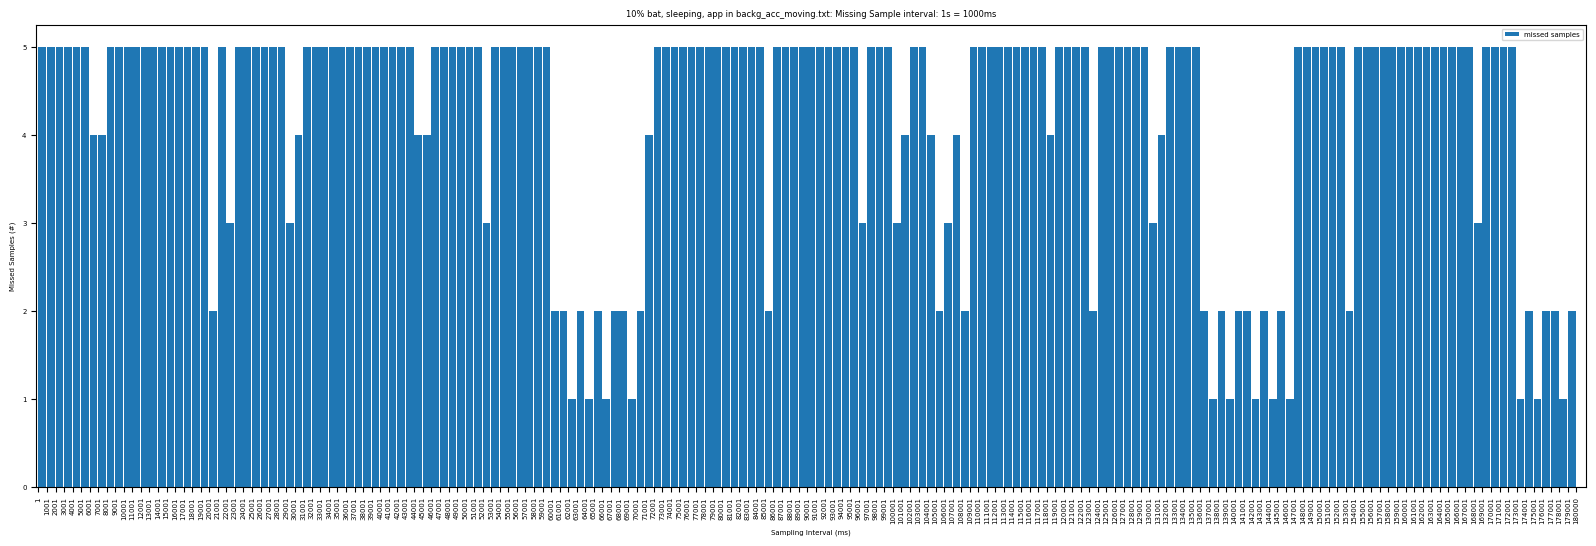

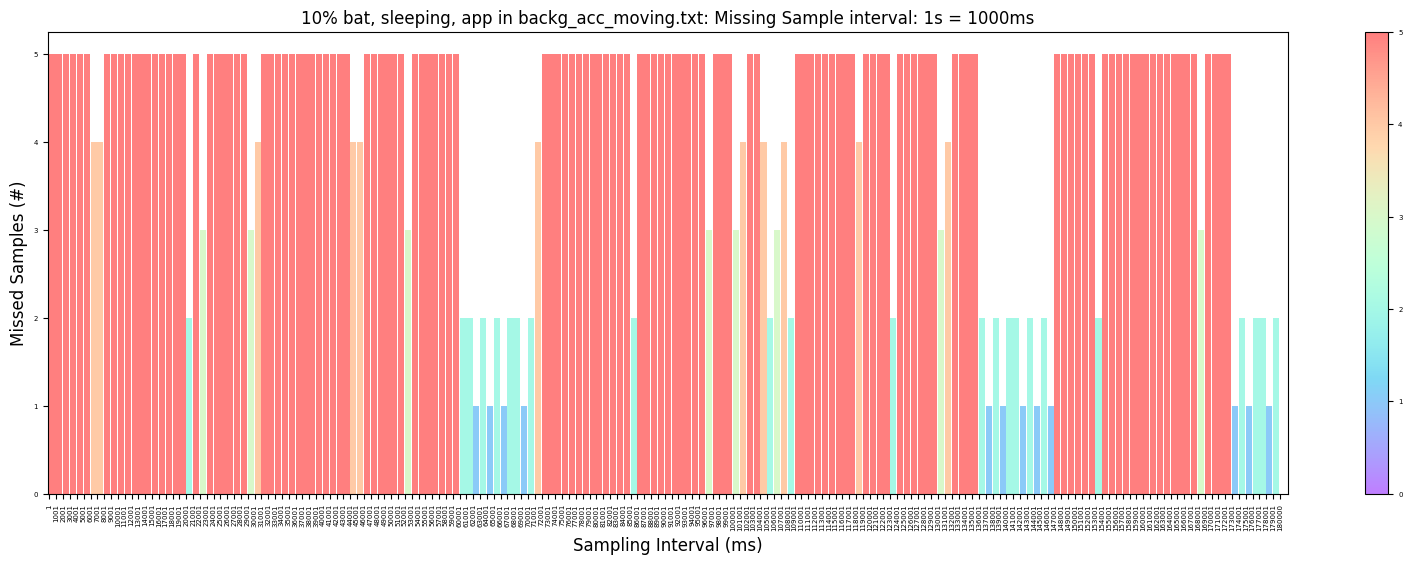

interval_start  interval_end      intervals  missed samples  \
0                1          5000         1-5000              25   
1             3001          8000      3001-8000              23   
2             6001         11000     6001-11000              23   
3             9001         14000     9001-14000              25   
4            12001         17000    12001-17000              25   
5            15001         20000    15001-20000              25   
6            18001         23000    18001-23000              20   
7            21001         26000    21001-26000              23   
8            24001         29000    24001-29000              25   
9            27001         32000    27001-32000              22   
10           30001         35000    30001-35000              24   
11           33001         38000    33001-38000              25   
12           36001         41000    36001-41000              25   
13           39001         44000    39001-44000              25   
14           42001         47000    42001-47000              23   
15           45001         50000    45001-50000              24   
16           48001         53000    48001-53000              23   
17           51001         56000    51001-56000              23   
18           54001         59000    54001-59000              25   
19           57001         62000    57001-62000              19   
20           60001         65000    60001-65000               8   
21           63001         68000    63001-68000               8   
22           66001         71000    66001-71000               8   
23           69001         74000    69001-74000              17   
24           72001         77000    72001-77000              25   
25           75001         80000    75001-80000              25   
26           78001         83000    78001-83000              25   
27           81001         86000    81001-86000              22   
28           84001         89000    84001-89000              22   
29           87001         92000    87001-92000              25   
30           90001         95000    90001-95000              25   
31           93001         98000    93001-98000              23   
32           96001        101000   96001-101000              21   
33           99001        104000   99001-104000              22   
34          102001        107000  102001-107000              19   
35          105001        110000  105001-110000              16   
36          108001        113000  108001-113000              22   
37          111001        116000  111001-116000              25   
38          114001        119000  114001-119000              24   
39          117001        122000  117001-122000              24   
40          120001        125000  120001-125000              22   
41          123001        128000  123001-128000              22   
42          126001        131000  126001-131000              23   
43          129001        134000  129001-134000              22   
44          132001        137000  132001-137000              22   
45          135001        140000  135001-140000              11   
46          138001        143000  138001-143000               8   
47          141001        146000  141001-146000               8   
48          144001        149000  144001-149000              14   
49          147001        152000  147001-152000              25   
50          150001        155000  150001-155000              22   
51          153001        158000  153001-158000              22   
52          156001        161000  156001-161000              25   
53          159001        164000  159001-164000              25   
54          162001        167000  162001-167000              25   
55          165001        170000  165001-170000              23   
56          168001        173000  168001-173000              23   
57          171001        176000  171001-176000              14   
58          174001        179000  174001-179000    

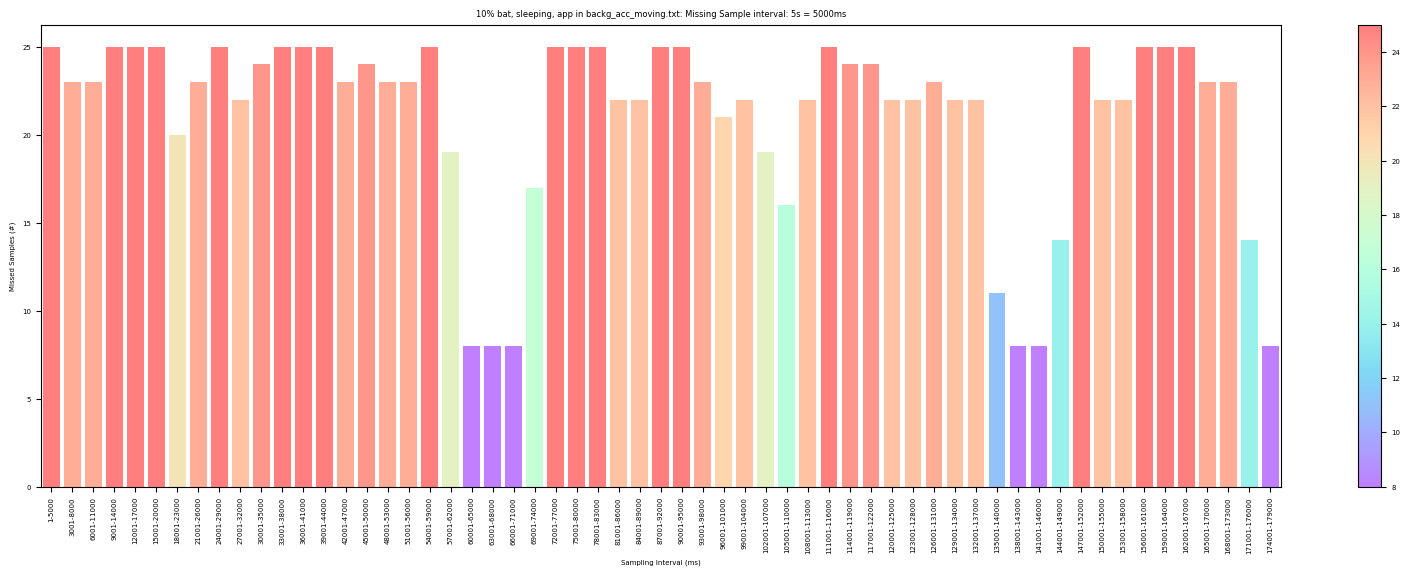

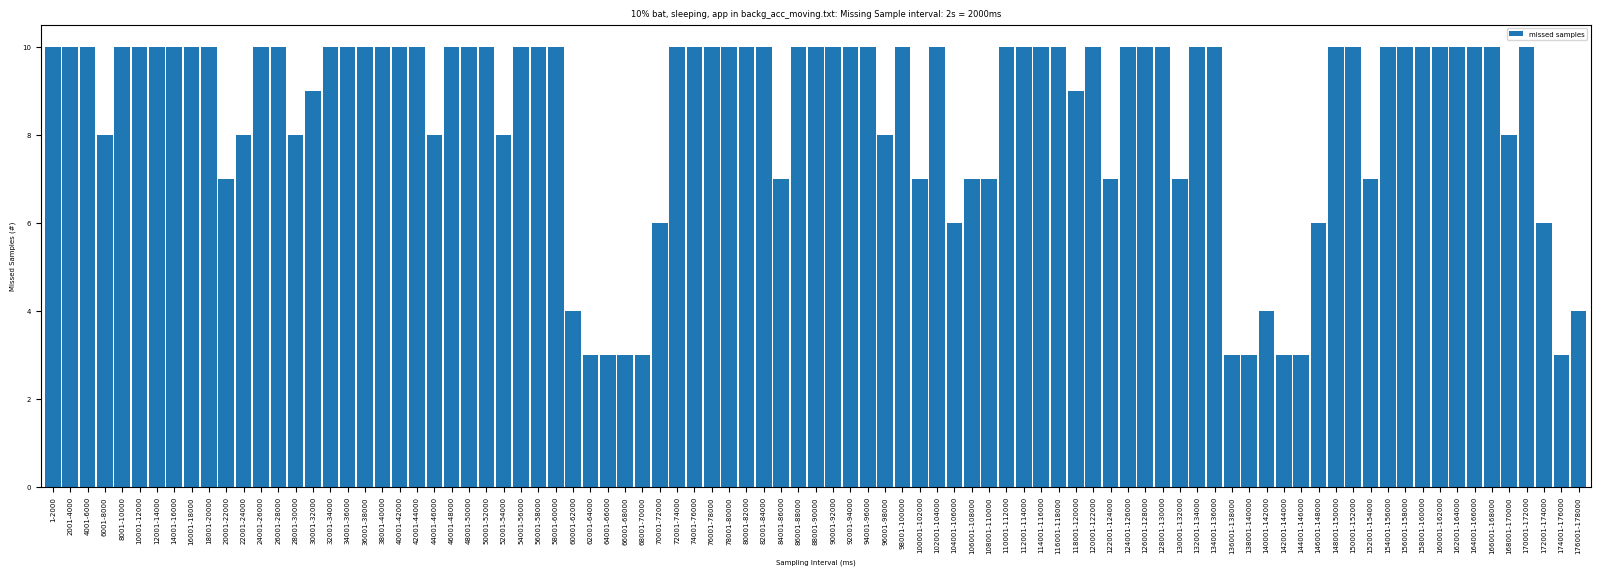

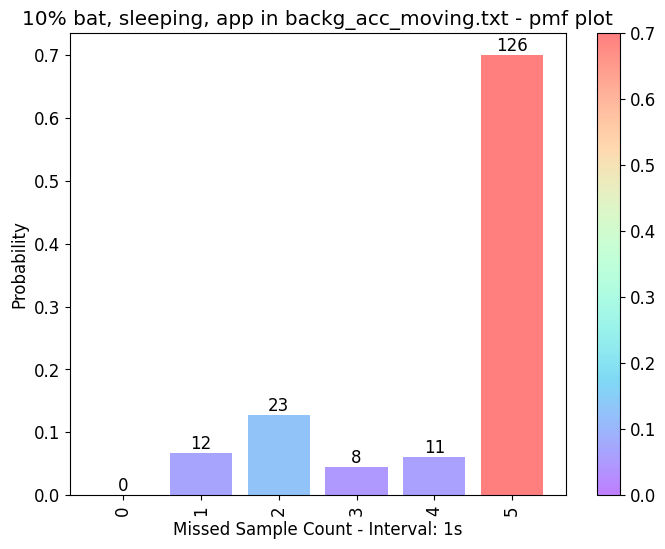

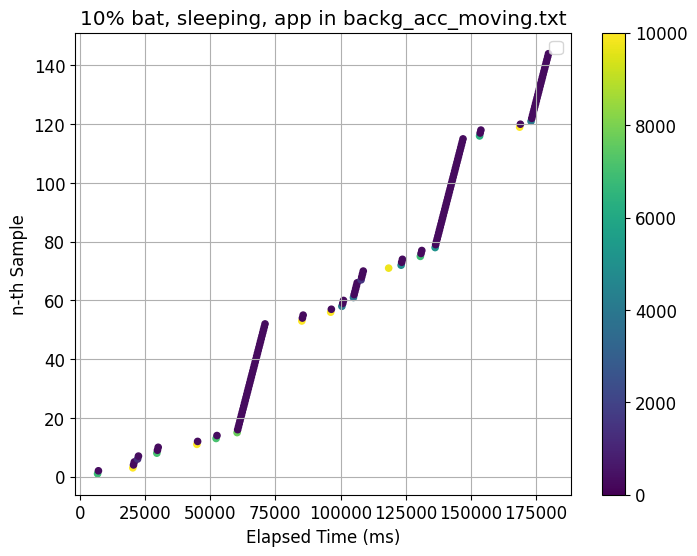

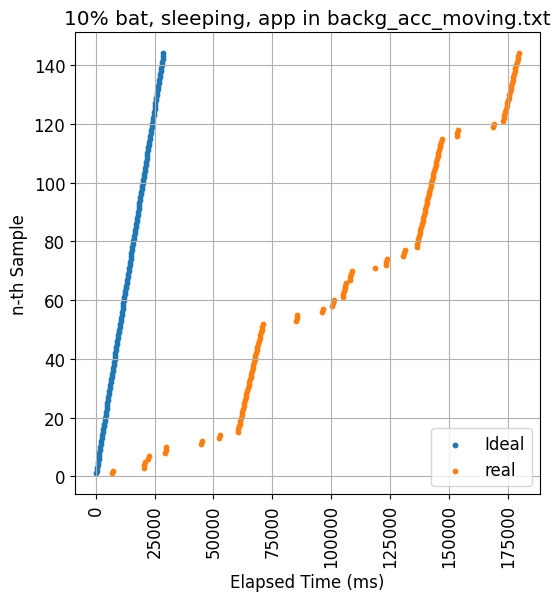

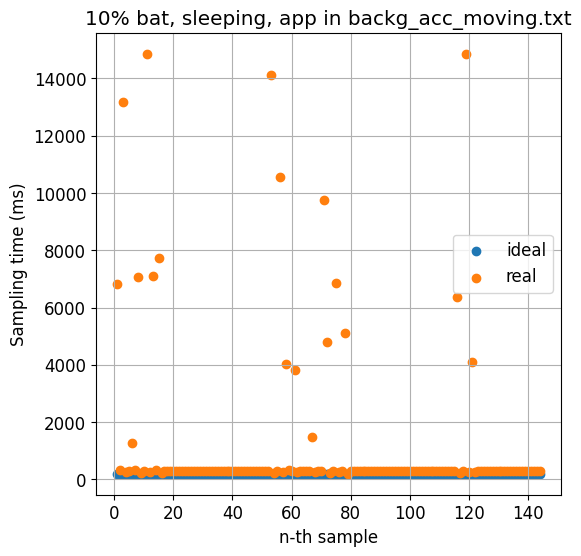

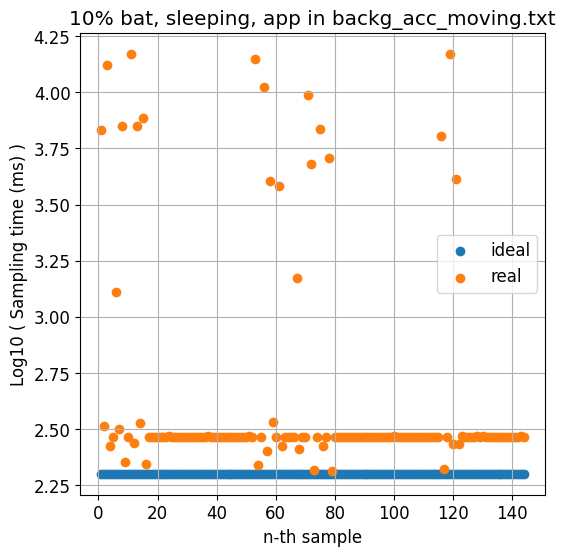

In [ ]:
obj = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc_moving.txt')


obj.print_raw_data()
obj.print_preprocessed_data()

obj.missing_samples(0, 1200, verbose=1)
display(obj.calculate_missing_interval(1))

plt.rcParams['font.size'] = 5
obj.plot_missing_intervals(1)
plt.rcParams['font.size'] = 5
obj.plot_missing_intervals_color(1)

display(obj.calculate_missing_window(5, 3))
obj.plot_missing_window_color(5,3)
obj.plot_missing_window(2)

plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (8,6)
obj.plot_pmf(1)

obj.plot1()
obj.plot2()
obj.plot3()
obj.plot3_log()


## 100% bat, speeping, app in bkgr_acc.txt

Acc_timestamp      Acc_x     Acc_y         Acc_z
0    1678656023140  1.2107682   9.76152    -0.9732806
1    1678656023432  1.5457634  9.731011   -0.74536425
2    1678656023723  1.9651057  9.597013   -0.05742774
3    1678656024015  1.9657038  9.613763   -0.11964113
4    1678656024304  2.0195422  9.630513   -0.50009996
..             ...        ...       ...           ...
227  1678656410314   2.370689  9.568299  0.0035892338
228  1678656410605   2.449054  9.528818   0.111266255
229  1678656410897  2.2360928   9.58804   -0.28175488
230  1678656411189   1.698904  9.717253   -0.76989067
231  1678656411480   1.942972  9.635299   -0.42771706

[232 rows x 4 columns]

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0     1678656060861                 1            37.721             29.071   
1     1678656061075                 2            37.935             29.285   
2     1678656061365                 3            38.225             29.575   
3     1678656084506                 4            61.366             52.716   
4     1678656084821                 5            61.681             53.031   
..              ...               ...               ...                ...   
81    1678656165695                82           142.555            133.905   
82    1678656165987                83           142.847            134.197   
83    1678656176292                84           153.152            144.502   
84    1678656176622                85           153.482            144.832   
85    1678656190138                86           166.998            158.348   

    time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                29071               29071                200   
1                29285                 214                200   
2                29575                 290                200   
3                52716               23141                200   
4                53031                 315                200   
..                 ...                 ...                ...   
81              133905                 291                200   
82              134197                 292                200   
83              144502               10305                200   
84              144832                 330                200   
85              158348               13516                200   

    ideal time elapsed2 (ms)        Acc_x       Acc_y     Acc_z  
0                        200   -0.6693921   0.8536395  9.634102  
1                        400   -0.6472585  0.86979103   9.64128  
2                        600  -0.64965135  0.87996054  9.649655  
3                        800   -0.6448657   0.8751749  9.635299  
4                       1000   -0.6520442   0.8673982  9.641879  
..                       ...          ...         ...       ...  
81                     16400   -0.6472585   0.8632108  9.645468  
82                     16600  -0.64905316   0.8709874  9.650253  
83                     16800   -0.6466603      0.8668  9.646067  
84                     17000   -0.6430711  0.86979103  9.641879  
85                     17200  -0.65024954  0.86979103  9.646067  

[86 rows x 11 columns]

Start time (ms):  0
End time (ms):  1200
Time frame (ms):  1200
Ideal sampling period (ms):  200
total_expected_samples (#):  6
total_recorded_samples (#):  0
total_missing_samples (#):  6
------------------------------------------


interval_start  interval_end       interval  missed samples  \
0                 1          1000         1-1000               5   
1              1001          2000      1001-2000               5   
2              2001          3000      2001-3000               5   
3              3001          4000      3001-4000               5   
4              4001          5000      4001-5000               5   
..              ...           ...            ...             ...   
175          175001        176000  175001-176000               5   
176          176001        177000  176001-177000               5   
177          177001        178000  177001-178000               5   
178          178001        179000  178001-179000               5   
179          179001        180000  179001-180000               5   

     recorded samples  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
..                ...  
175                 0  
176                 0  
177                 0  
178                 0  
179                 0  

[180 rows x 5 columns]

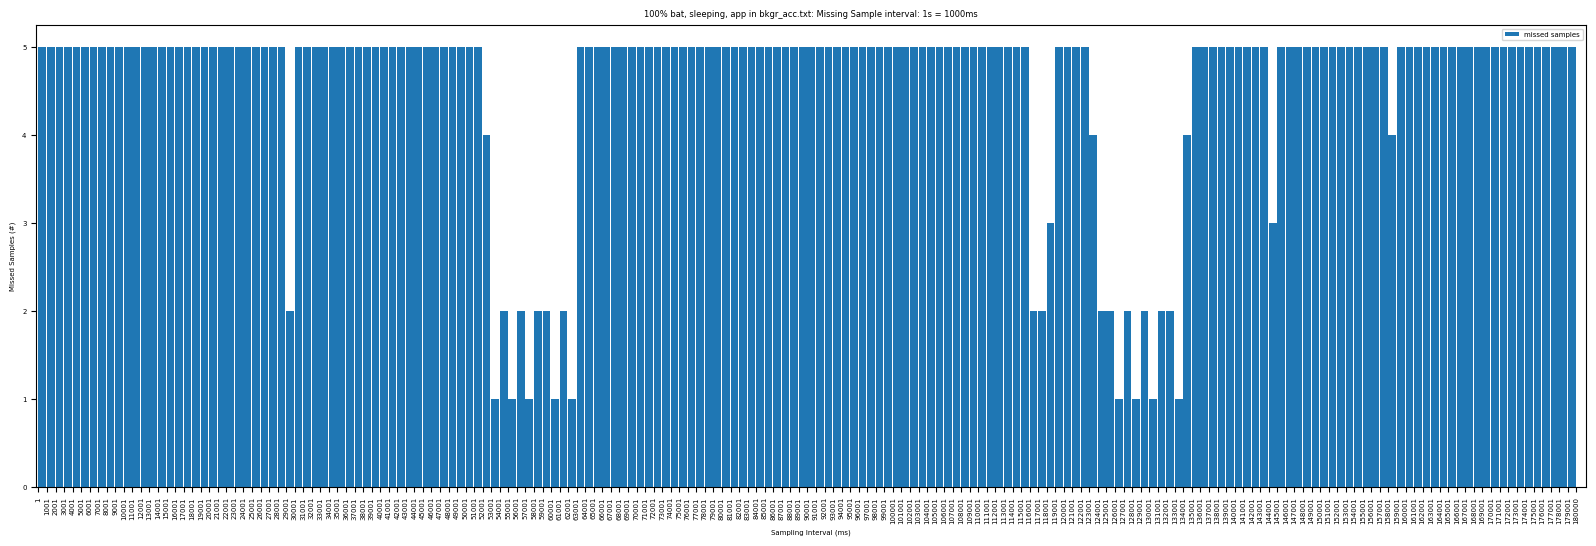

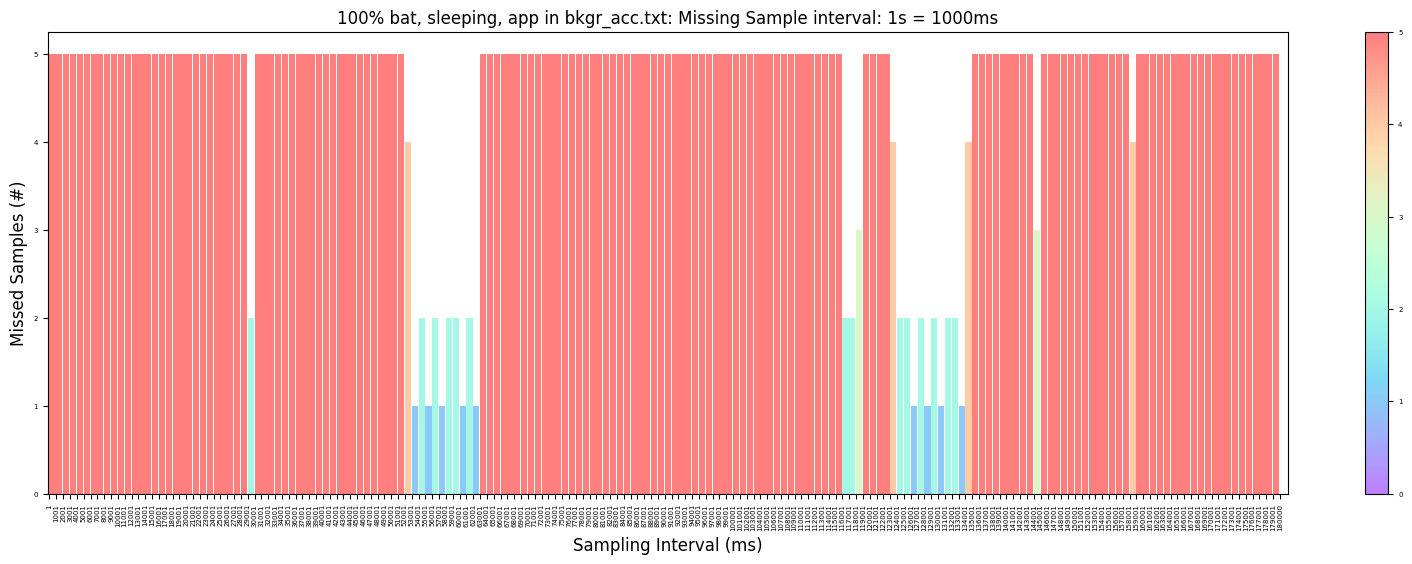

interval_start  interval_end      intervals  missed samples  \
0                1          5000         1-5000              25   
1             3001          8000      3001-8000              25   
2             6001         11000     6001-11000              25   
3             9001         14000     9001-14000              25   
4            12001         17000    12001-17000              25   
5            15001         20000    15001-20000              25   
6            18001         23000    18001-23000              25   
7            21001         26000    21001-26000              25   
8            24001         29000    24001-29000              25   
9            27001         32000    27001-32000              22   
10           30001         35000    30001-35000              25   
11           33001         38000    33001-38000              25   
12           36001         41000    36001-41000              25   
13           39001         44000    39001-44000              25   
14           42001         47000    42001-47000              25   
15           45001         50000    45001-50000              25   
16           48001         53000    48001-53000              24   
17           51001         56000    51001-56000              13   
18           54001         59000    54001-59000               8   
19           57001         62000    57001-62000               8   
20           60001         65000    60001-65000              14   
21           63001         68000    63001-68000              25   
22           66001         71000    66001-71000              25   
23           69001         74000    69001-74000              25   
24           72001         77000    72001-77000              25   
25           75001         80000    75001-80000              25   
26           78001         83000    78001-83000              25   
27           81001         86000    81001-86000              25   
28           84001         89000    84001-89000              25   
29           87001         92000    87001-92000              25   
30           90001         95000    90001-95000              25   
31           93001         98000    93001-98000              25   
32           96001        101000   96001-101000              25   
33           99001        104000   99001-104000              25   
34          102001        107000  102001-107000              25   
35          105001        110000  105001-110000              25   
36          108001        113000  108001-113000              25   
37          111001        116000  111001-116000              25   
38          114001        119000  114001-119000              17   
39          117001        122000  117001-122000              20   
40          120001        125000  120001-125000              21   
41          123001        128000  123001-128000              11   
42          126001        131000  126001-131000               7   
43          129001        134000  129001-134000               8   
44          132001        137000  132001-137000              17   
45          135001        140000  135001-140000              25   
46          138001        143000  138001-143000              25   
47          141001        146000  141001-146000              23   
48          144001        149000  144001-149000              23   
49          147001        152000  147001-152000              25   
50          150001        155000  150001-155000              25   
51          153001        158000  153001-158000              25   

    recorded samples  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
5                  0  
6                  0  
7                  0  
8                  0  
9                  3  
10                 0  
11                 0  
12                 0  
13                 0  
14                 0  
15                 0  
16                 1  
17                12  
18             

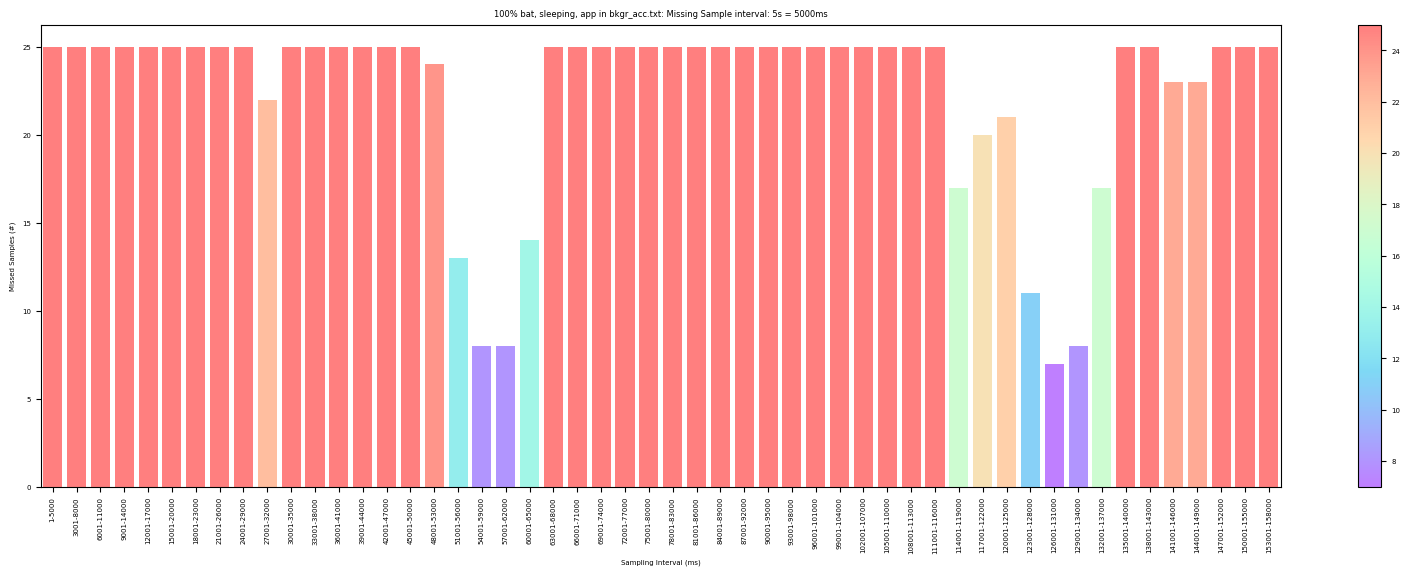

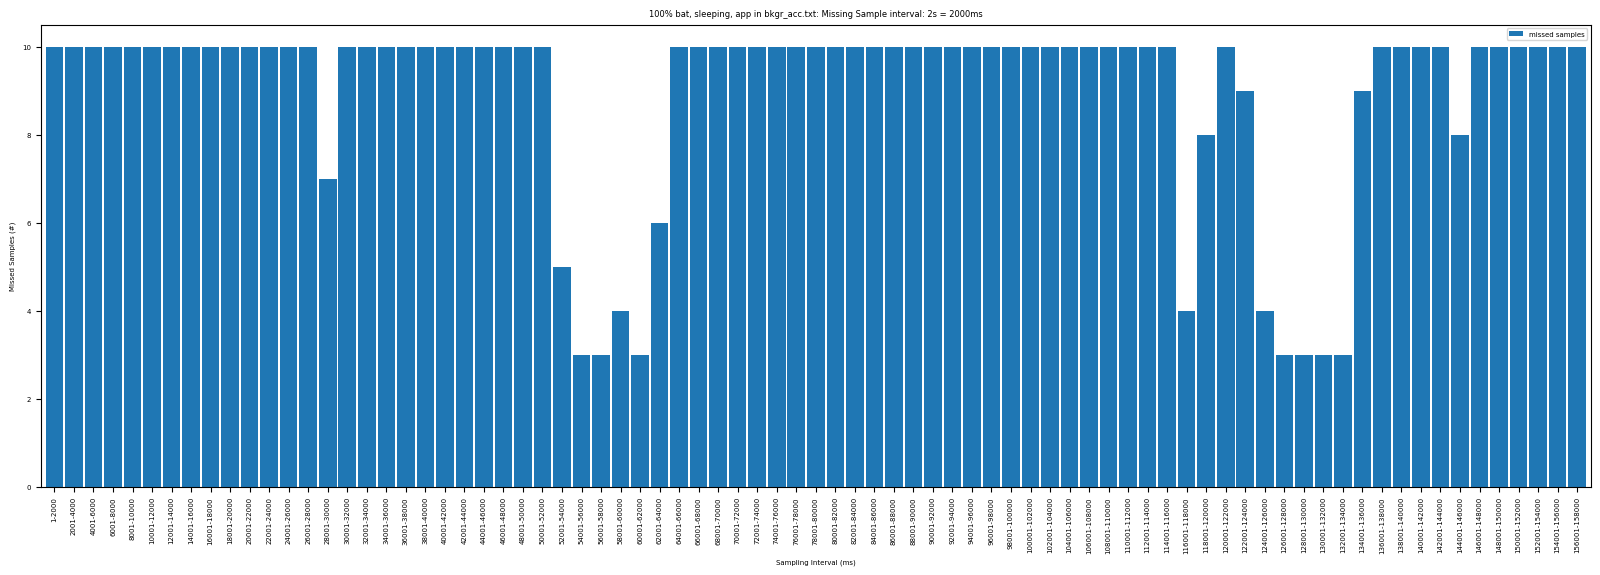

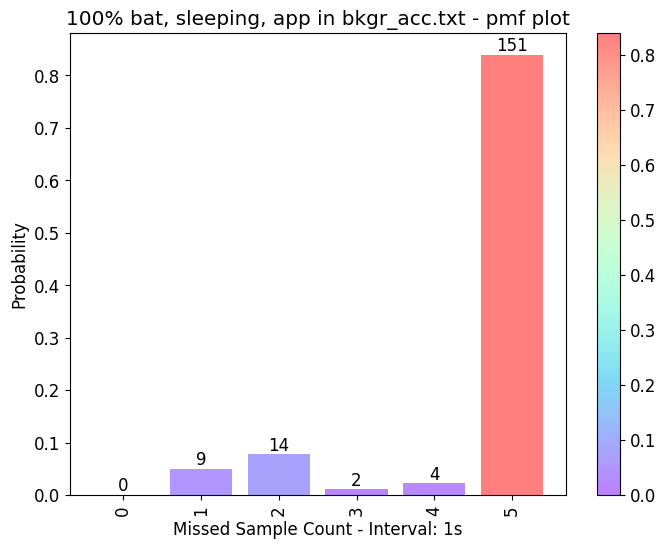

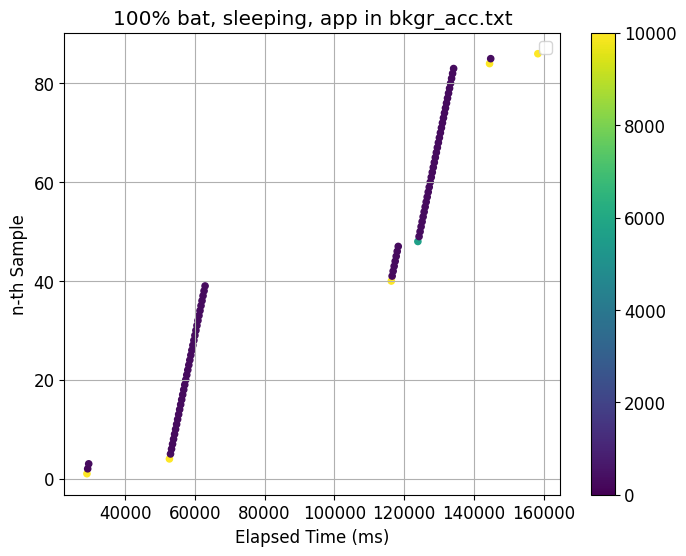

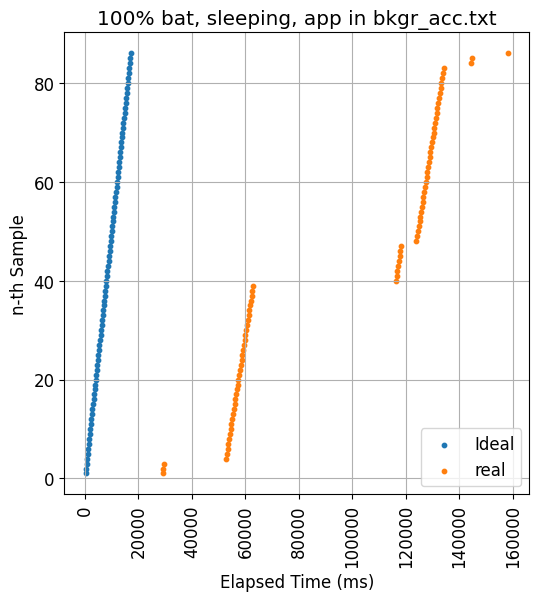

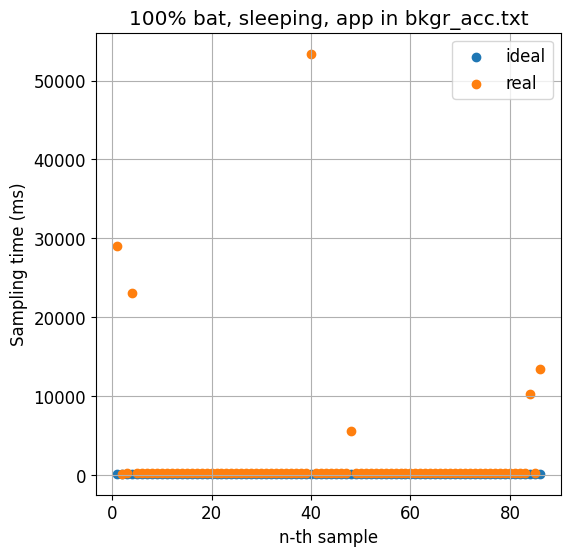

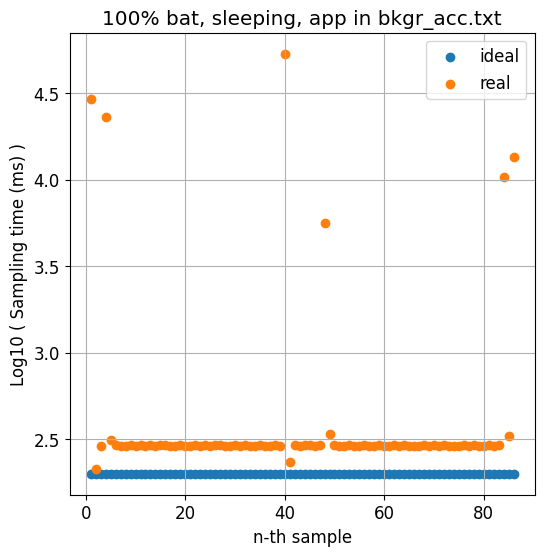

In [ ]:
obj = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc.txt')
#obj.trim_data()


obj.print_raw_data()
obj.print_preprocessed_data()

obj.missing_samples(0, 1200, verbose=1)
display(obj.calculate_missing_interval(1))

plt.rcParams['font.size'] = 5
obj.plot_missing_intervals(1)
plt.rcParams['font.size'] = 5
obj.plot_missing_intervals_color(1)

display(obj.calculate_missing_window(5, 3))
obj.plot_missing_window_color(5,3)
obj.plot_missing_window(2)

plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (8,6)
obj.plot_pmf(1)

obj.plot1()
obj.plot2()
obj.plot3()
obj.plot3_log()



## 100% bat, speeping, app in bkgr_acc_moving.txt

Acc_timestamp         Acc_x       Acc_y      Acc_z
0    1680314249415   -0.27756742   0.5712864   9.720243
1    1680314249707   -0.18065812   0.5802595   9.679565
2    1680314249998   -0.14476576   0.5940182   9.672387
3    1680314250289   0.008973085  0.66759753   9.675977
4    1680314250580  -0.050249275   0.6412765  9.7196455
..             ...           ...         ...        ...
282  1680314626085     -0.910469   7.0372915   7.016354
283  1680314626377    -1.5326029    7.426125  6.0526447
284  1680314626668    -1.8999012   7.6887374  5.6560345
285  1680314626960    -1.8317057   7.6749787  5.7020965
286  1680314627251    -2.2127628    7.893324   5.189434

[287 rows x 4 columns]

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0     1680314281283                 1            31.868             11.196   
1     1680314281541                 2            32.126             11.454   
2     1680314316016                 3            66.601             45.929   
3     1680314316270                 4            66.855             46.183   
4     1680314316561                 5            67.146             46.474   
5     1680314363466                 6           114.051             93.379   
6     1680314363728                 7           114.313             93.641   
7     1680314364019                 8           114.604             93.932   
8     1680314377469                 9           128.054            107.382   
9     1680314377732                10           128.317            107.645   
10    1680314378021                11           128.606            107.934   
11    1680314378314                12           128.899            108.227   
12    1680314378605                13           129.190            108.518   
13    1680314378897                14           129.482            108.810   
14    1680314379187                15           129.772            109.100   
15    1680314379480                16           130.065            109.393   
16    1680314379772                17           130.357            109.685   
17    1680314380063                18           130.648            109.976   
18    1680314380355                19           130.940            110.268   
19    1680314394939                20           145.524            124.852   
20    1680314395214                21           145.799            125.127   
21    1680314395505                22           146.090            125.418   
22    1680314395797                23           146.382            125.710   
23    1680314396088                24           146.673            126.001   
24    1680314396379                25           146.964            126.292   
25    1680314396671                26           147.256            126.584   
26    1680314396962                27           147.547            126.875   
27    1680314397252                28           147.837            127.165   
28    1680314397545                29           148.130            127.458   
29    1680314397836                30           148.421            127.749   
30    1680314398128                31           148.713            128.041   
31    1680314398419                32           149.004            128.332   
32    1680314398711                33           149.296            128.624   
33    1680314399002                34           149.587            128.915   
34    1680314399294                35           149.879            129.207   
35    1680314399585                36           150.170            129.498   
36    1680314399876                37           150.461            129.789   
37    1680314400165                38           150.750            130.078   
38    1680314400457                39           151.042            130.370   
39    1680314400750                40           151.335            130.663   
40    1680314401041                41           151.626            130.954   
41    1680314401333                42           151.918            131.246   
42    1680314401623                43           152.208            131.536   
43    1680314401915                44           152.500            131.828   
44    1680314402207                45           152.792            132.120   
45    1680314402498                46           153.083            132.411   
46    1680314402790                47           153.375            132.703   
47    1680314403081                48           153.666            132.994   
48    1680314403372                49           153.957            133.285   
49    1680314403664                50           154.249            133.577   
50    1680314403955       

Start time (ms):  0
End time (ms):  1200
Time frame (ms):  1200
Ideal sampling period (ms):  200
total_expected_samples (#):  6
total_recorded_samples (#):  0
total_missing_samples (#):  6
------------------------------------------


interval_start  interval_end       interval  missed samples  \
0                 1          1000         1-1000               5   
1              1001          2000      1001-2000               5   
2              2001          3000      2001-3000               5   
3              3001          4000      3001-4000               5   
4              4001          5000      4001-5000               5   
..              ...           ...            ...             ...   
175          175001        176000  175001-176000               5   
176          176001        177000  176001-177000               5   
177          177001        178000  177001-178000               5   
178          178001        179000  178001-179000               5   
179          179001        180000  179001-180000               5   

     recorded samples  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
..                ...  
175                 0  
176                 0  
177                 0  
178                 0  
179                 0  

[180 rows x 5 columns]

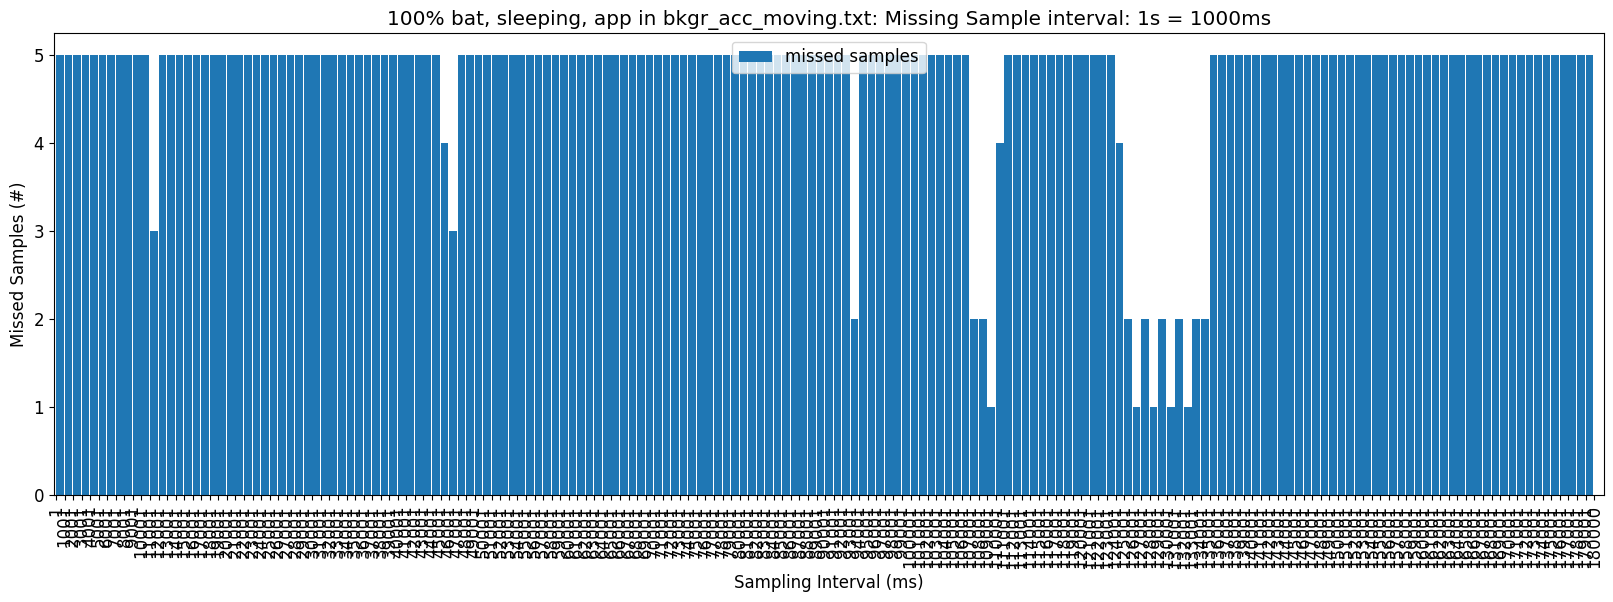

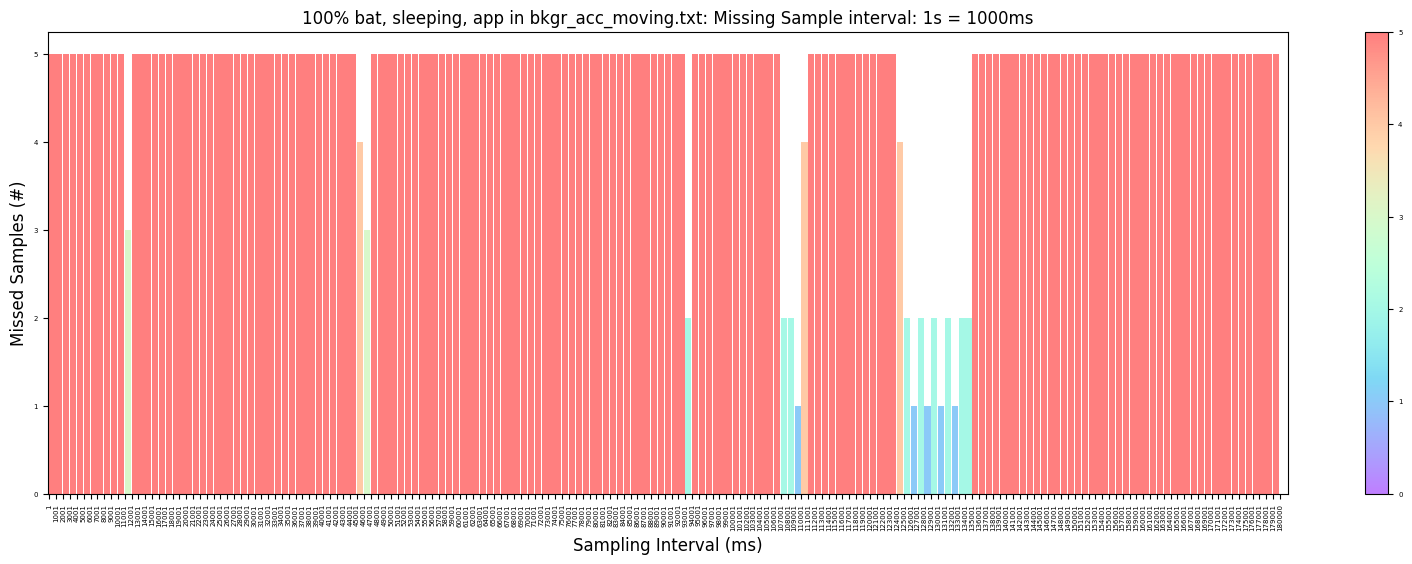

interval_start  interval_end      intervals  missed samples  \
0                1          5000         1-5000              25   
1             3001          8000      3001-8000              25   
2             6001         11000     6001-11000              25   
3             9001         14000     9001-14000              23   
4            12001         17000    12001-17000              25   
5            15001         20000    15001-20000              25   
6            18001         23000    18001-23000              25   
7            21001         26000    21001-26000              25   
8            24001         29000    24001-29000              25   
9            27001         32000    27001-32000              25   
10           30001         35000    30001-35000              25   
11           33001         38000    33001-38000              25   
12           36001         41000    36001-41000              25   
13           39001         44000    39001-44000              25   
14           42001         47000    42001-47000              22   
15           45001         50000    45001-50000              22   
16           48001         53000    48001-53000              25   
17           51001         56000    51001-56000              25   
18           54001         59000    54001-59000              25   
19           57001         62000    57001-62000              25   
20           60001         65000    60001-65000              25   
21           63001         68000    63001-68000              25   
22           66001         71000    66001-71000              25   
23           69001         74000    69001-74000              25   
24           72001         77000    72001-77000              25   
25           75001         80000    75001-80000              25   
26           78001         83000    78001-83000              25   
27           81001         86000    81001-86000              25   
28           84001         89000    84001-89000              25   
29           87001         92000    87001-92000              25   
30           90001         95000    90001-95000              22   
31           93001         98000    93001-98000              22   
32           96001        101000   96001-101000              25   
33           99001        104000   99001-104000              25   
34          102001        107000  102001-107000              25   
35          105001        110000  105001-110000              15   
36          108001        113000  108001-113000              17   
37          111001        116000  111001-116000              25   
38          114001        119000  114001-119000              25   
39          117001        122000  117001-122000              25   
40          120001        125000  120001-125000              24   
41          123001        128000  123001-128000              14   
42          126001        131000  126001-131000               7   
43          129001        134000  129001-134000               8   

    recorded samples  
0                  0  
1                  0  
2                  0  
3                  2  
4                  0  
5                  0  
6                  0  
7                  0  
8                  0  
9                  0  
10                 0  
11                 0  
12                 0  
13                 0  
14                 3  
15                 3  
16                 0  
17                 0  
18                 0  
19                 0  
20                 0  
21                 0  
22                 0  
23                 0  
24                 0  
25                 0  
26                 0  
27                 0  
28                 0  
29                 0  
30                 3  
31                 3  
32                 0  
33                 0  
34                 0  
35                10  
36                 8  
37                 0  
38                 0  
39                 0  
40                 1  
41                11  

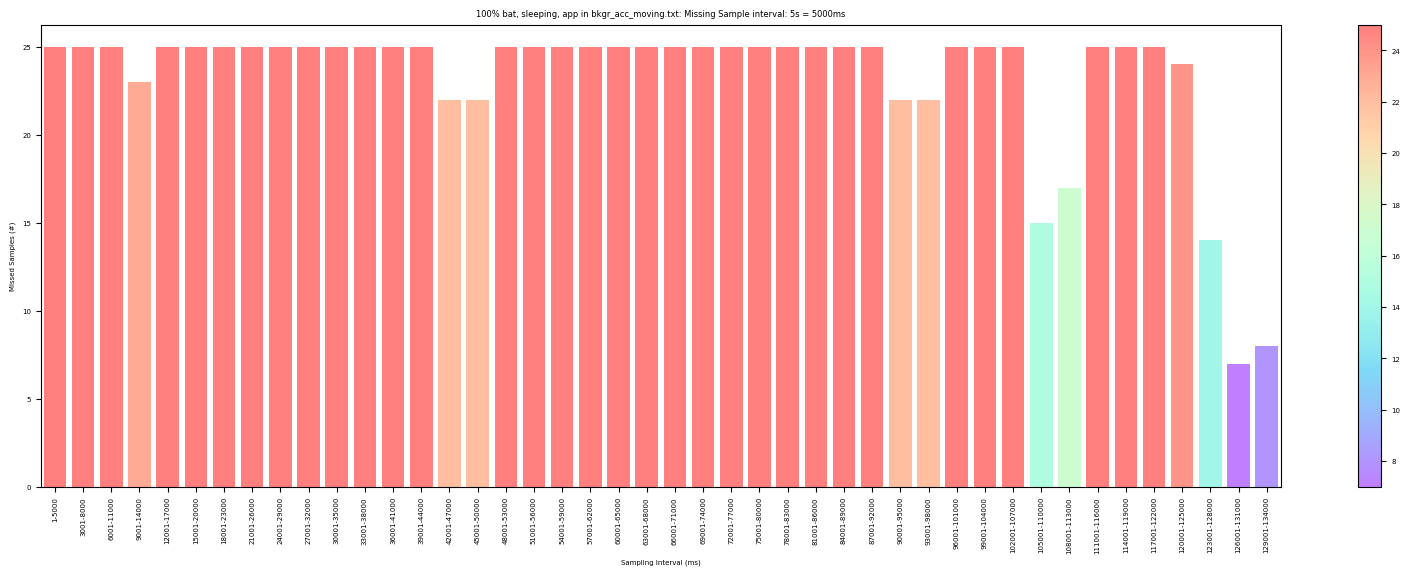

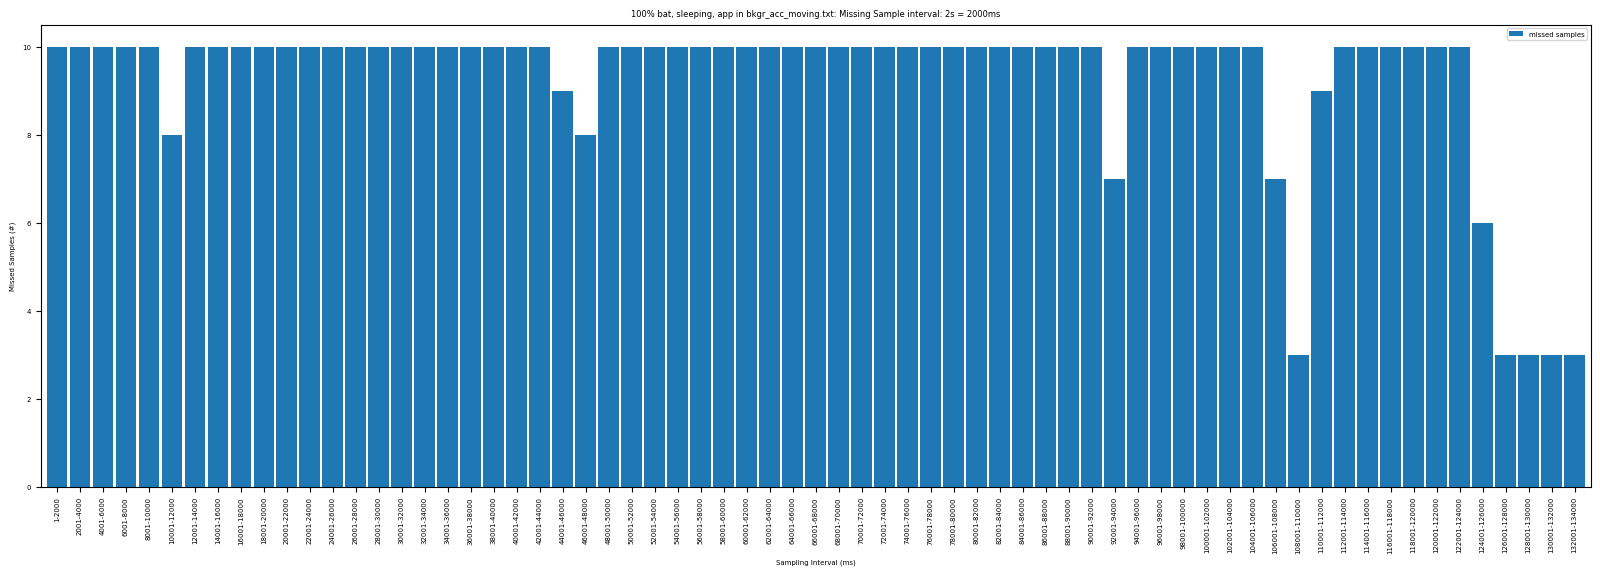

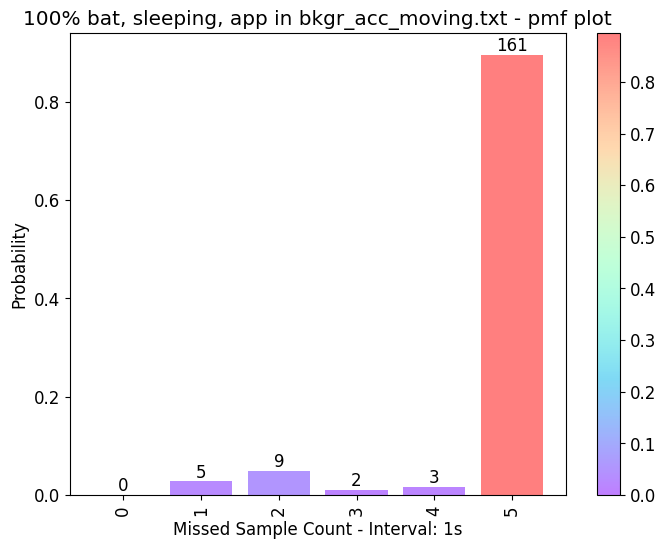

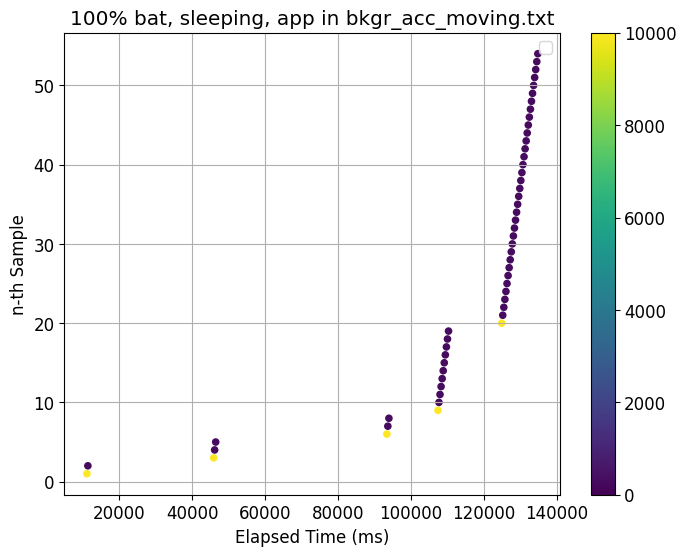

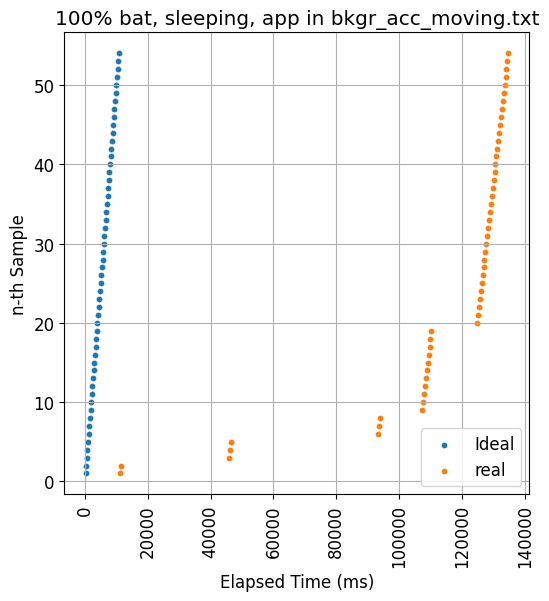

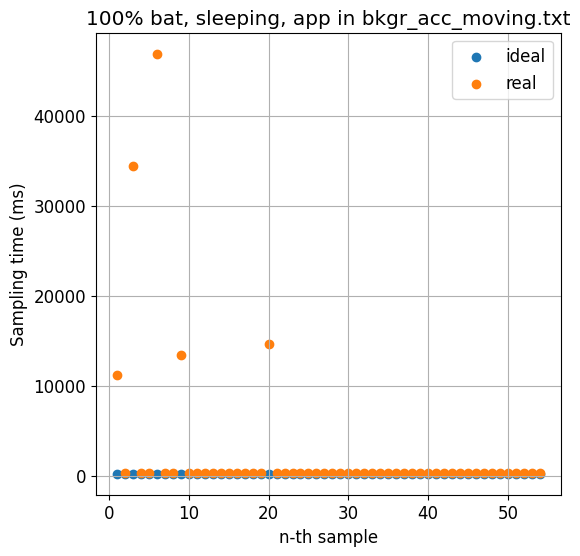

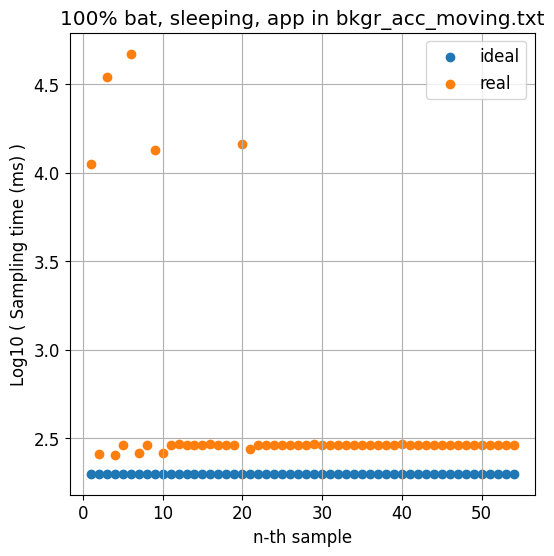

In [ ]:
obj = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc_moving.txt')
obj.trim_data()


obj.print_raw_data()
obj.print_preprocessed_data()

obj.missing_samples(0, 1200, verbose=1)
display(obj.calculate_missing_interval(1))

obj.plot_missing_intervals(1)
plt.rcParams['font.size'] = 5
obj.plot_missing_intervals_color(1)

display(obj.calculate_missing_window(5, 3))
obj.plot_missing_window_color(5,3)
obj.plot_missing_window(2)

plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (8,6)
obj.plot_pmf(1)

obj.plot1()
obj.plot2()
obj.plot3()
obj.plot3_log()

## 100% bat, hi load, app in bkgrn_acc.txt

Acc_timestamp       Acc_x      Acc_y       Acc_z
0    1678659635100   1.5074782   9.619745  -1.8317057
1    1678659635391    2.009971   9.512068  -1.4219348
2    1678659635683   2.2420747    9.51805  -1.2873386
3    1678659635974   2.1822543   9.547362  -1.2556337
4    1678659636265   2.2007985  9.5252285  -1.3124632
..             ...         ...        ...         ...
934  1678659907147  0.47916272  0.6969096    9.690931
935  1678659907439   0.4761717  0.6963114    9.686146
936  1678659907730  0.47736812  0.6987042     9.68495
937  1678659908022   0.4779663  0.6903293    9.684352
938  1678659908313  0.47138608   0.695115    9.639486

[939 rows x 4 columns]

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0      1678659665297                 1            30.197              0.291   
1      1678659665588                 2            30.488              0.582   
2      1678659665879                 3            30.779              0.873   
3      1678659666171                 4            31.071              1.165   
4      1678659666463                 5            31.363              1.457   
..               ...               ...               ...                ...   
612    1678659843613               613           208.513            178.607   
613    1678659843904               614           208.804            178.898   
614    1678659844196               615           209.096            179.190   
615    1678659844487               616           209.387            179.481   
616    1678659844778               617           209.678            179.772   

     time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                   291                 291                200   
1                   582                 291                200   
2                   873                 291                200   
3                  1165                 292                200   
4                  1457                 292                200   
..                  ...                 ...                ...   
612              178607                 292                200   
613              178898                 291                200   
614              179190                 292                200   
615              179481                 291                200   
616              179772                 291                200   

     ideal time elapsed2 (ms)       Acc_x       Acc_y      Acc_z  
0                         200  0.58564335  0.40917268   9.695119  
1                         400   0.5844469   0.4031906  9.6993065  
2                         600   0.5844469   0.4019942   9.698111  
3                         800   0.5844469  0.40797627   9.698111  
4                        1000   0.5820541  0.41156548   9.696316  
..                        ...         ...         ...        ...  
612                    122600  0.43848476   0.4989035    9.70828  
613                    122800  0.43429732  0.50368917   9.701699  
614                    123000   0.4354937  0.50368917   9.694521  
615                    123200  0.43968117   0.5072784   9.717253  
616                    123400  0.43968117   0.5054838   9.697512  

[617 rows x 11 columns]

Start time (ms):  0
End time (ms):  1200
Time frame (ms):  1200
Ideal sampling period (ms):  200
Average sampling period (ms):  300
total_expected_samples (#):  6
total_recorded_samples (#):  4
total_missing_samples (#):  2
------------------------------------------


interval_start  interval_end       interval  missed samples  \
0                 1          1000         1-1000               2   
1              1001          2000      1001-2000               2   
2              2001          3000      2001-3000               1   
3              3001          4000      3001-4000               2   
4              4001          5000      4001-5000               1   
..              ...           ...            ...             ...   
175          175001        176000  175001-176000               1   
176          176001        177000  176001-177000               2   
177          177001        178000  177001-178000               2   
178          178001        179000  178001-179000               1   
179          179001        180000  179001-180000               2   

     recorded samples  
0                   3  
1                   3  
2                   4  
3                   3  
4                   4  
..                ...  
175                 4  
176                 3  
177                 3  
178                 4  
179                 3  

[180 rows x 5 columns]

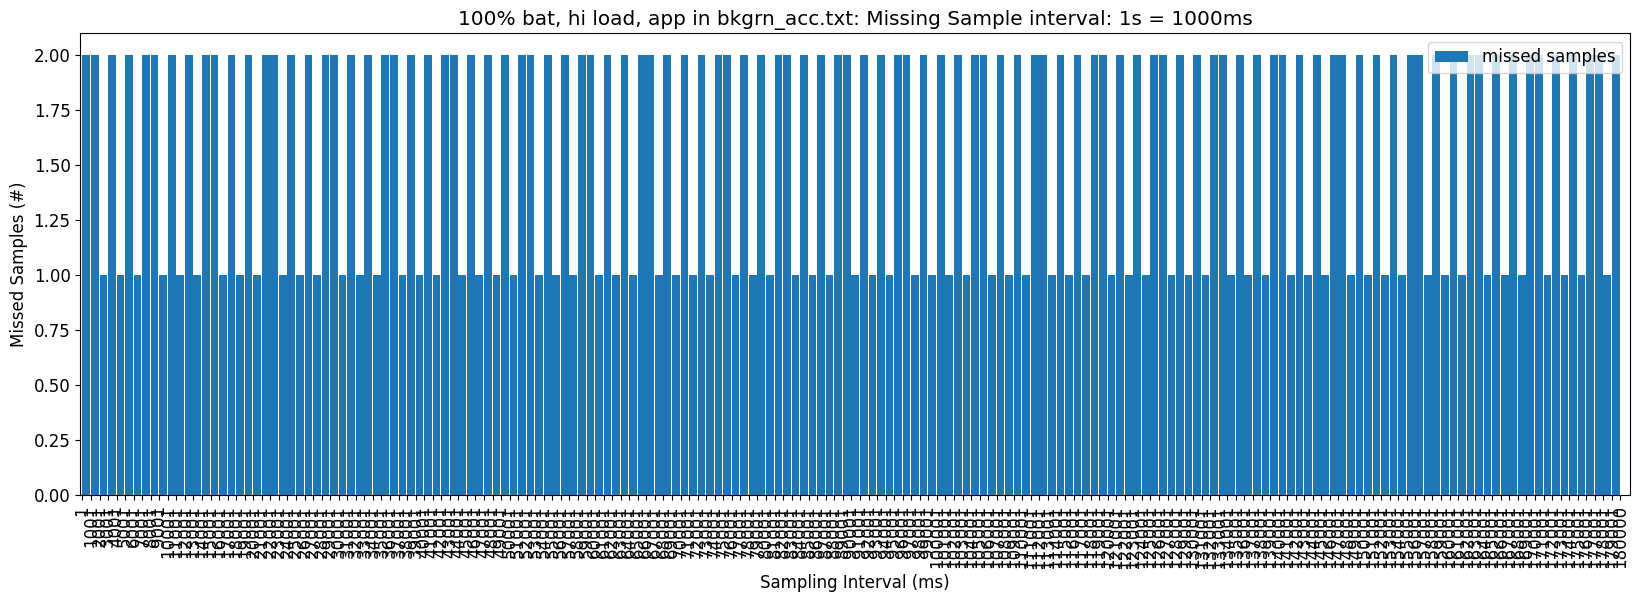

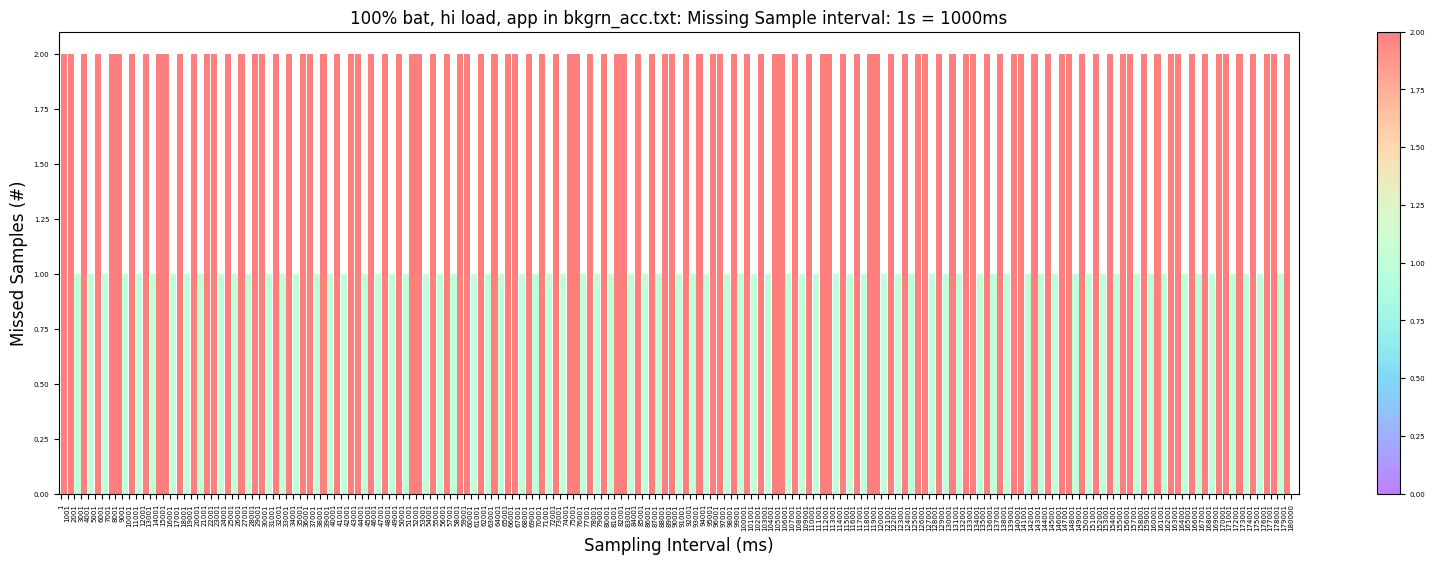

interval_start  interval_end      intervals  missed samples  \
0                1          5000         1-5000               8   
1             3001          8000      3001-8000               8   
2             6001         11000     6001-11000               8   
3             9001         14000     9001-14000               7   
4            12001         17000    12001-17000               8   
5            15001         20000    15001-20000               8   
6            18001         23000    18001-23000               8   
7            21001         26000    21001-26000               8   
8            24001         29000    24001-29000               8   
9            27001         32000    27001-32000               8   
10           30001         35000    30001-35000               7   
11           33001         38000    33001-38000               8   
12           36001         41000    36001-41000               8   
13           39001         44000    39001-44000               8   
14           42001         47000    42001-47000               8   
15           45001         50000    45001-50000               8   
16           48001         53000    48001-53000               8   
17           51001         56000    51001-56000               8   
18           54001         59000    54001-59000               8   
19           57001         62000    57001-62000               8   
20           60001         65000    60001-65000               7   
21           63001         68000    63001-68000               8   
22           66001         71000    66001-71000               8   
23           69001         74000    69001-74000               7   
24           72001         77000    72001-77000               8   
25           75001         80000    75001-80000               8   
26           78001         83000    78001-83000               8   
27           81001         86000    81001-86000               8   
28           84001         89000    84001-89000               8   
29           87001         92000    87001-92000               8   
30           90001         95000    90001-95000               7   
31           93001         98000    93001-98000               8   
32           96001        101000   96001-101000               8   
33           99001        104000   99001-104000               7   
34          102001        107000  102001-107000               8   
35          105001        110000  105001-110000               8   
36          108001        113000  108001-113000               8   
37          111001        116000  111001-116000               8   
38          114001        119000  114001-119000               8   
39          117001        122000  117001-122000               8   
40          120001        125000  120001-125000               7   
41          123001        128000  123001-128000               8   
42          126001        131000  126001-131000               8   
43          129001        134000  129001-134000               8   
44          132001        137000  132001-137000               8   
45          135001        140000  135001-140000               8   
46          138001        143000  138001-143000               8   
47          141001        146000  141001-146000               7   
48          144001        149000  144001-149000               8   
49          147001        152000  147001-152000               8   
50          150001        155000  150001-155000               7   
51          153001        158000  153001-158000               8   
52          156001        161000  156001-161000               8   
53          159001        164000  159001-164000               8   
54          162001        167000  162001-167000               8   
55          165001        170000  165001-170000               8   
56          168001        173000  168001-173000               8   
57          171001        176000  171001-176000               7   
58          174001        179000  174001-179000    

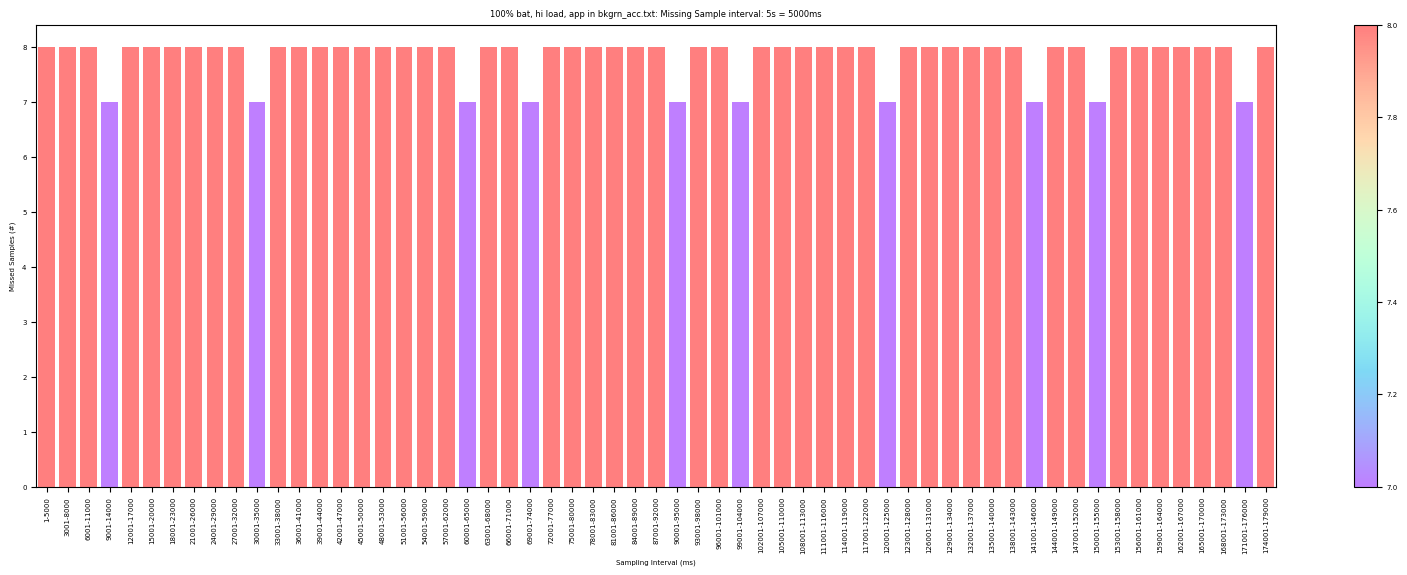

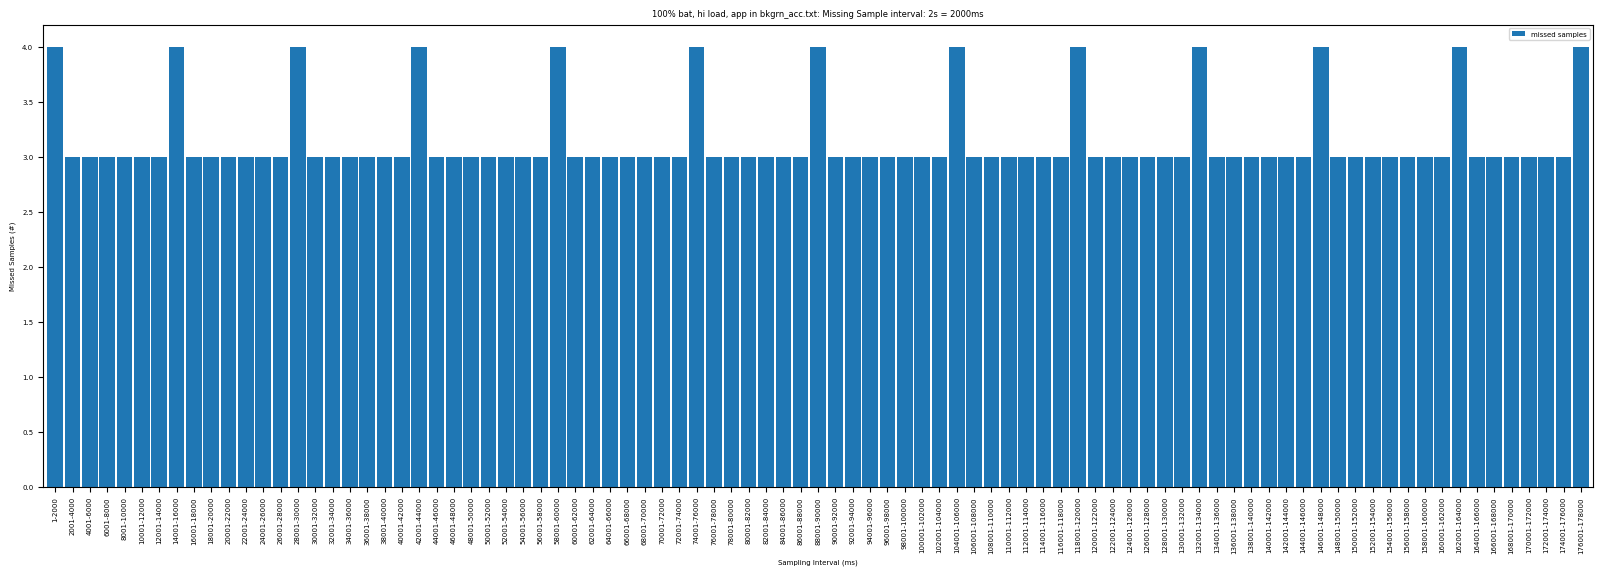

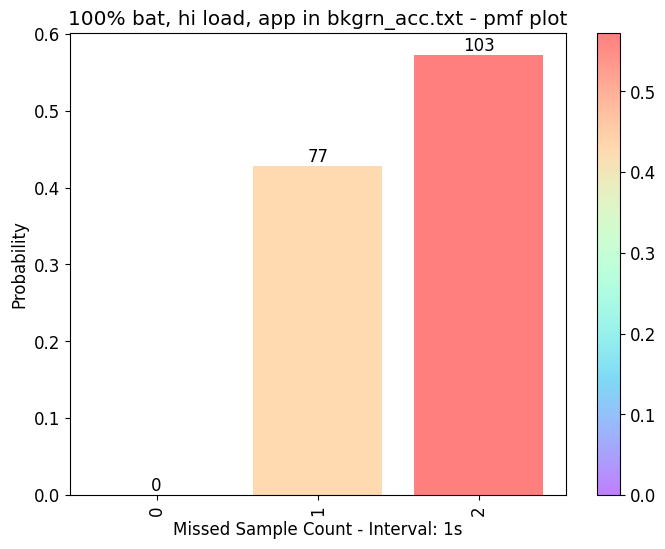

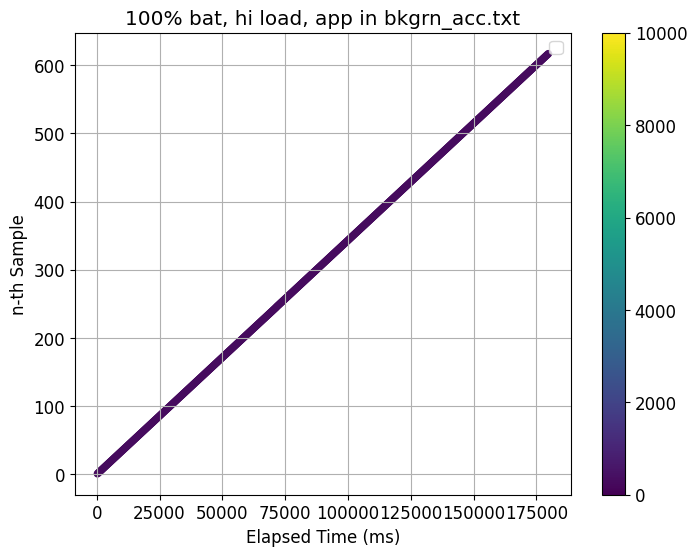

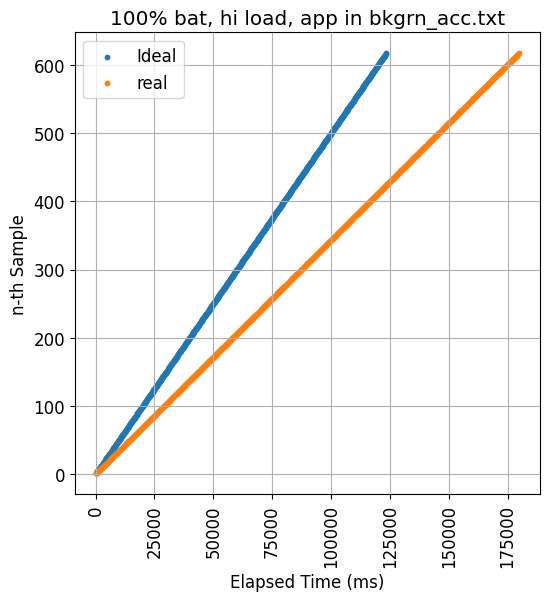

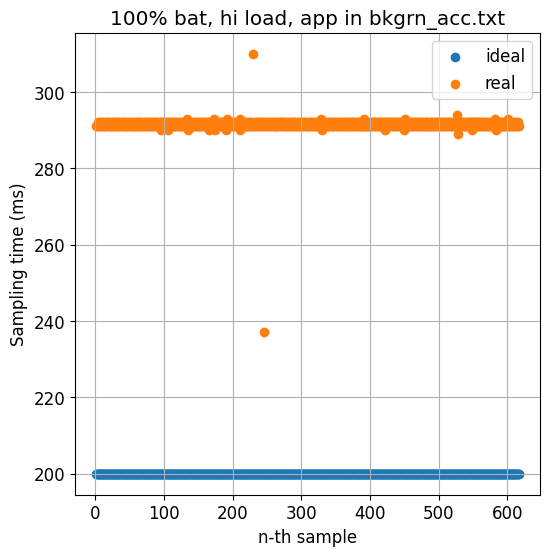

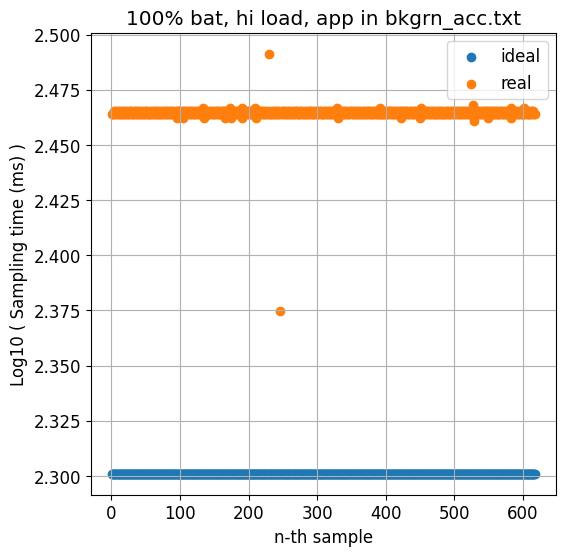

In [ ]:
obj = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc.txt')

obj.print_raw_data()
obj.print_preprocessed_data()

obj.missing_samples(0, 1200, verbose=1)
display(obj.calculate_missing_interval(1))

obj.plot_missing_intervals(1)
plt.rcParams['font.size'] = 5
obj.plot_missing_intervals_color(1)

display(obj.calculate_missing_window(5, 3))
obj.plot_missing_window_color(5,3)
obj.plot_missing_window(2)

plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (8,6)
obj.plot_pmf(1)

obj.plot1()
obj.plot2()
obj.plot3()
obj.plot3_log()

## 100% bat, hi load, app in bkgrn_acc_moving.txt

Acc_timestamp        Acc_x        Acc_y      Acc_z
0     1680315288700   -1.0289137  -0.16450655   9.629914
1     1680315288992    -1.006182   -0.1698904   9.632906
2     1680315289282  -0.99661064   -0.1585245   9.656236
3     1680315289574   -0.9942178  -0.15493527    9.64487
4     1680315289865   -0.9936196  -0.15732808   9.646665
...             ...          ...          ...        ...
1325  1680315674871   -2.0285153    7.9160557  5.4634123
1326  1680315675162   -2.1020947    7.9100733   5.548956
1327  1680315675452   -2.0578275     7.973483  5.4592247
1328  1680315675744   -1.9172492     7.938189  5.3623157
1329  1680315676036    -1.989632     7.878967  5.4412785

[1330 rows x 4 columns]

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0      1680315319027                 1            30.327              0.346   
1      1680315319336                 2            30.636              0.655   
2      1680315319628                 3            30.928              0.947   
3      1680315319919                 4            31.219              1.238   
4      1680315320211                 5            31.511              1.530   
..               ...               ...               ...                ...   
612    1680315497396               613           208.696            178.715   
613    1680315497687               614           208.987            179.006   
614    1680315497979               615           209.279            179.298   
615    1680315498271               616           209.571            179.590   
616    1680315498562               617           209.862            179.881   

     time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                   346                 346                200   
1                   655                 309                200   
2                   947                 292                200   
3                  1238                 291                200   
4                  1530                 292                200   
..                  ...                 ...                ...   
612              178715                 291                200   
613              179006                 291                200   
614              179298                 292                200   
615              179590                 292                200   
616              179881                 291                200   

     ideal time elapsed2 (ms)       Acc_x       Acc_y        Acc_z  
0                         200  -4.3609195    8.222935   -1.0313065  
1                         400  -4.6911287    8.469396   -1.2251252  
2                         600  -4.8418765    8.406584   -1.3489537  
3                         800  -4.4458647    8.356335   -1.6043876  
4                        1000  -5.8887367     7.98784   -1.1724831  
..                        ...         ...         ...          ...  
612                    122600    9.672985   -0.401396  -0.34157544  
613                    122800    8.724232  -1.0426725    5.9581285  
614                    123000    8.751749  -0.6879365     4.664808  
615                    123200    9.066405  -0.8153543   -2.7433712  
616                    123400    8.834301  -0.8021938   -4.7653065  

[617 rows x 11 columns]

Start time (ms):  0
End time (ms):  1200
Time frame (ms):  1200
Ideal sampling period (ms):  200
Average sampling period (ms):  400
total_expected_samples (#):  6
total_recorded_samples (#):  3
total_missing_samples (#):  3
------------------------------------------


interval_start  interval_end       interval  missed samples  \
0                 1          1000         1-1000               2   
1              1001          2000      1001-2000               2   
2              2001          3000      2001-3000               1   
3              3001          4000      3001-4000               2   
4              4001          5000      4001-5000               2   
..              ...           ...            ...             ...   
175          175001        176000  175001-176000               2   
176          176001        177000  176001-177000               1   
177          177001        178000  177001-178000               2   
178          178001        179000  178001-179000               2   
179          179001        180000  179001-180000               1   

     recorded samples  
0                   3  
1                   3  
2                   4  
3                   3  
4                   3  
..                ...  
175                 3  
176                 4  
177                 3  
178                 3  
179                 4  

[180 rows x 5 columns]

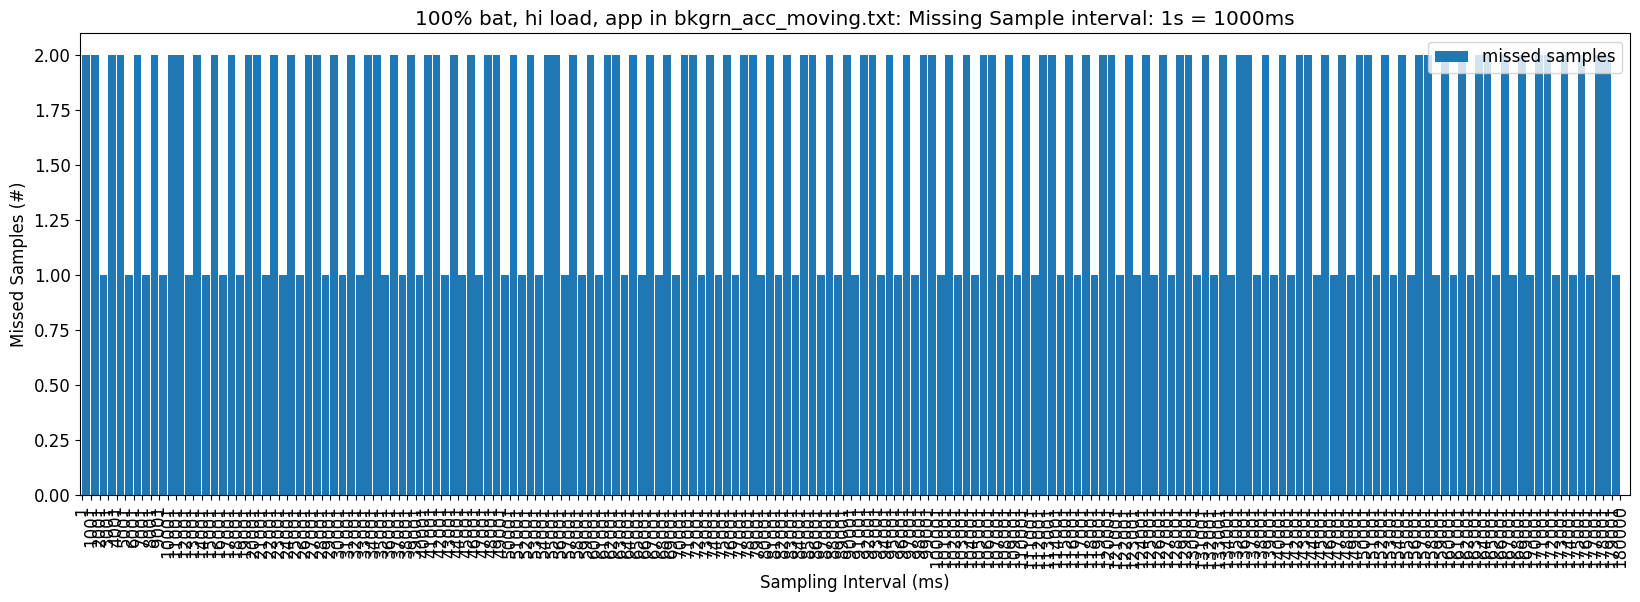

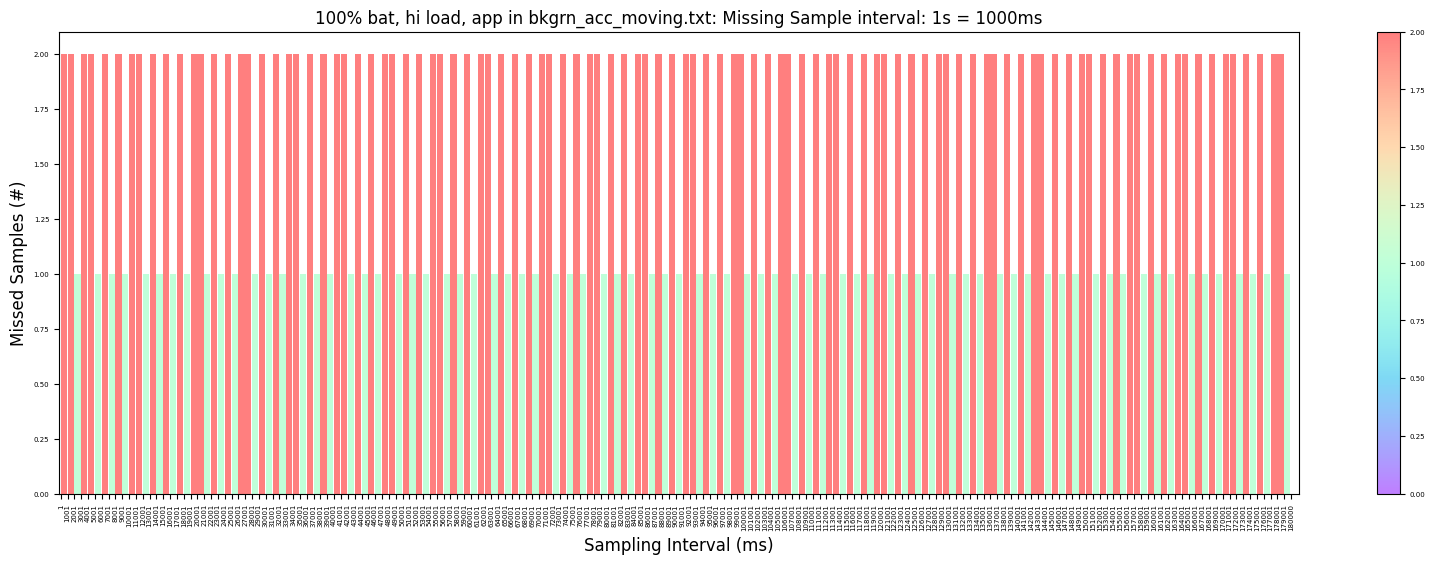

interval_start  interval_end      intervals  missed samples  \
0                1          5000         1-5000               9   
1             3001          8000      3001-8000               8   
2             6001         11000     6001-11000               8   
3             9001         14000     9001-14000               8   
4            12001         17000    12001-17000               7   
5            15001         20000    15001-20000               8   
6            18001         23000    18001-23000               8   
7            21001         26000    21001-26000               7   
8            24001         29000    24001-29000               8   
9            27001         32000    27001-32000               8   
10           30001         35000    30001-35000               8   
11           33001         38000    33001-38000               8   
12           36001         41000    36001-41000               8   
13           39001         44000    39001-44000               8   
14           42001         47000    42001-47000               7   
15           45001         50000    45001-50000               8   
16           48001         53000    48001-53000               8   
17           51001         56000    51001-56000               8   
18           54001         59000    54001-59000               8   
19           57001         62000    57001-62000               8   
20           60001         65000    60001-65000               8   
21           63001         68000    63001-68000               7   
22           66001         71000    66001-71000               8   
23           69001         74000    69001-74000               8   
24           72001         77000    72001-77000               7   
25           75001         80000    75001-80000               8   
26           78001         83000    78001-83000               8   
27           81001         86000    81001-86000               8   
28           84001         89000    84001-89000               8   
29           87001         92000    87001-92000               8   
30           90001         95000    90001-95000               8   
31           93001         98000    93001-98000               7   
32           96001        101000   96001-101000               8   
33           99001        104000   99001-104000               8   
34          102001        107000  102001-107000               8   
35          105001        110000  105001-110000               8   
36          108001        113000  108001-113000               8   
37          111001        116000  111001-116000               8   
38          114001        119000  114001-119000               7   
39          117001        122000  117001-122000               8   
40          120001        125000  120001-125000               8   
41          123001        128000  123001-128000               7   
42          126001        131000  126001-131000               8   
43          129001        134000  129001-134000               8   
44          132001        137000  132001-137000               8   
45          135001        140000  135001-140000               8   
46          138001        143000  138001-143000               8   
47          141001        146000  141001-146000               8   
48          144001        149000  144001-149000               7   
49          147001        152000  147001-152000               8   
50          150001        155000  150001-155000               8   
51          153001        158000  153001-158000               8   
52          156001        161000  156001-161000               8   
53          159001        164000  159001-164000               8   
54          162001        167000  162001-167000               8   
55          165001        170000  165001-170000               7   
56          168001        173000  168001-173000               8   
57          171001        176000  171001-176000               8   
58          174001        179000  174001-179000    

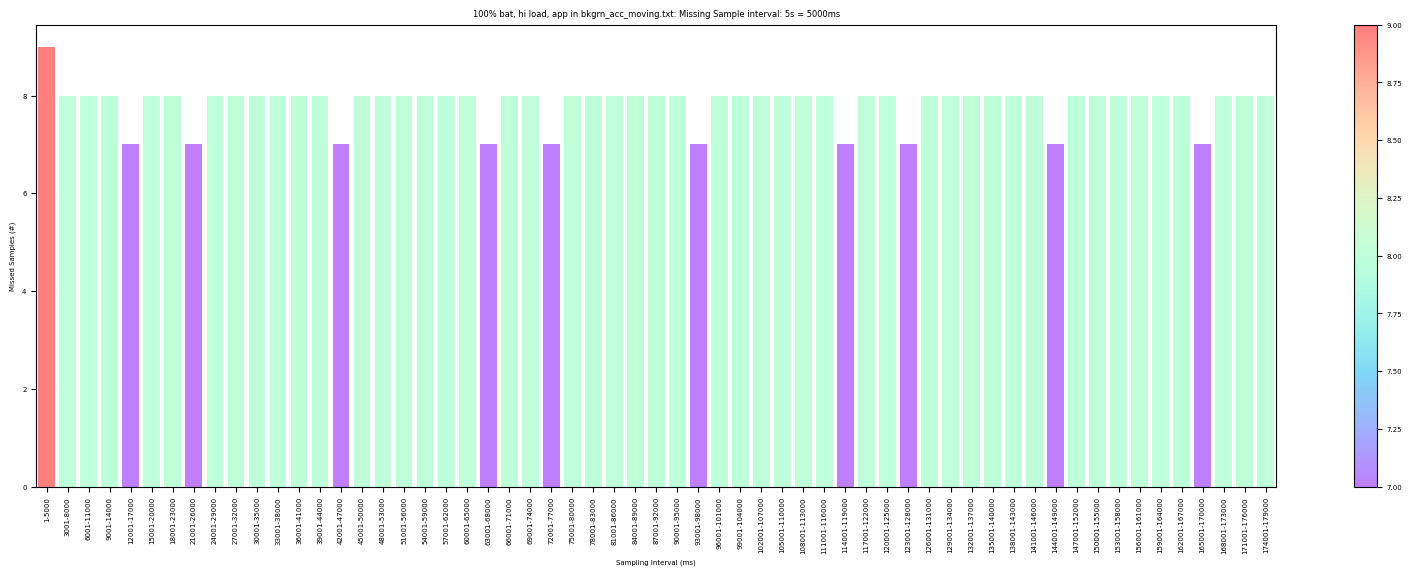

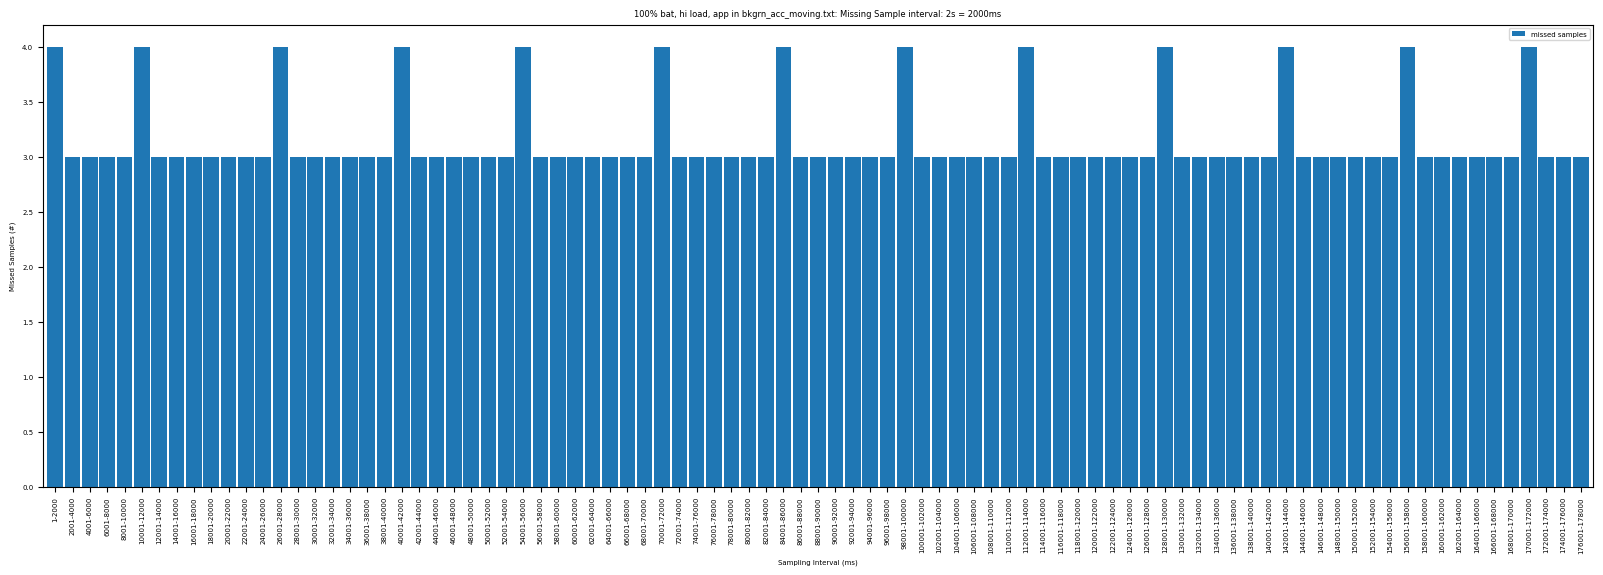

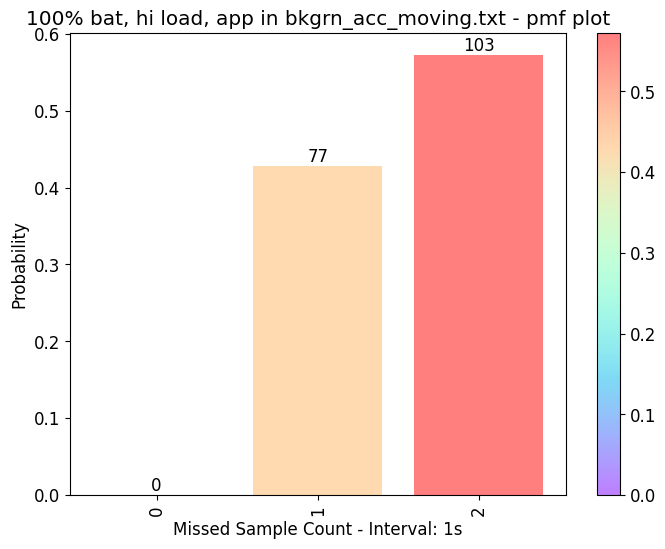

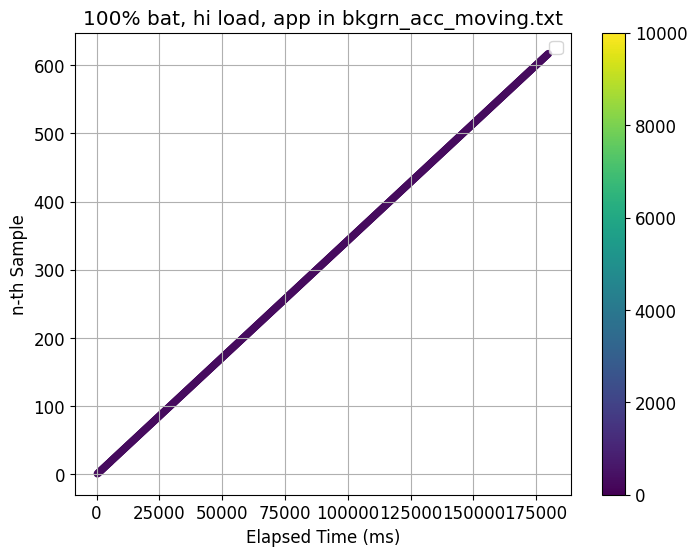

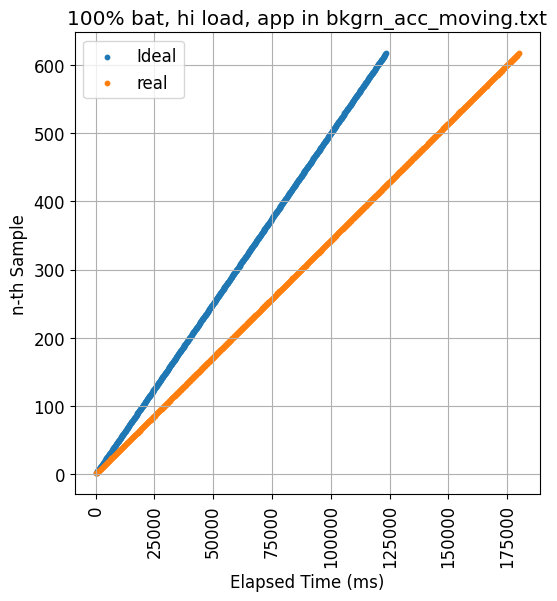

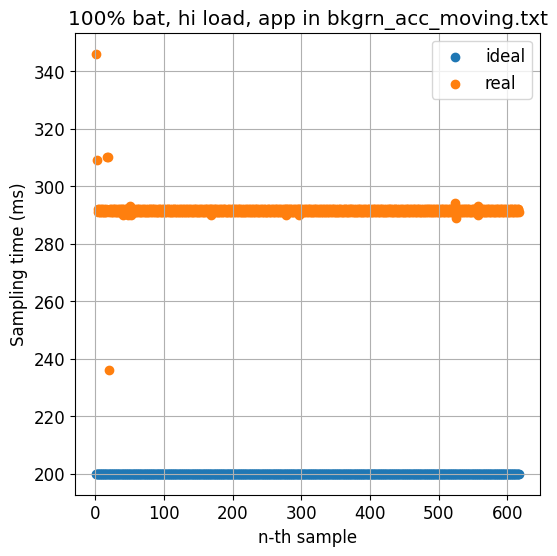

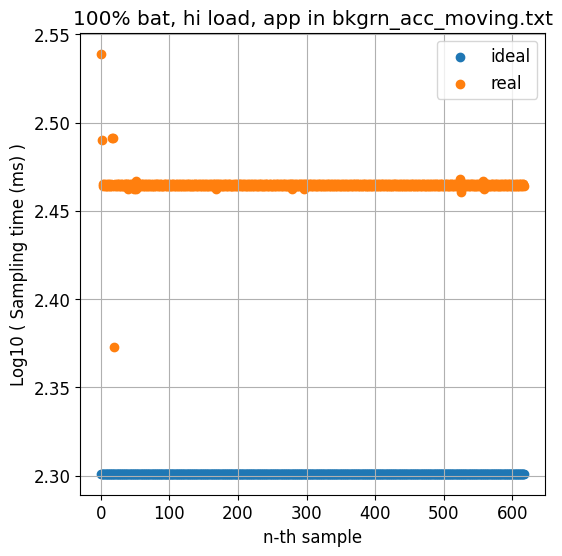

In [ ]:
obj = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc_moving.txt')
#obj.trim_data()


obj.print_raw_data()
obj.print_preprocessed_data()

obj.missing_samples(0, 1200, verbose=1)
display(obj.calculate_missing_interval(1))

obj.plot_missing_intervals(1)
plt.rcParams['font.size'] = 5
obj.plot_missing_intervals_color(1)

display(obj.calculate_missing_window(5, 3))
obj.plot_missing_window_color(5,3)
obj.plot_missing_window(2)

plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (8,6)
obj.plot_pmf(1)


obj.plot1()
obj.plot2()
obj.plot3()
obj.plot3_log()

## Plot Single

In [29]:
obj1 = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc.txt')
obj2 = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc_moving.txt')
obj3 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc.txt')
obj4 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc_moving.txt')
obj5 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc.txt')
obj6 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc_moving.txt')

### Probability Mass Funcrtion (PMF) plot

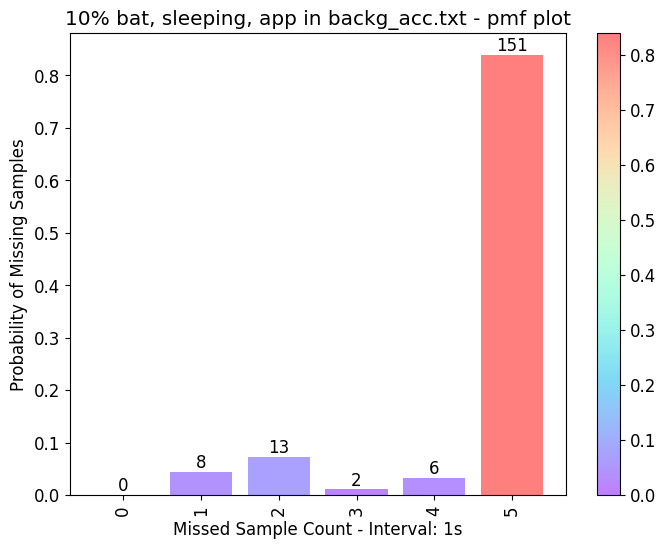

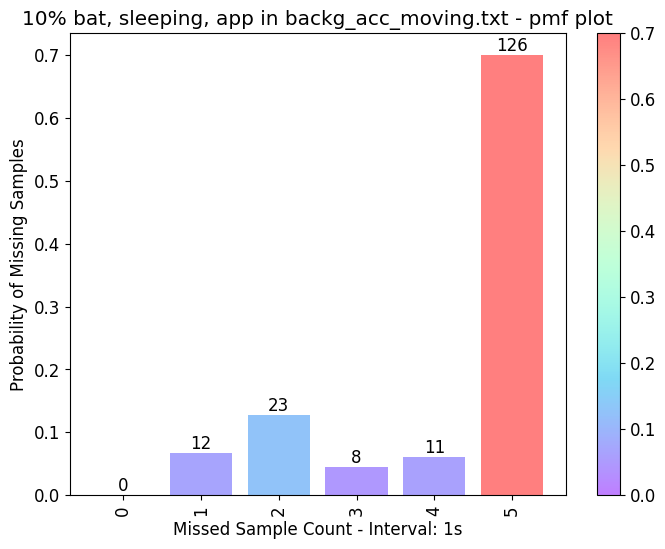

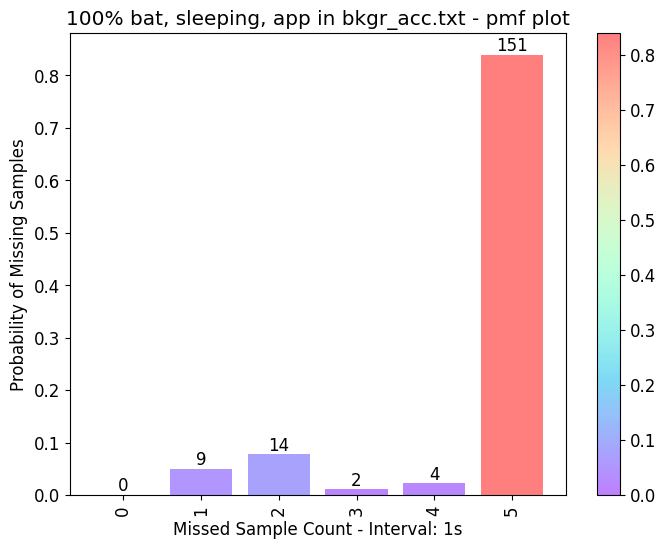

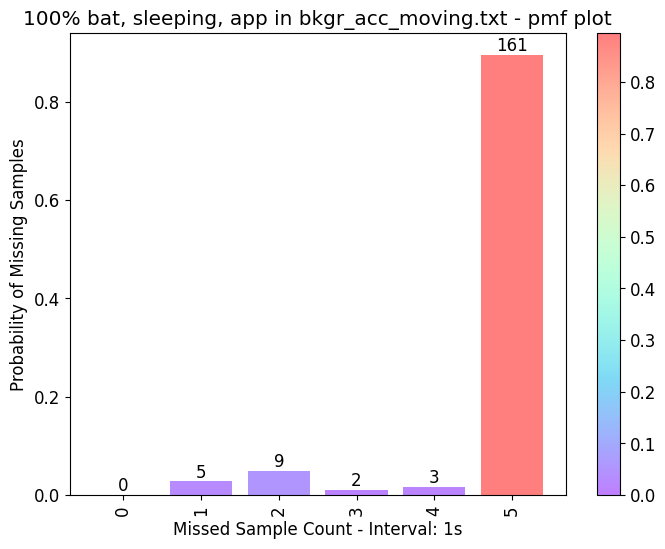

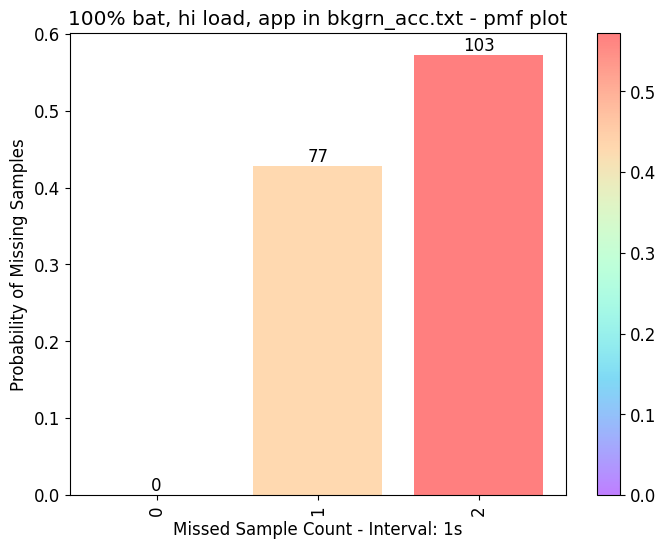

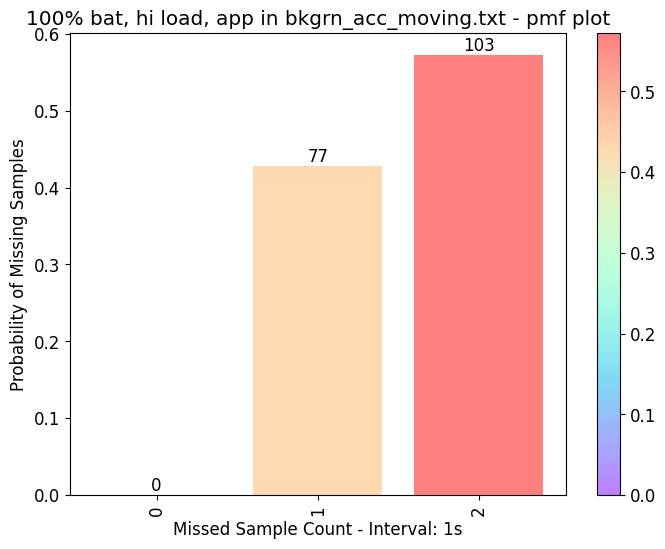

In [ ]:
plt.rcParams['font.size'] = 12

obj1.plot_pmf(1)
obj2.plot_pmf(1)
obj3.plot_pmf(1)
obj4.plot_pmf(1)
obj5.plot_pmf(1)
obj6.plot_pmf(1)

### Elapsed time of n-th sample

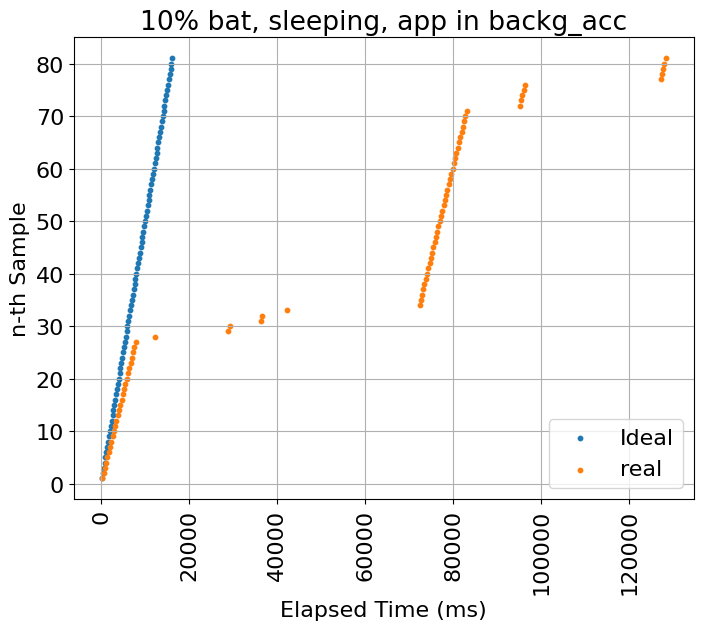

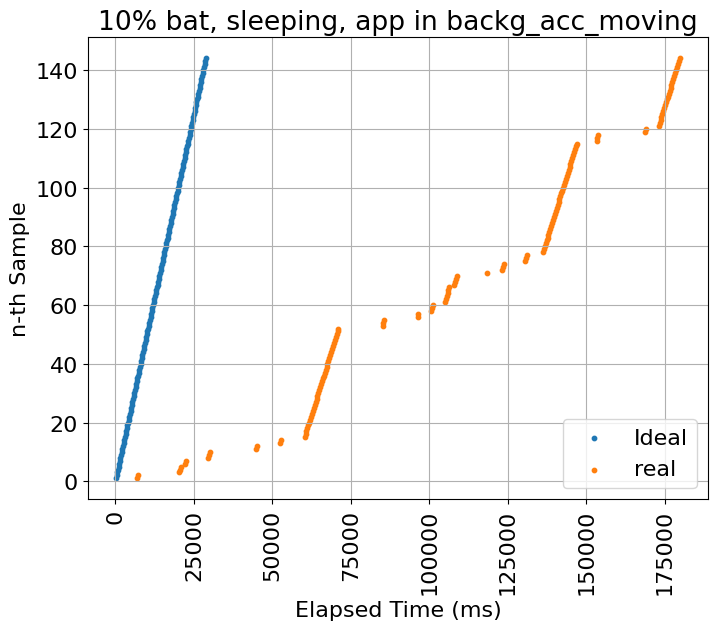

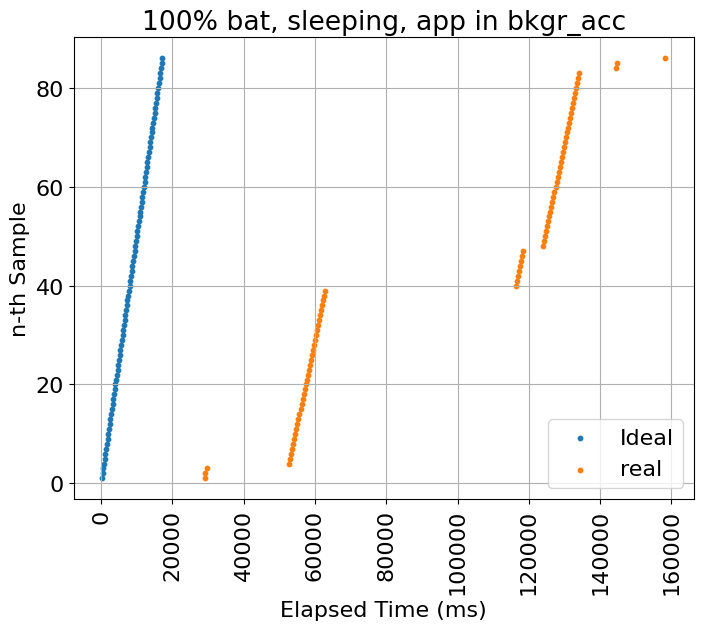

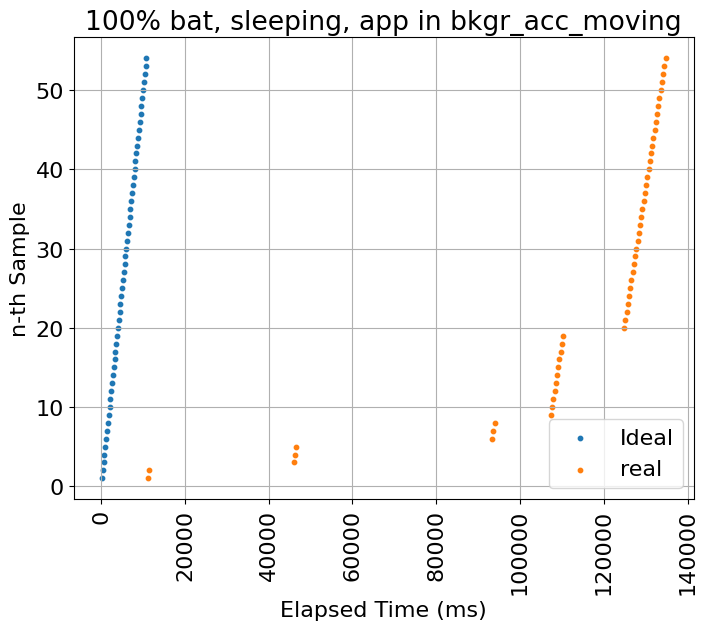

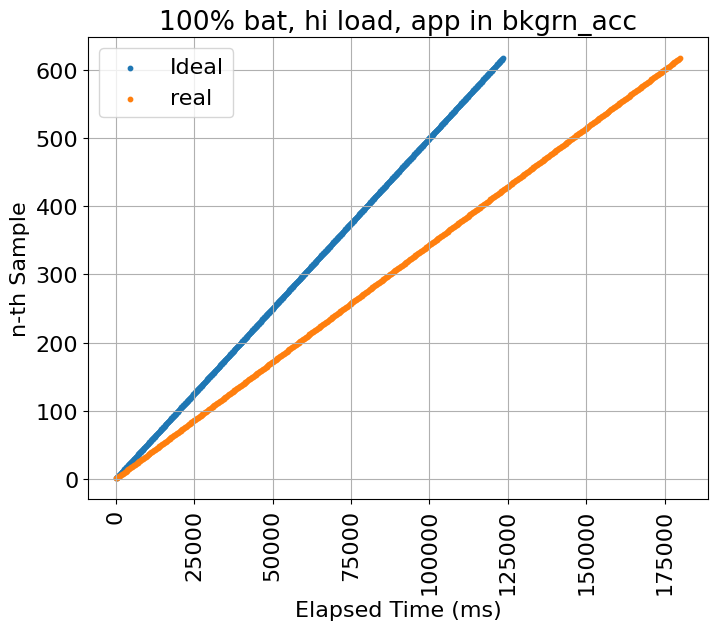

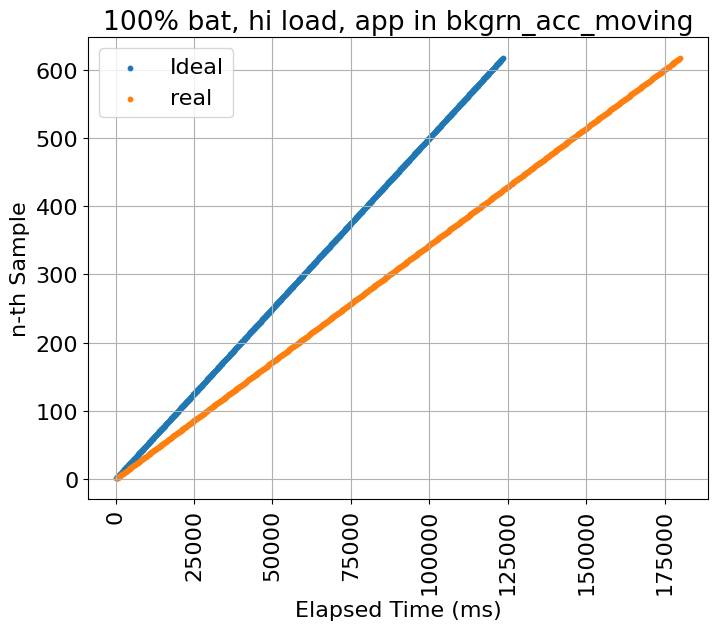

In [30]:
plt.rcParams['font.size'] = 16
plt.rcParams["figure.figsize"] = (8,6)

obj1.plot2()
obj2.plot2()
obj3.plot2()
obj4.plot2()
obj5.plot2()
obj6.plot2()

### Log Sampling period of n-th sample

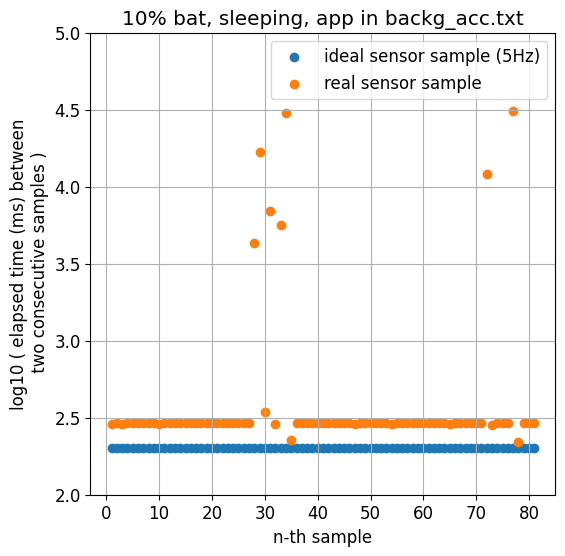

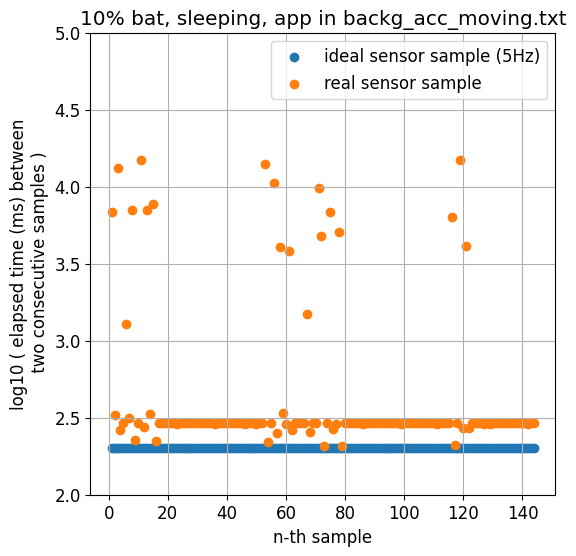

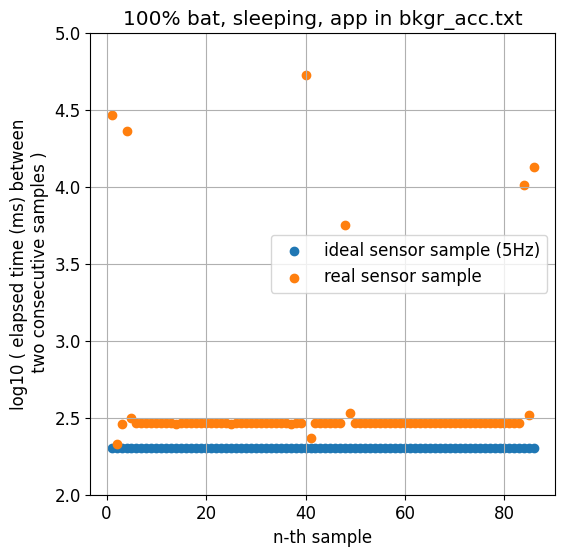

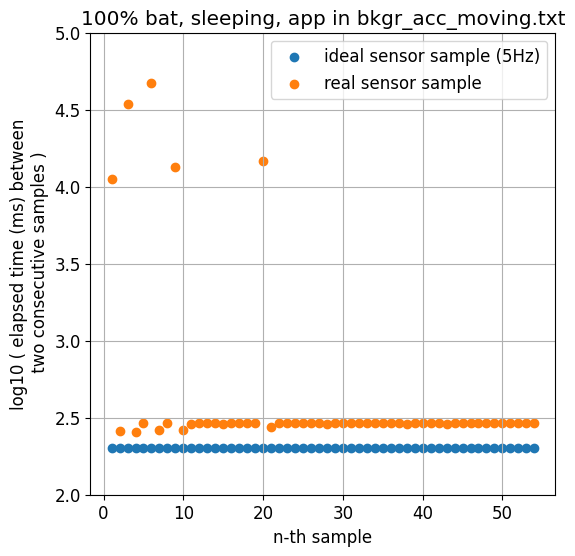

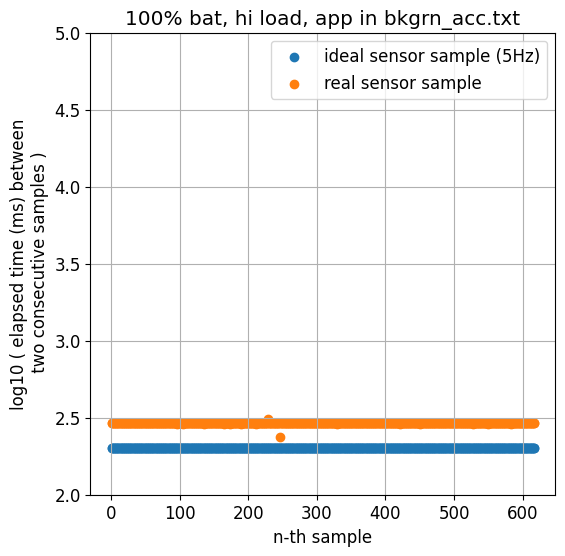

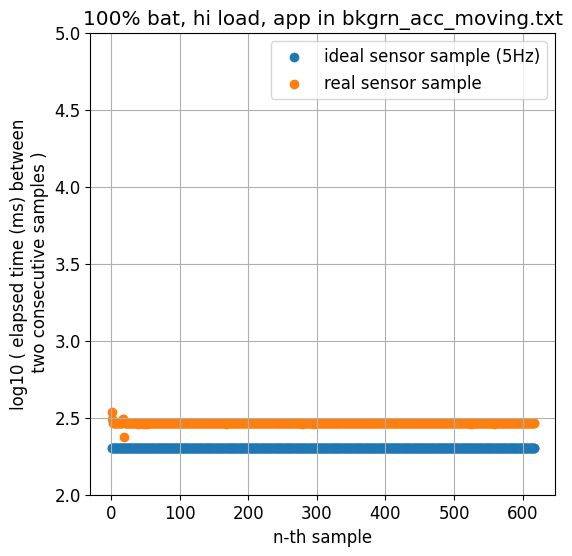

In [ ]:
plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (6,6)

obj1.plot3_log()
obj2.plot3_log()
obj3.plot3_log()
obj4.plot3_log()
obj5.plot3_log()
obj6.plot3_log()

## Compare

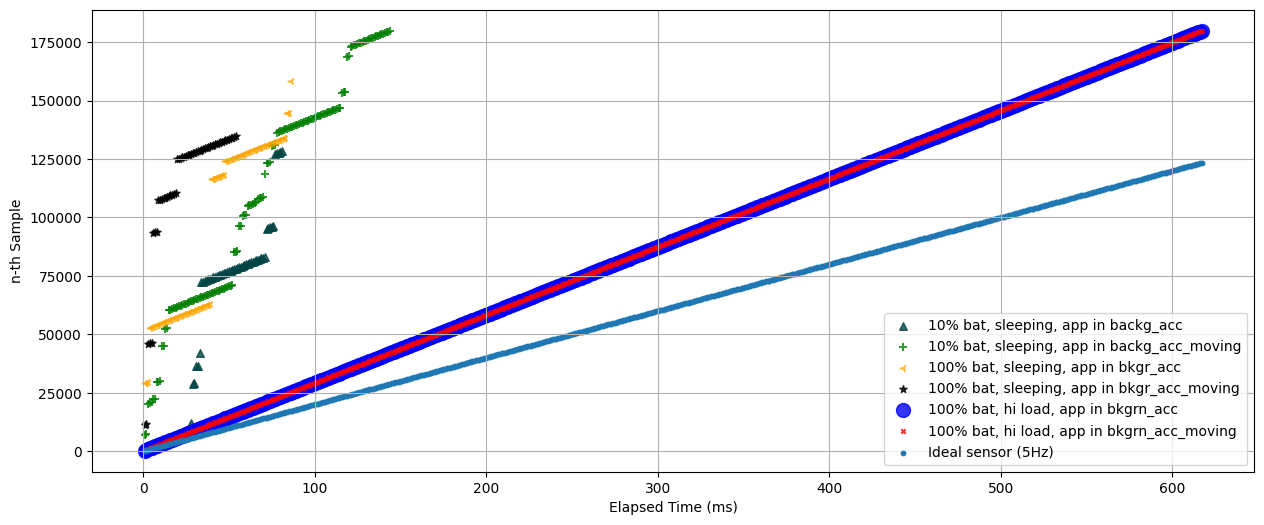

In [33]:
def plot_sampling_period_cm(objs = None, ideal = True):
  if objs == None:
    return
  if len(objs) == 0:
    return
  
  d = {}

  fig, ax = plt.subplots()

  max_len = 0
  max_len_obj = None
  count = 0
  markers = ['^', '+', '3', '*', 'o', 'x']
  
  #color
  color = ['#004444', 'green', 'orange', 'black', 'blue', 'red']

  for obj in objs:
    trimmed_dt_cm = obj.sensor_data_preprocessed['time elapsed2 (ms)'].to_list()
    d[obj.file] = trimmed_dt_cm
    sample = [i+1 for i in range(len(trimmed_dt_cm))]

    if obj.file == '100% bat, hi load, app in bkgrn_acc.txt':
      ax.scatter(sample, trimmed_dt_cm, label=obj.file[:-4], s=100, marker = markers[count], c=color[count], alpha=0.8)
    elif obj.file == '100% bat, hi load, app in bkgrn_acc_moving.txt':
      ax.scatter(sample, trimmed_dt_cm, label=obj.file[:-4], s=10, marker = markers[count], c=color[count], alpha=0.8)
    else:
      ax.scatter(sample, trimmed_dt_cm, label=obj.file[:-4], s=30, marker = markers[count], c=color[count], alpha=0.8)

    count+=1

    if max_len < len(trimmed_dt_cm):
      max_len = len(trimmed_dt_cm)
      max_len_obj = obj
  
  if ideal:
    ideal_dt_cm = max_len_obj.sensor_data_preprocessed['ideal time elapsed2 (ms)'].to_list() 
    sample = [i+1 for i in range(len(ideal_dt_cm))]
    ax.scatter(sample, ideal_dt_cm, label="Ideal sensor (5Hz)",s=10)

  # Set plot title and labels
  ax.set_xlabel('Elapsed Time (ms)')
  ax.set_ylabel('n-th Sample')

  # Add legend
  ax.legend()

  plt.rcParams["figure.figsize"] = (6,6)

  # Show the plot
  plt.grid()
  plt.show()


obj1 = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc.txt')
obj2 = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc_moving.txt')
obj3 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc.txt')
obj4 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc_moving.txt')
obj5 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc.txt')
obj6 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc_moving.txt')

plt.rcdefaults()
plt.rcParams["figure.figsize"] = (15,6)
d = plot_sampling_period_cm([obj1, obj2, obj3, obj4, obj5, obj6])

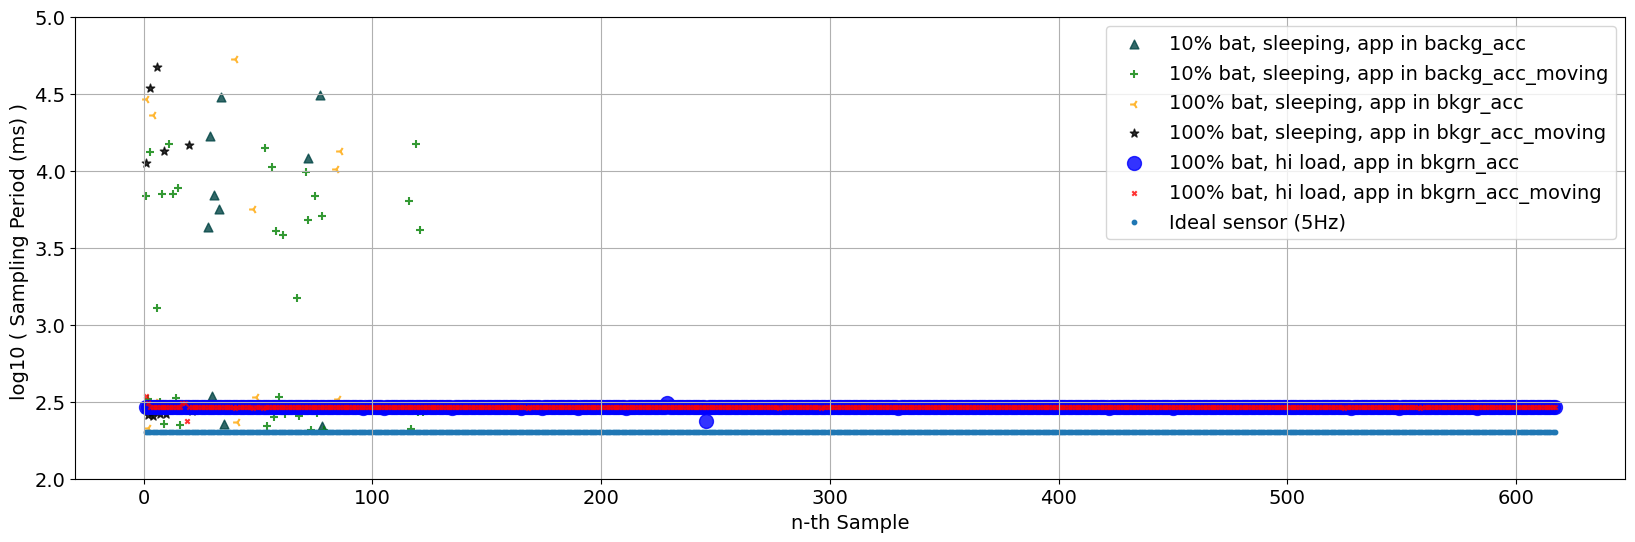

In [42]:
def plot_sampling_period_log(objs = None, ideal = True):
  if objs == None:
    return
  if len(objs) == 0:
    return
  
  d = {}

  fig, ax = plt.subplots()

  max_len = 0
  max_len_obj = None
  count = 0
  markers = ['^', '+', '3', '*', 'o', 'x']
  
  #color
  color = ['#004444', 'green', 'orange', 'black', 'blue', 'red']

  #, facecolors='none', edgecolors='r'

  for obj in objs:
    trimmed_dt = np.array(obj.sensor_data_preprocessed['sample period (ms)'].to_list())
    trimmed_dt_log = np.log10(trimmed_dt)
    #trimmed_dt_log = trimmed_dt
    sample = [i+1 for i in range(len(trimmed_dt))]

    if obj.file == '100% bat, hi load, app in bkgrn_acc.txt' or obj.file == '100% bat, hi load, app in bkgrn_gyro.txt':
      ax.scatter(sample, trimmed_dt_log, label=obj.file[:-4], s=100, marker = markers[count], c=color[count], alpha=0.8)
    elif obj.file == '100% bat, hi load, app in bkgrn_acc_moving.txt' or obj.file == '100% bat, hi load, app in bkgrn_gyro_moving.txt':
      ax.scatter(sample, trimmed_dt_log, label=obj.file[:-4], s=10, marker = markers[count], c=color[count], alpha=0.8)
    else:
      ax.scatter(sample, trimmed_dt_log, label=obj.file[:-4], s=40, marker = markers[count], c=color[count], alpha=0.8)

    count+=1

    if max_len < len(trimmed_dt):
      max_len = len(trimmed_dt)
      max_len_obj = obj
  
  if ideal:
    ideal_dt = max_len_obj.sensor_data_preprocessed['ideal period (ms)'].to_list() 
    ideal_dt_log = np.log10(ideal_dt)
    #ideal_dt_log = ideal_dt
    sample = [i+1 for i in range(len(ideal_dt_log))]
    ax.scatter(sample, ideal_dt_log, label="Ideal sensor (5Hz)",s=10)

  # Set plot title and labels
  ax.set_xlabel('n-th Sample')
  ax.set_ylabel('log10 ( Sampling Period (ms) ) ')

  # Add legend
  ax.legend()

  # plt.xlim((0, 1000))
  plt.ylim((2, 5))
  # Rotate x-axis tick labels by 90 degrees
  # plt.xticks(rotation=90)


  # Show the plot
  plt.grid()
  plt.show()

obj5 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc.txt')
obj6 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc_moving.txt')
obj1 = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc.txt')
obj2 = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc_moving.txt')
obj3 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc.txt')
obj4 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc_moving.txt')


plt.rcdefaults()
plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = (20,6)
d = plot_sampling_period_log([obj1, obj2, obj3, obj4, obj5, obj6])

# remove .txt
# change yellow color 
# no need to put "elapsed time" 

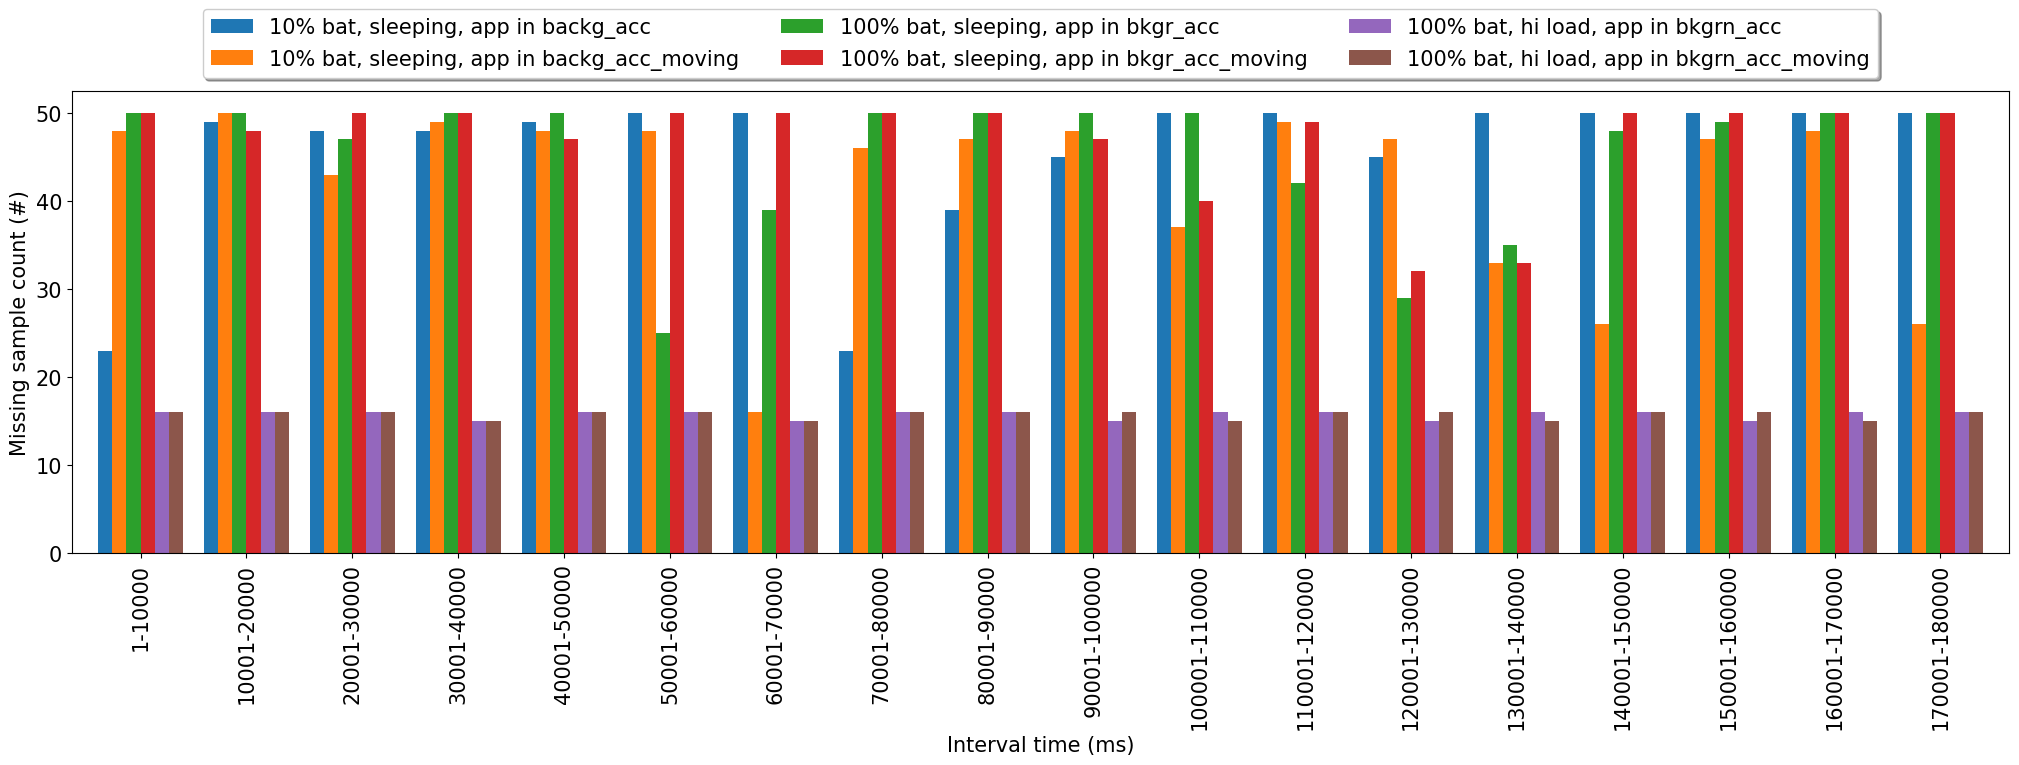

In [48]:
def multiple_plot_missing_intervals(objs = None, interval = 5):
  if objs == None:
    return
  if len(objs) == 0:
    return

  x = []
  y = []
  y_len = []
  max_x = []
  d = {}

  ideal_sampling_period = 200 #ms
  max_miss = int(interval*1000 // ideal_sampling_period)

  for obj in objs:
    obj1 = obj
    df1 = obj1.calculate_missing_interval(interval)
    x1 = df1['interval'].to_list()
    y1 = df1['missed samples'].to_list()
    d[obj.file[:-4]] = y1

  combined_pd = pd.DataFrame(d, index=x1)

  # Set the height and width of the bar plot
  fig, ax = plt.subplots(figsize=(25, 6))

  combined_pd.plot.bar(ax = ax, width=0.8)
  ax.legend(loc='upper center', bbox_to_anchor =(0.5,1.2),
          fancybox=True, shadow=True, ncol=3)
  
  # Set plot title and labels
  ax.set_xlabel('Interval time (ms)')
  ax.set_ylabel('Missing sample count (#)')
  
  return combined_pd


obj5 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc.txt')
obj6 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc_moving.txt')
obj1 = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc.txt')
obj2 = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc_moving.txt')
obj3 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc.txt')
obj4 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc_moving.txt')


interval = 10
plt.rcParams['font.size'] = 15
combined_pd_freq = multiple_plot_missing_intervals([obj1, obj2, obj3, obj4, obj5, obj6], interval)

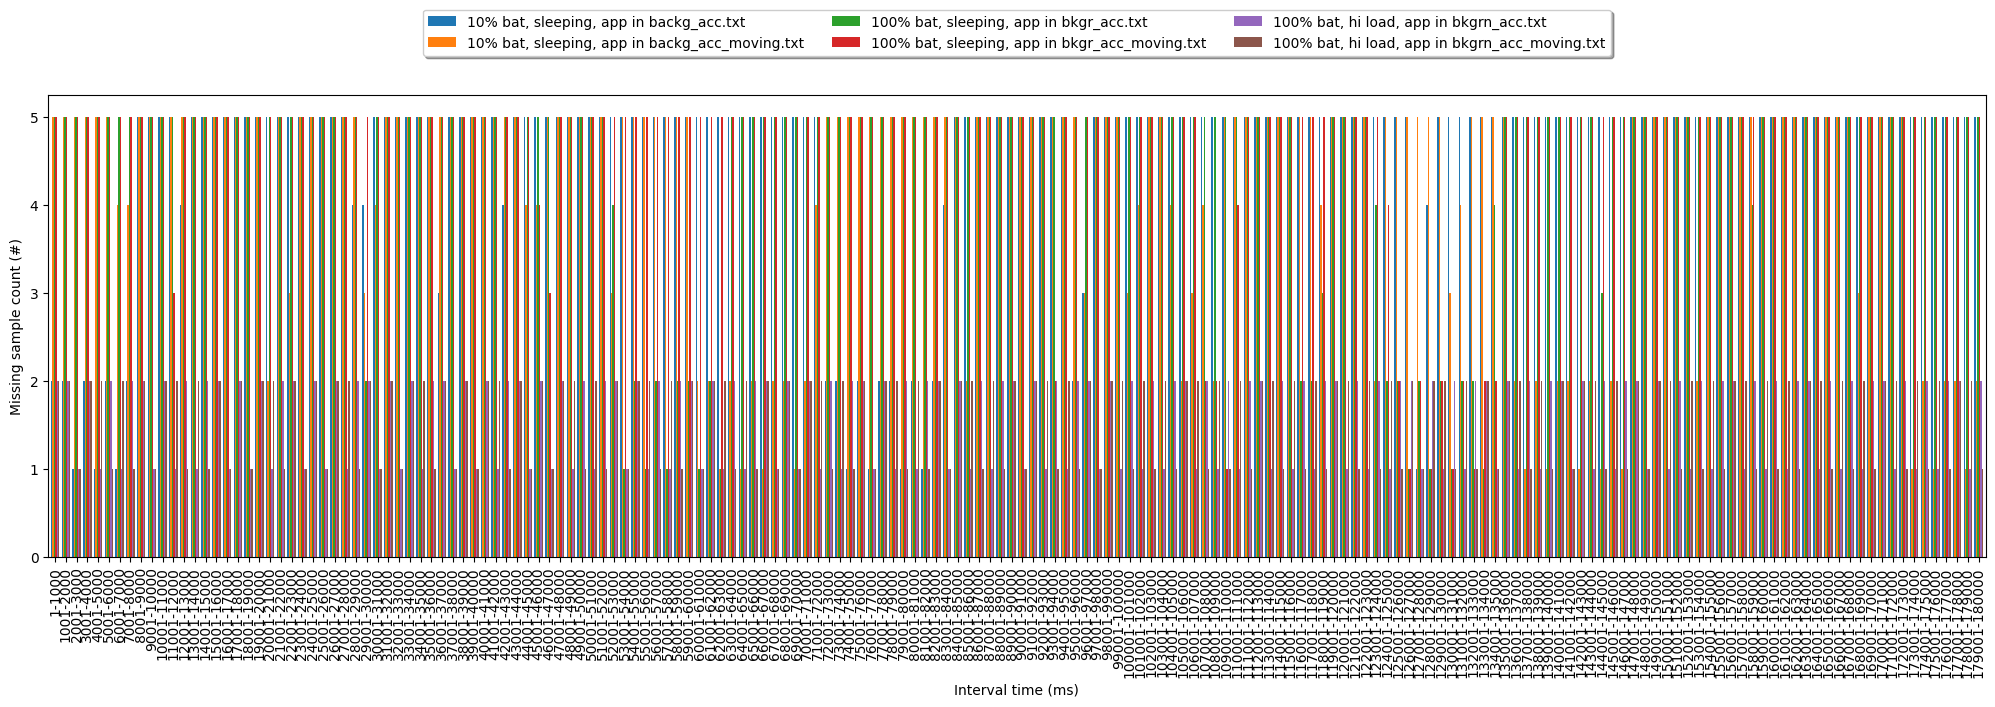

In [ ]:
interval = 1
plt.rcParams['font.size'] = 10
combined_pd_freq = multiple_plot_missing_intervals([obj1, obj2, obj3, obj4, obj5, obj6], interval)

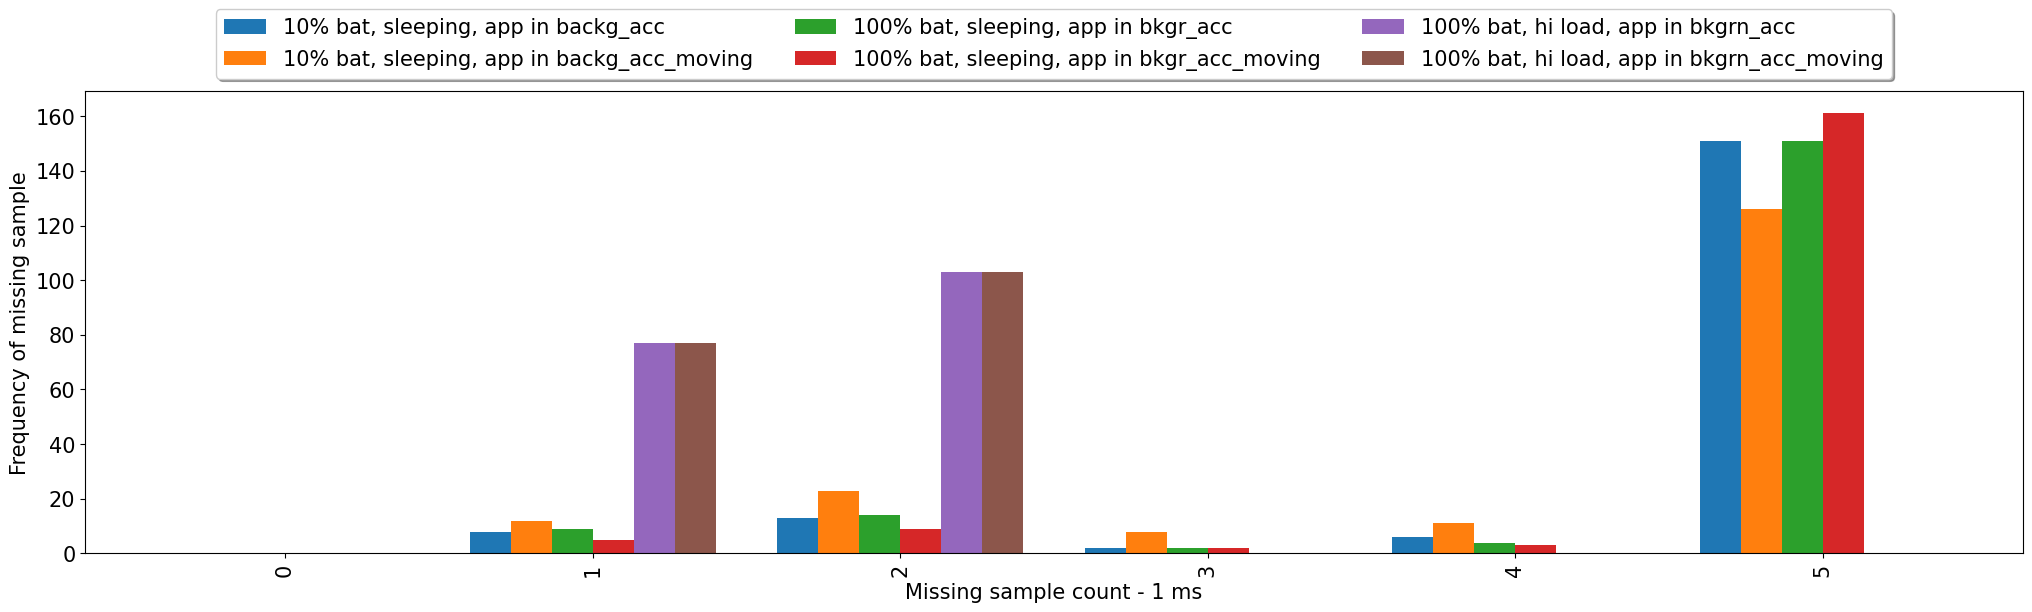

In [20]:
def multiple_plot_missing_pmf_freq(objs = None, interval = 5, display=True):
  if objs == None:
    return
  if len(objs) == 0:
    return
    
  x = []
  y = []
  y_len = []
  max_x = []
  d = {}


  # ideal_sampling_period = 200 #ms
  # max_miss = int(interval*1000 // ideal_sampling_period)
  max_miss = 0

  for obj in objs:
    obj1 = obj

    df1 = obj1.calculate_missing_interval(interval)

    MS = df1['missed samples'].to_list()
    
    # Count the frequency of each number
    counts = np.bincount(MS)

    # Divide each number by the divisor using a list comprehension
    y1 = list(counts)

    # Generate x-axis values
    x1 = np.arange(len(counts))

    x.append(x1)
    y.append(y1)
    y_len.append(len(y1))

    if len(max_x) < len(x1):
      max_x = x1
  
  max_len = max(y_len)
  for i in range(len(y)):
    if len(y[i]) < max_len:
      for j in range(len(y[i]), max_len):
        y[i].append(max_miss)
    
    d[objs[i].file[:-4]] = y[i]

  

  combined_pd = pd.DataFrame(d, index=max_x)

  if display:
    # Set the height and width of the bar plot
    fig, ax = plt.subplots(figsize=(25, 6))

    combined_pd.plot.bar(ax = ax, width=0.8)
    ax.legend(loc='upper center', bbox_to_anchor =(0.5,1.2),
            fancybox=True, shadow=True, ncol=3)
    
        # Set plot title and labels
    ax.set_xlabel('Missing sample count - ' + str(interval) + ' ms')
    ax.set_ylabel('Frequency of missing sample')


  
  return combined_pd


obj1 = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc.txt')
obj2 = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc_moving.txt')
obj3 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc.txt')
obj4 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc_moving.txt')
obj5 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc.txt')
obj6 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc_moving.txt')

interval = 1
plt.rcParams['font.size'] = 15
combined_pd_freq = multiple_plot_missing_pmf_freq([obj1, obj2, obj3, obj4, obj5, obj6], interval)

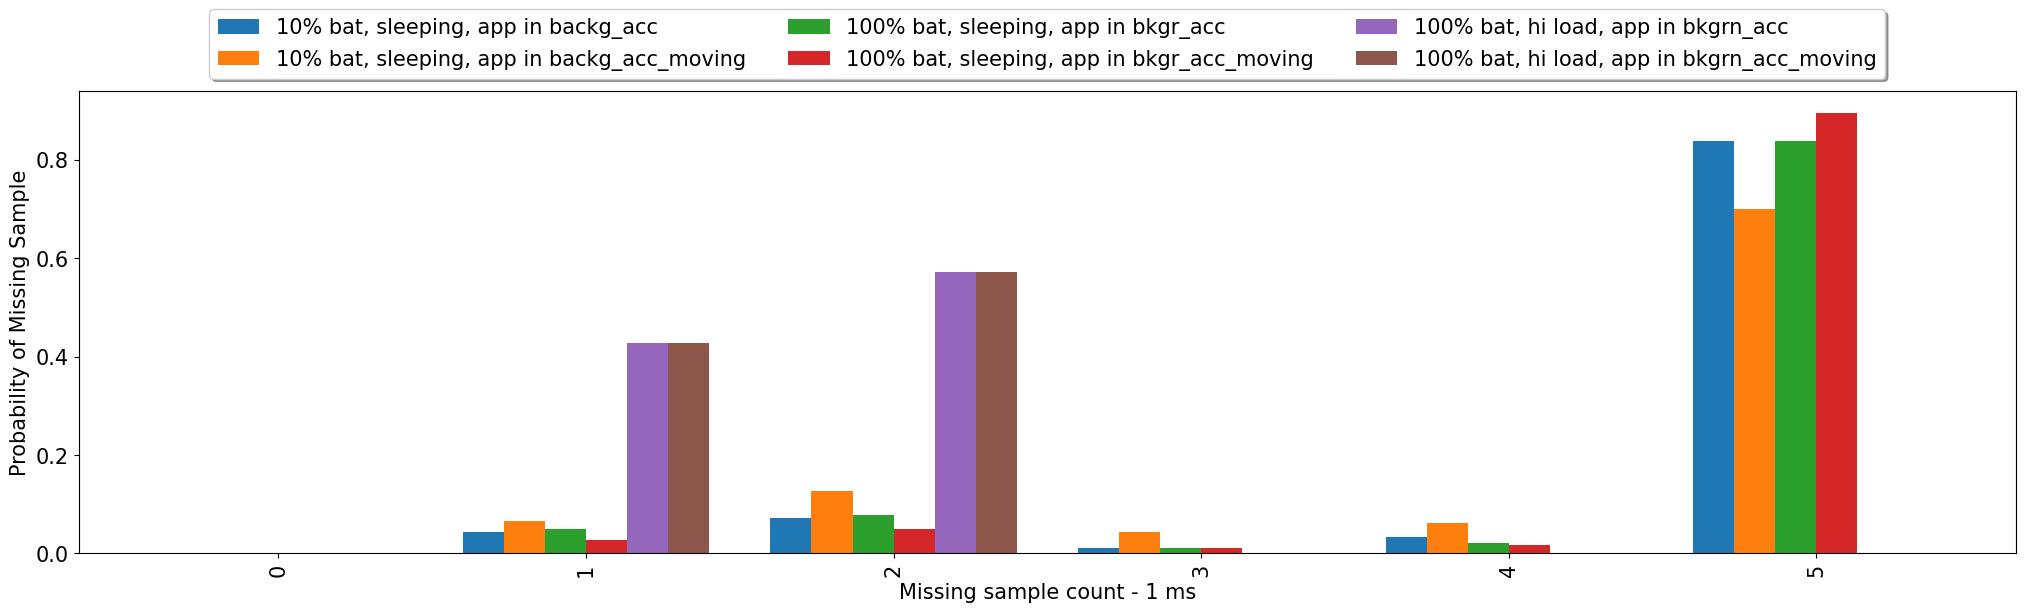

In [25]:
def multiple_plot_missing_pmf(objs = None, interval = 5):
  if objs == None:
    return
  if len(objs) == 0:
    return

  d = {}
  combined_pd_freq = multiple_plot_missing_pmf_freq(objs, interval, display=False)

  for obj in objs:

    # Example list of numbers
    numbers = combined_pd_freq[obj.file[:-4]].to_list()

    # Integer to divide by
    divisor = sum(numbers)

    # Divide each number by the divisor using a list comprehension
    probability = [num / divisor for num in numbers]

    d[obj.file[:-4]] = probability


  combined_pd = pd.DataFrame(d, index=combined_pd_freq.index.to_list())

  # Set the height and width of the bar plot
  fig, ax = plt.subplots(figsize=(25, 6))

  combined_pd.plot.bar(ax = ax, width=0.8)
  ax.legend(loc='upper center', bbox_to_anchor =(0.5,1.2),
          fancybox=True, shadow=True, ncol=3)

    # Set plot title and labels
  ax.set_xlabel('Missing sample count - ' + str(interval) + ' ms')
  ax.set_ylabel('Probability of Missing Sample')

  return combined_pd

obj1 = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc.txt')
obj2 = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc_moving.txt')
obj3 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc.txt')
obj4 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_acc_moving.txt')
obj5 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc.txt')
obj6 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc_moving.txt')

interval = 1
plt.rcParams['font.size'] = 15
combined_pd_freq = multiple_plot_missing_pmf([obj1, obj2, obj3, obj4, obj5, obj6], interval)

## Data Exploration

In [ ]:
obj1 = Missing_Data_Analysis('10% bat, sleeping, app in backg_acc.txt')
obj2 = Missing_Data_Analysis('10% bat, speeping, app in backg_acc_moving.txt')
obj3 = Missing_Data_Analysis('100% bat, speeping, app in bkgr_acc.txt')
obj4 = Missing_Data_Analysis('100% bat, speeping, app in bkgr_acc_moving.txt')
obj5 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc.txt')
obj6 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_acc_moving.txt')


In [ ]:
obj1.raw_sensor_data

Acc_timestamp      Acc_x      Acc_y        Acc_z
0    1678595952366   2.242673   9.499506    -1.244866
1    1678595952657  2.2558336  9.5048895   -1.1497513
2    1678595952950  2.3700907   9.503095   -1.2209377
3    1678595953239   2.210968   9.529416  -0.87338024
4    1678595953531  2.2582264   9.544372     -1.14018
..             ...        ...        ...          ...
141  1678596328041  2.9635108   9.323035   -1.1048858
142  1678596328331  2.9102705   9.312267   -1.2532408
143  1678596328623  2.8929226   9.347562   -1.1958131
144  1678596328914   2.906083   9.330214   -1.0695918
145  1678596329207  2.5896323    9.38824   -1.3016955

[146 rows x 4 columns]

In [ ]:
obj1.process_all_data()

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0      1678595952657                 1             0.291              0.000   
1      1678595952950                 2             0.584              0.000   
2      1678595953239                 3             0.873              0.000   
3      1678595953531                 4             1.165              0.000   
4      1678595953822                 5             1.456              0.000   
..               ...               ...               ...                ...   
140    1678596328041               141           375.675            345.880   
141    1678596328331               142           375.965            346.170   
142    1678596328623               143           376.257            346.462   
143    1678596328914               144           376.548            346.753   
144    1678596329207               145           376.841            347.046   

     time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                     0                 291                200   
1                     0                 293                200   
2                     0                 289                200   
3                     0                 292                200   
4                     0                 291                200   
..                  ...                 ...                ...   
140              345880                 292                200   
141              346170                 290                200   
142              346462                 292                200   
143              346753                 291                200   
144              347046                 293                200   

     ideal time elapsed2 (ms)      Acc_x      Acc_y        Acc_z  
0                           0  2.2558336  9.5048895   -1.1497513  
1                           0  2.3700907   9.503095   -1.2209377  
2                           0   2.210968   9.529416  -0.87338024  
3                           0  2.2582264   9.544372     -1.14018  
4                           0  2.2546372   9.537791   -1.0887343  
..                        ...        ...        ...          ...  
140                     21400  2.9635108   9.323035   -1.1048858  
141                     21600  2.9102705   9.312267   -1.2532408  
142                     21800  2.8929226   9.347562   -1.1958131  
143                     22000   2.906083   9.330214   -1.0695918  
144                     22200  2.5896323    9.38824   -1.3016955  

[145 rows x 11 columns]

In [ ]:
obj2.process_all_data()

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0      1680235602566                 1             0.292              0.000   
1      1680235602856                 2             0.582              0.000   
2      1680235603147                 3             0.873              0.000   
3      1680235603439                 4             1.165              0.000   
4      1680235603785                 5             1.511              0.000   
..               ...               ...               ...                ...   
306    1680235923633               307           321.359            296.464   
307    1680235923925               308           321.651            296.756   
308    1680235924216               309           321.942            297.047   
309    1680235924510               310           322.236            297.341   
310    1680235924800               311           322.526            297.631   

     time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                     0                 292                200   
1                     0                 290                200   
2                     0                 291                200   
3                     0                 292                200   
4                     0                 346                200   
..                  ...                 ...                ...   
306              296464                 291                200   
307              296756                 292                200   
308              297047                 291                200   
309              297341                 294                200   
310              297631                 290                200   

     ideal time elapsed2 (ms)         Acc_x      Acc_y      Acc_z  
0                           0    -1.0594223   4.347759   8.889935  
1                           0  -0.024526432  3.9128633   7.896913  
2                           0    0.15134603   4.305286   8.833703  
3                           0     1.4901303  5.1990056   8.356933  
4                           0   -0.25184458  3.9984066   8.094919  
..                        ...           ...        ...        ...  
306                     51200     -0.401396   8.152945  5.3359947  
307                     51400   -0.30867413  7.9854474    5.48076  
308                     51600    -1.1503495    8.41795  4.5619164  
309                     51800   -0.74895346   8.328817  5.1062837  
310                     52000   -0.89431745   8.505288   4.875974  

[311 rows x 11 columns]

In [ ]:
obj3.process_all_data()

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0      1678656023432                 1             0.292              0.000   
1      1678656023723                 2             0.583              0.000   
2      1678656024015                 3             0.875              0.000   
3      1678656024304                 4             1.164              0.000   
4      1678656024597                 5             1.457              0.000   
..               ...               ...               ...                ...   
226    1678656410314               227           387.174            378.524   
227    1678656410605               228           387.465            378.815   
228    1678656410897               229           387.757            379.107   
229    1678656411189               230           388.049            379.399   
230    1678656411480               231           388.340            379.690   

     time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                     0                 292                200   
1                     0                 291                200   
2                     0                 292                200   
3                     0                 289                200   
4                     0                 293                200   
..                  ...                 ...                ...   
226              378524                 292                200   
227              378815                 291                200   
228              379107                 292                200   
229              379399                 292                200   
230              379690                 291                200   

     ideal time elapsed2 (ms)      Acc_x     Acc_y         Acc_z  
0                           0  1.5457634  9.731011   -0.74536425  
1                           0  1.9651057  9.597013   -0.05742774  
2                           0  1.9657038  9.613763   -0.11964113  
3                           0  2.0195422  9.630513   -0.50009996  
4                           0  1.9615164  9.638887   -0.14476576  
..                        ...        ...       ...           ...  
226                     39600   2.370689  9.568299  0.0035892338  
227                     39800   2.449054  9.528818   0.111266255  
228                     40000  2.2360928   9.58804   -0.28175488  
229                     40200   1.698904  9.717253   -0.76989067  
230                     40400   1.942972  9.635299   -0.42771706  

[231 rows x 11 columns]

In [ ]:
obj4.process_all_data()

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0      1680314249707                 1             0.292              0.000   
1      1680314249998                 2             0.583              0.000   
2      1680314250289                 3             0.874              0.000   
3      1680314250580                 4             1.165              0.000   
4      1680314250872                 5             1.457              0.000   
..               ...               ...               ...                ...   
281    1680314626085               282           376.670            355.998   
282    1680314626377               283           376.962            356.290   
283    1680314626668               284           377.253            356.581   
284    1680314626960               285           377.545            356.873   
285    1680314627251               286           377.836            357.164   

     time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                     0                 292                200   
1                     0                 291                200   
2                     0                 291                200   
3                     0                 291                200   
4                     0                 292                200   
..                  ...                 ...                ...   
281              355998                 291                200   
282              356290                 292                200   
283              356581                 291                200   
284              356873                 292                200   
285              357164                 291                200   

     ideal time elapsed2 (ms)         Acc_x       Acc_y      Acc_z  
0                           0   -0.18065812   0.5802595   9.679565  
1                           0   -0.14476576   0.5940182   9.672387  
2                           0   0.008973085  0.66759753   9.675977  
3                           0  -0.050249275   0.6412765  9.7196455  
4                           0    -0.0741775  0.61914283    9.72144  
..                        ...           ...         ...        ...  
281                     45800     -0.910469   7.0372915   7.016354  
282                     46000    -1.5326029    7.426125  6.0526447  
283                     46200    -1.8999012   7.6887374  5.6560345  
284                     46400    -1.8317057   7.6749787  5.7020965  
285                     46600    -2.2127628    7.893324   5.189434  

[286 rows x 11 columns]

In [ ]:
obj5.process_all_data()

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0      1678659635391                 1             0.291              0.000   
1      1678659635683                 2             0.583              0.000   
2      1678659635974                 3             0.874              0.000   
3      1678659636265                 4             1.165              0.000   
4      1678659636557                 5             1.457              0.000   
..               ...               ...               ...                ...   
933    1678659907147               934           272.047            242.141   
934    1678659907439               935           272.339            242.433   
935    1678659907730               936           272.630            242.724   
936    1678659908022               937           272.922            243.016   
937    1678659908313               938           273.213            243.307   

     time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                     0                 291                200   
1                     0                 292                200   
2                     0                 291                200   
3                     0                 291                200   
4                     0                 292                200   
..                  ...                 ...                ...   
933              242141                 291                200   
934              242433                 292                200   
935              242724                 291                200   
936              243016                 292                200   
937              243307                 291                200   

     ideal time elapsed2 (ms)       Acc_x      Acc_y       Acc_z  
0                           0    2.009971   9.512068  -1.4219348  
1                           0   2.2420747    9.51805  -1.2873386  
2                           0   2.1822543   9.547362  -1.2556337  
3                           0   2.2007985  9.5252285  -1.3124632  
4                           0   2.1972094   9.525827  -1.2083755  
..                        ...         ...        ...         ...  
933                    166200  0.47916272  0.6969096    9.690931  
934                    166400   0.4761717  0.6963114    9.686146  
935                    166600  0.47736812  0.6987042     9.68495  
936                    166800   0.4779663  0.6903293    9.684352  
937                    167000  0.47138608   0.695115    9.639486  

[938 rows x 11 columns]

In [ ]:
obj6.process_all_data()

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0       1680315288992                 1             0.292              0.000   
1       1680315289282                 2             0.582              0.000   
2       1680315289574                 3             0.874              0.000   
3       1680315289865                 4             1.165              0.000   
4       1680315290157                 5             1.457              0.000   
...               ...               ...               ...                ...   
1324    1680315674871              1325           386.171            356.190   
1325    1680315675162              1326           386.462            356.481   
1326    1680315675452              1327           386.752            356.771   
1327    1680315675744              1328           387.044            357.063   
1328    1680315676036              1329           387.336            357.355   

      time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                      0                 292                200   
1                      0                 290                200   
2                      0                 292                200   
3                      0                 291                200   
4                      0                 292                200   
...                  ...                 ...                ...   
1324              356190                 292                200   
1325              356481                 291                200   
1326              356771                 290                200   
1327              357063                 292                200   
1328              357355                 292                200   

      ideal time elapsed2 (ms)        Acc_x        Acc_y      Acc_z  
0                            0    -1.006182   -0.1698904   9.632906  
1                            0  -0.99661064   -0.1585245   9.656236  
2                            0   -0.9942178  -0.15493527    9.64487  
3                            0   -0.9936196  -0.15732808   9.646665  
4                            0   -1.0175478  -0.18185452   9.640682  
...                        ...          ...          ...        ...  
1324                    244400   -2.0285153    7.9160557  5.4634123  
1325                    244600   -2.1020947    7.9100733   5.548956  
1326                    244800   -2.0578275     7.973483  5.4592247  
1327                    245000   -1.9172492     7.938189  5.3623157  
1328                    245200    -1.989632     7.878967  5.4412785  

[1329 rows x 11 columns]

# Gyroscope

In [49]:
obj1 = Missing_Data_Analysis('10% bat, sleeping, app in backg_gyro.txt')
obj2 = Missing_Data_Analysis('10% bat, sleeping, app in backg_gyro_moving.txt')
obj3 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_gyro.txt')
obj4 = Missing_Data_Analysis('100% bat, sleeping, app in bkgr_gyro_moving.txt')
obj5 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_gyro.txt')
obj6 = Missing_Data_Analysis('100% bat, hi load, app in bkgrn_gyro_moving.txt')

In [ ]:
'10% bat, sleeping, app in backg_gyro.txt'
'10% bat, sleeping, app in backg_gyro_moving.txt'
'100% bat, sleeping, app in bkgr_gyro.txt'
'100% bat, sleeping, app in bkgr_gyro_moving.txt'
'100% bat, hi load, app in bkgrn_gyro.txt'
'100% bat, hi load, app in bkgrn_gyro_moving.txt'

## Data Check

In [ ]:
obj1.sensor_data_preprocessed

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0     1678595982433                 1            30.158              0.290   
1     1678595982726                 2            30.451              0.583   
2     1678595983015                 3            30.740              0.872   
3     1678595983309                 4            31.034              1.166   
4     1678595983600                 5            31.325              1.457   
..              ...               ...               ...                ...   
79    1678596109348                80           157.073            127.205   
80    1678596109567                81           157.292            127.424   
81    1678596109858                82           157.583            127.715   
82    1678596110150                83           157.875            128.007   
83    1678596110441                84           158.166            128.298   

    time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                  290                 290                200   
1                  583                 293                200   
2                  872                 289                200   
3                 1166                 294                200   
4                 1457                 291                200   
..                 ...                 ...                ...   
79              127205               30576                200   
80              127424                 219                200   
81              127715                 291                200   
82              128007                 292                200   
83              128298                 291                200   

    ideal time elapsed2 (ms)              x              y              z  
0                        200   -9.162979E-4  -7.6358154E-4   1.5271631E-4  
1                        400   0.0016798794   0.0025961774  -1.5271631E-4  
2                        600  -6.1086525E-4  -3.0543262E-4  -3.0543262E-4  
3                        800   3.0543262E-4   0.0015271631  -1.5271631E-4  
4                       1000  -0.0012217305  -0.0015271631            0.0  
..                       ...            ...            ...            ...  
79                     16000   0.0030543262    0.004428773  -4.5814895E-4  
80                     16200  -3.0543262E-4  -7.6358154E-4   1.5271631E-4  
81                     16400   0.0010690142    9.162979E-4   1.5271631E-4  
82                     16600  -1.5271631E-4  -0.0021380284            0.0  
83                     16800  -4.5814895E-4  -7.6358154E-4  -1.5271631E-4  

[84 rows x 11 columns]

In [ ]:
obj2.sensor_data_preprocessed

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0      1680235633984                 1            31.693              6.841   
1      1680235634283                 2            31.992              7.140   
2      1680235647500                 3            45.209             20.357   
3      1680235647750                 4            45.459             20.607   
4      1680235648041                 5            45.750             20.898   
..               ...               ...               ...                ...   
141    1680235805750               142           203.459            178.607   
142    1680235806041               143           203.750            178.898   
143    1680235806332               144           204.041            179.189   
144    1680235806624               145           204.333            179.481   
145    1680235806915               146           204.624            179.772   

     time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                  6841                6841                200   
1                  7140                 299                200   
2                 20357               13217                200   
3                 20607                 250                200   
4                 20898                 291                200   
..                  ...                 ...                ...   
141              178607                 292                200   
142              178898                 291                200   
143              179189                 291                200   
144              179481                 292                200   
145              179772                 291                200   

     ideal time elapsed2 (ms)            x            y              z  
0                         200   0.00580322   0.14676037    -0.16233744  
1                         400   -1.2394456   -2.4685066    -0.26923886  
2                         600  -0.42439863   -0.5589417   -0.047647487  
3                         800  -0.24938573   -0.5102252      0.2565634  
4                        1000   -0.8370381   -1.8791742    -0.16646078  
..                        ...          ...          ...            ...  
141                     28400  0.047036625    0.8249735   -0.037873644  
142                     28600   0.16294831  -0.19425514  -0.0056505036  
143                     28800    1.1734722    1.6050484    -0.16737708  
144                     29000  -0.04734206   0.36651915      0.1638646  
145                     29200    -1.328021   -1.2889256    -0.31688634  

[146 rows x 11 columns]

In [ ]:
obj3.sensor_data_preprocessed

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0     1678656060861                 1            37.667             29.029   
1     1678656061093                 2            37.899             29.261   
2     1678656061384                 3            38.190             29.552   
3     1678656084506                 4            61.312             52.674   
4     1678656084838                 5            61.644             53.006   
..              ...               ...               ...                ...   
80    1678656165677                81           142.483            133.845   
81    1678656165968                82           142.774            134.136   
82    1678656176292                83           153.098            144.460   
83    1678656176604                84           153.410            144.772   
84    1678656190137                85           166.943            158.305   

    time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                29029               29029                200   
1                29261                 232                200   
2                29552                 291                200   
3                52674               23122                200   
4                53006                 332                200   
..                 ...                 ...                ...   
80              133845                 292                200   
81              134136                 291                200   
82              144460               10324                200   
83              144772                 312                200   
84              158305               13533                200   

    ideal time elapsed2 (ms)              x              y              z  
0                        200   0.0021380284           -0.0  -3.0543262E-4  
1                        400  -1.5271631E-4   3.0543262E-4   3.0543262E-4  
2                        600            0.0            0.0   3.0543262E-4  
3                        800  -7.6358154E-4   4.5814895E-4   3.0543262E-4  
4                       1000   4.5814895E-4  -6.1086525E-4           -0.0  
..                       ...            ...            ...            ...  
80                     16200  -4.5814895E-4   6.1086525E-4   1.5271631E-4  
81                     16400   3.0543262E-4  -6.1086525E-4   1.5271631E-4  
82                     16600   7.6358154E-4  -1.5271631E-4  -1.5271631E-4  
83                     16800  -3.0543262E-4            0.0  -1.5271631E-4  
84                     17000   4.5814895E-4            0.0           -0.0  

[85 rows x 11 columns]

In [ ]:
obj4.sensor_data_preprocessed

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0     1680314281283                 1            31.654             11.301   
1     1680314281532                 2            31.903             11.550   
2     1680314316016                 3            66.387             46.034   
3     1680314316265                 4            66.636             46.283   
4     1680314316557                 5            66.928             46.575   
5     1680314363466                 6           113.837             93.484   
6     1680314363718                 7           114.089             93.736   
7     1680314364010                 8           114.381             94.028   
8     1680314377469                 9           127.840            107.487   
9     1680314377723                10           128.094            107.741   
10    1680314378012                11           128.383            108.030   
11    1680314378306                12           128.677            108.324   
12    1680314378595                13           128.966            108.613   
13    1680314378888                14           129.259            108.906   
14    1680314379179                15           129.550            109.197   
15    1680314379471                16           129.842            109.489   
16    1680314379762                17           130.133            109.780   
17    1680314380054                18           130.425            110.072   
18    1680314380346                19           130.717            110.364   
19    1680314394939                20           145.310            124.957   
20    1680314395196                21           145.567            125.214   
21    1680314395487                22           145.858            125.505   
22    1680314395778                23           146.149            125.796   
23    1680314396070                24           146.441            126.088   
24    1680314396361                25           146.732            126.379   
25    1680314396653                26           147.024            126.671   
26    1680314396944                27           147.315            126.962   
27    1680314397234                28           147.605            127.252   
28    1680314397527                29           147.898            127.545   
29    1680314397819                30           148.190            127.837   
30    1680314398110                31           148.481            128.128   
31    1680314398401                32           148.772            128.419   
32    1680314398693                33           149.064            128.711   
33    1680314398984                34           149.355            129.002   
34    1680314399275                35           149.646            129.293   
35    1680314399566                36           149.937            129.584   
36    1680314399858                37           150.229            129.876   
37    1680314400148                38           150.519            130.166   
38    1680314400440                39           150.811            130.458   
39    1680314400732                40           151.103            130.750   
40    1680314401023                41           151.394            131.041   
41    1680314401315                42           151.686            131.333   
42    1680314401606                43           151.977            131.624   
43    1680314401897                44           152.268            131.915   
44    1680314402189                45           152.560            132.207   
45    1680314402480                46           152.851            132.498   
46    1680314402771                47           153.142            132.789   
47    1680314403063                48           153.434            133.081   
48    1680314403354                49           153.725            133.372   
49    1680314403645                50           154.016            133.663   
50    1680314403937       

In [ ]:
obj5.sensor_data_preprocessed

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0      1678659665151                 1            30.106              0.291   
1      1678659665442                 2            30.397              0.582   
2      1678659665734                 3            30.689              0.874   
3      1678659666025                 4            30.980              1.165   
4      1678659666317                 5            31.272              1.457   
..               ...               ...               ...                ...   
613    1678659843649               614           208.604            178.789   
614    1678659843941               615           208.896            179.081   
615    1678659844232               616           209.187            179.372   
616    1678659844523               617           209.478            179.663   
617    1678659844815               618           209.770            179.955   

     time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                   291                 291                200   
1                   582                 291                200   
2                   874                 292                200   
3                  1165                 291                200   
4                  1457                 292                200   
..                  ...                 ...                ...   
613              178789                 292                200   
614              179081                 292                200   
615              179372                 291                200   
616              179663                 291                200   
617              179955                 292                200   

     ideal time elapsed2 (ms)              x              y              z  
0                         200   -9.162979E-4   4.5814895E-4            0.0  
1                         400  -0.0021380284   3.0543262E-4   1.5271631E-4  
2                         600  -7.6358154E-4   1.5271631E-4            0.0  
3                         800    0.002443461   0.0016798794   1.5271631E-4  
4                        1000  -0.0016798794  -1.5271631E-4            0.0  
..                        ...            ...            ...            ...  
613                    122800   0.0018325958  -3.0543262E-4  -1.5271631E-4  
614                    123000    9.162979E-4   4.5814895E-4  -1.5271631E-4  
615                    123200  -4.5814895E-4  -7.6358154E-4   1.5271631E-4  
616                    123400   -0.004276057  -4.5814895E-4   3.0543262E-4  
617                    123600  -1.5271631E-4  -1.5271631E-4   1.5271631E-4  

[618 rows x 11 columns]

In [ ]:
obj6.sensor_data_preprocessed

time_stamp (ms)  sample_count (#)  time elapsed (s)  time elapsed2 (s)  \
0      1680315318753                 1            30.155              0.291   
1      1680315319045                 2            30.447              0.583   
2      1680315319323                 3            30.725              0.861   
3      1680315319614                 4            31.016              1.152   
4      1680315319905                 5            31.307              1.443   
..               ...               ...               ...                ...   
612    1680315497059               613           208.461            178.597   
613    1680315497351               614           208.753            178.889   
614    1680315497642               615           209.044            179.180   
615    1680315497933               616           209.335            179.471   
616    1680315498225               617           209.627            179.763   

     time elapsed2 (ms)  sample period (ms)  ideal period (ms)  \
0                   291                 291                200   
1                   583                 292                200   
2                   861                 278                200   
3                  1152                 291                200   
4                  1443                 291                200   
..                  ...                 ...                ...   
612              178597                 292                200   
613              178889                 292                200   
614              179180                 291                200   
615              179471                 291                200   
616              179763                 292                200   

     ideal time elapsed2 (ms)            x             y             z  
0                         200  -0.12339478  -0.112399206    0.16630806  
1                         400   0.41645738    0.41172317   0.040317107  
2                         600  -0.08231409   -0.06169739   -0.07269296  
3                         800   0.32055154    0.45356745    0.03145956  
4                        1000  -0.05879578   -0.16768251   -0.08460484  
..                        ...          ...           ...           ...  
612                    122600   0.27030787   -0.47693303   -0.07284568  
613                    122800  0.019394971   -0.19624045  -0.037110064  
614                    123000   -0.7602218    0.95829487   -0.03145956  
615                    123200   0.40958515    -0.7460192    -0.1470658  
616                    123400   0.59437186    -2.2960896   0.053145275  

[617 rows x 11 columns]

## Plots

### PMF

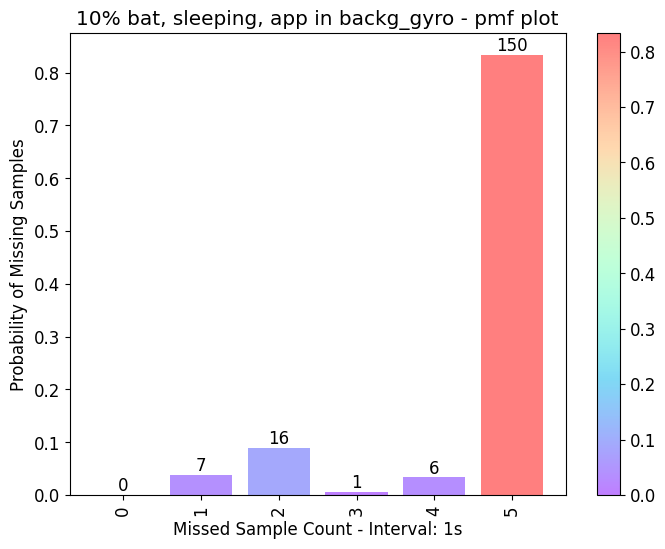

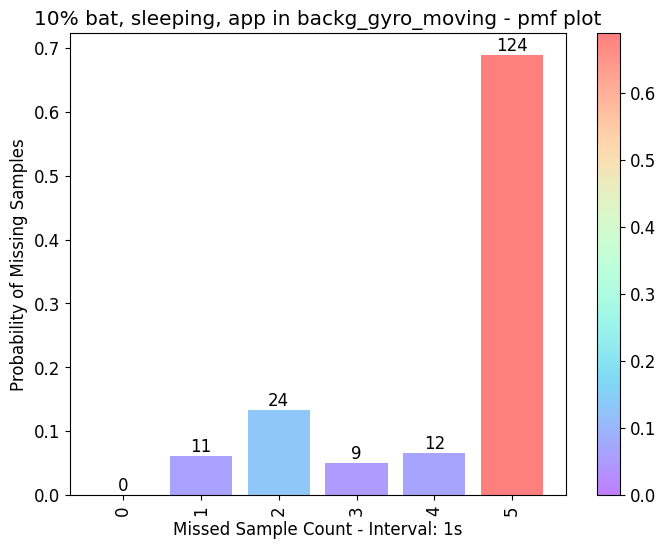

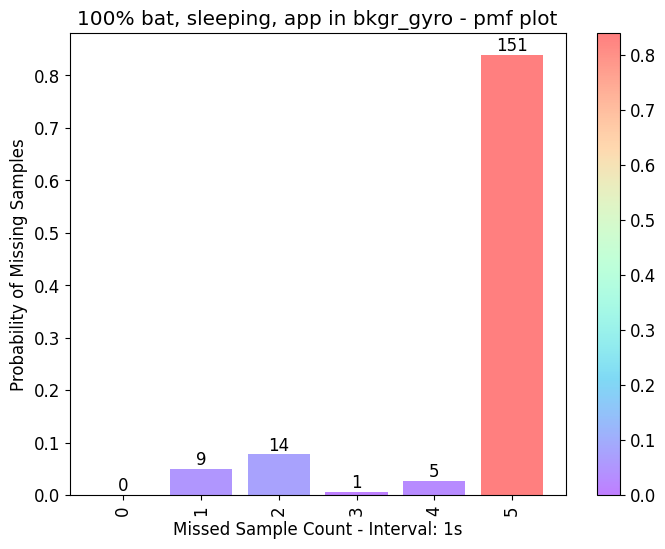

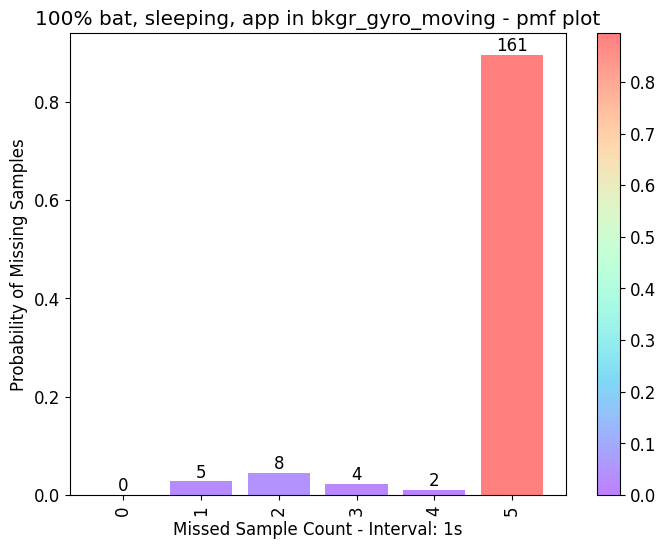

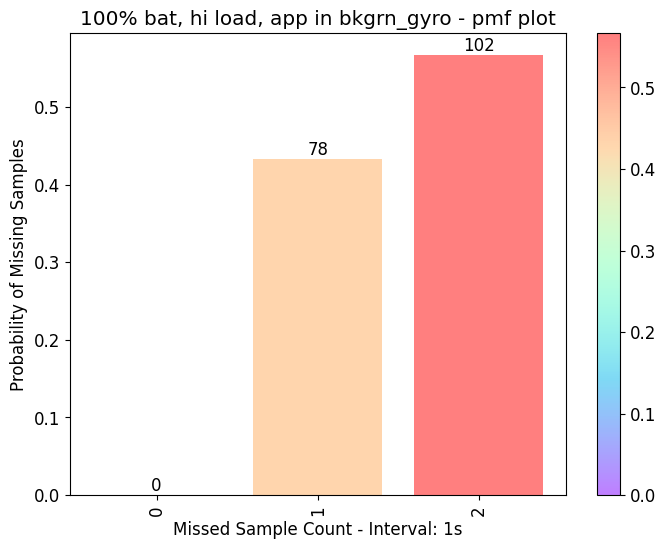

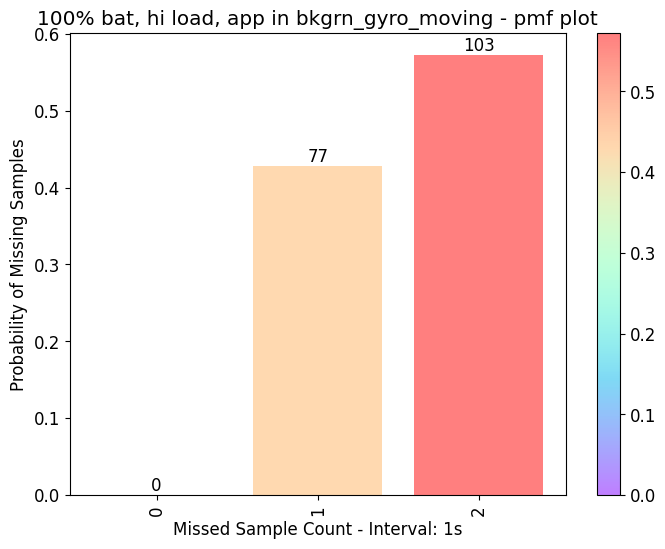

In [18]:
plt.rcParams['font.size'] = 12

obj1.plot_pmf(1)
obj2.plot_pmf(1)
obj3.plot_pmf(1)
obj4.plot_pmf(1)
obj5.plot_pmf(1)
obj6.plot_pmf(1)

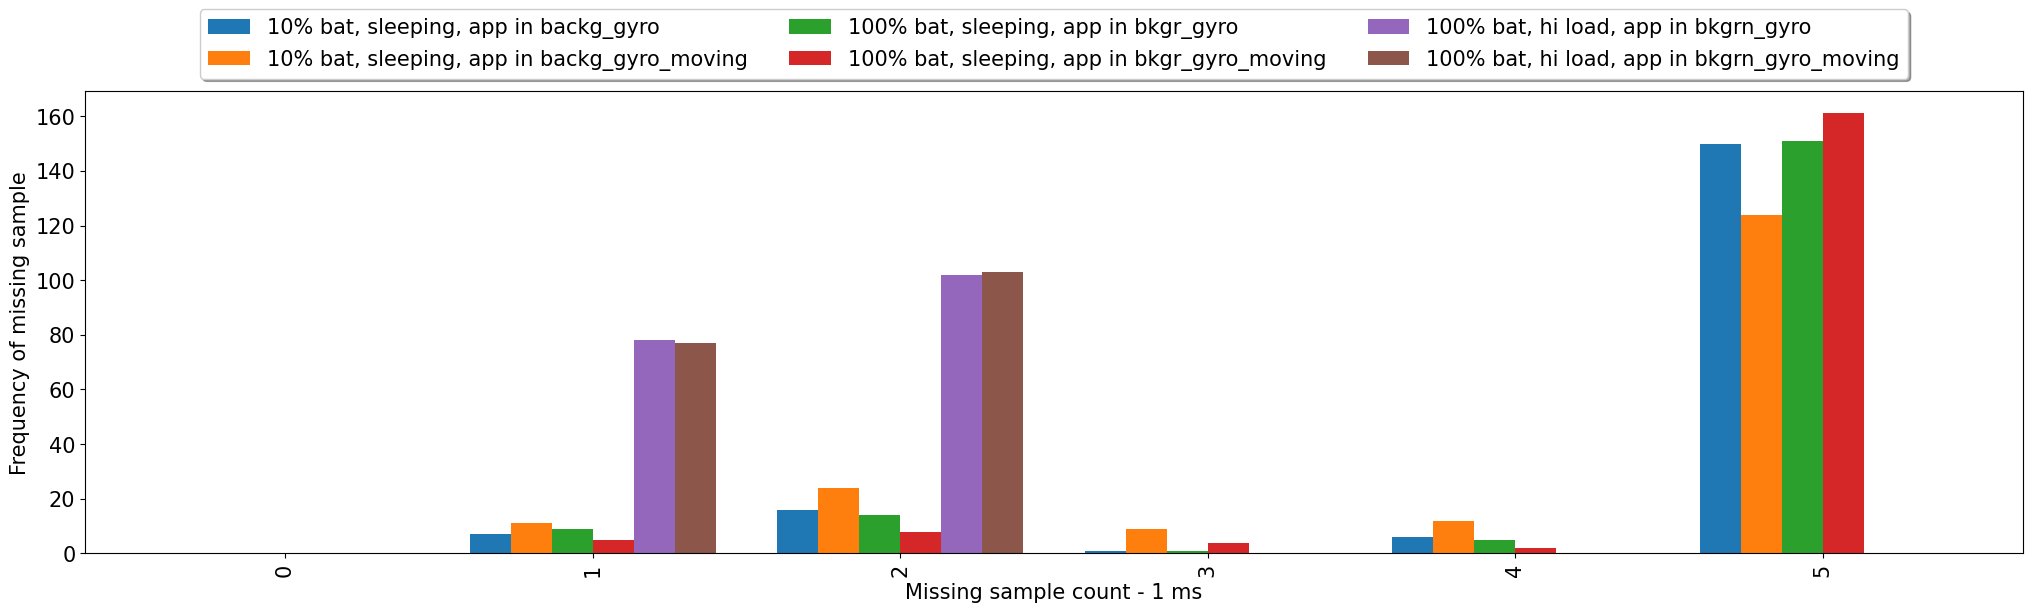

In [22]:
interval = 1
plt.rcParams['font.size'] = 15
combined_pd_freq = multiple_plot_missing_pmf_freq([obj1, obj2, obj3, obj4, obj5, obj6], interval)

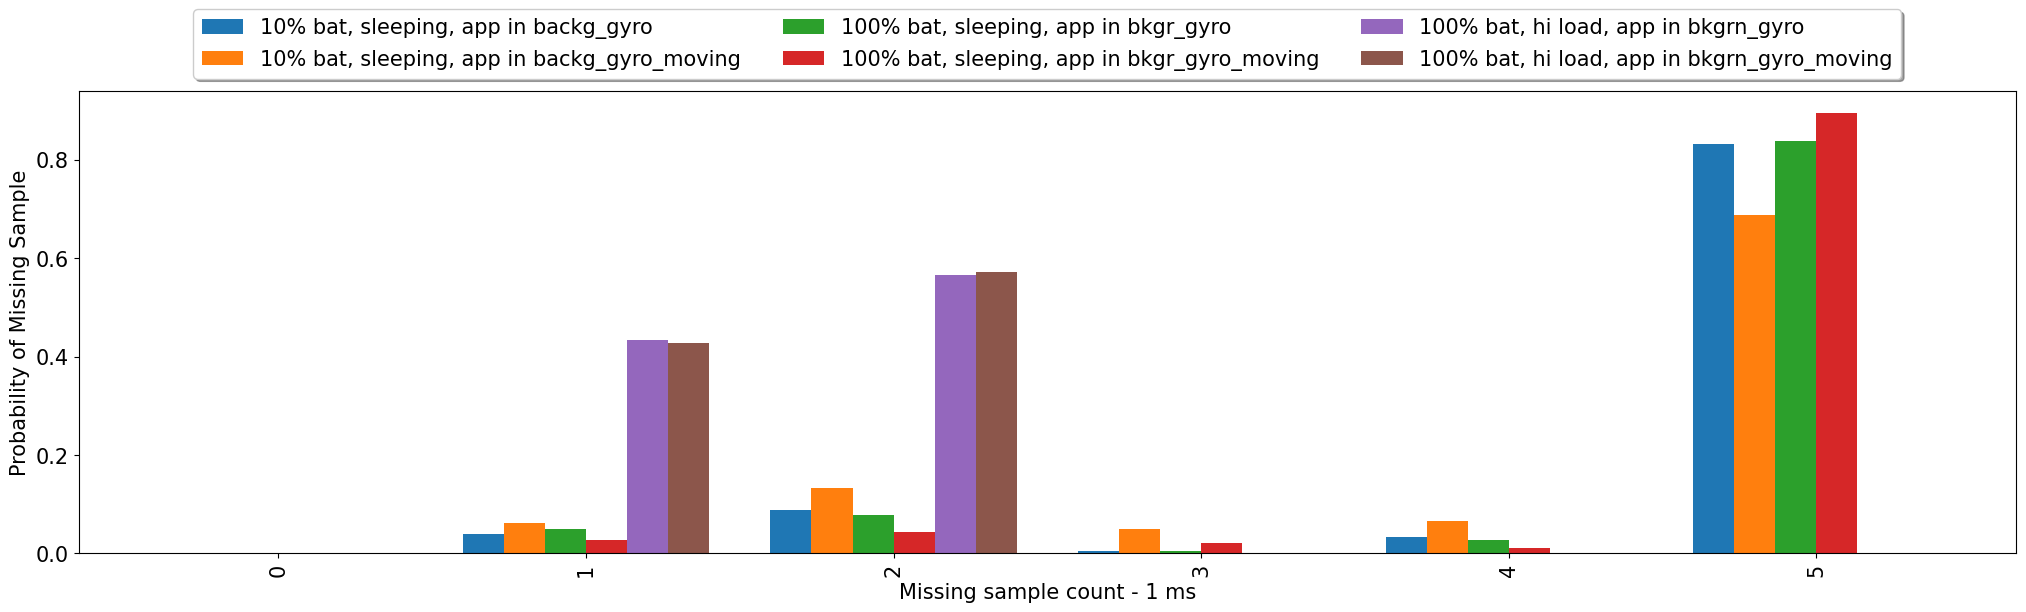

In [27]:
interval = 1
plt.rcParams['font.size'] = 15
combined_pd_freq = multiple_plot_missing_pmf([obj1, obj2, obj3, obj4, obj5, obj6], interval)

### Elapsed time

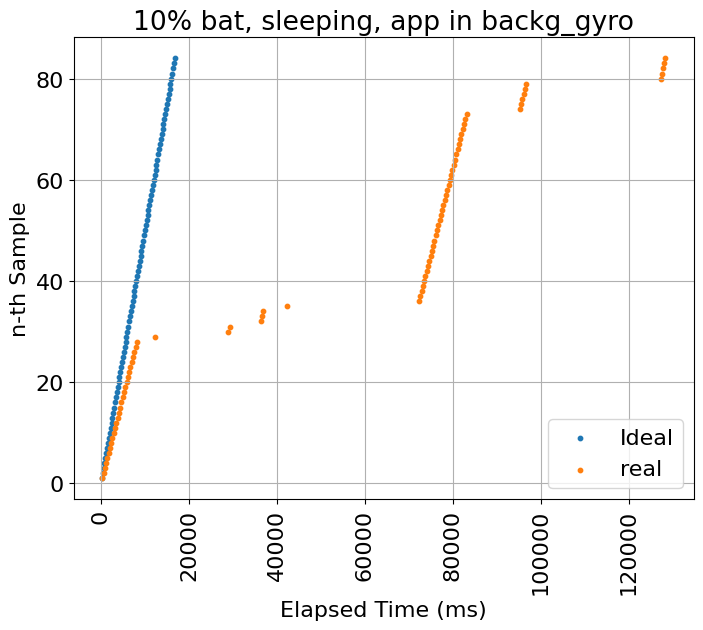

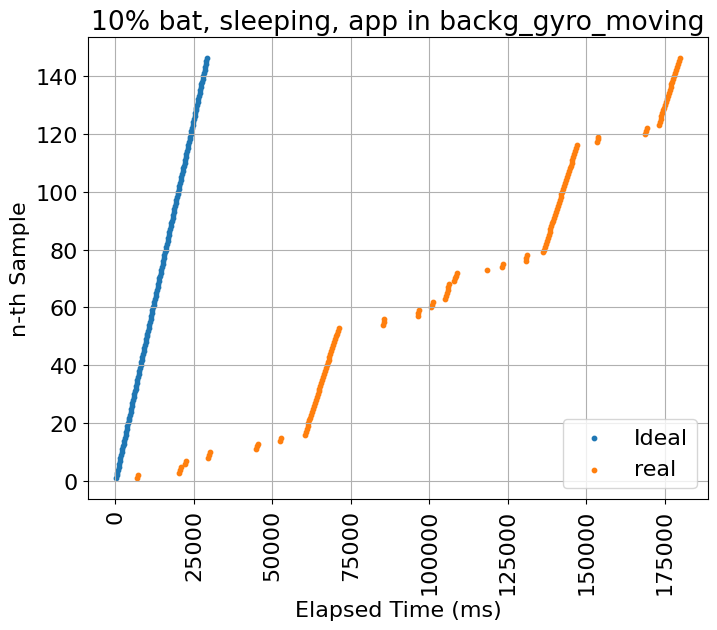

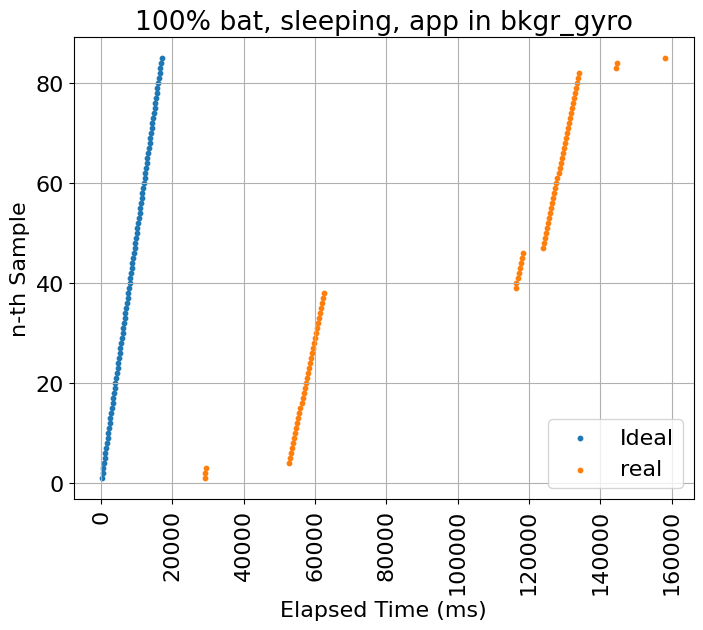

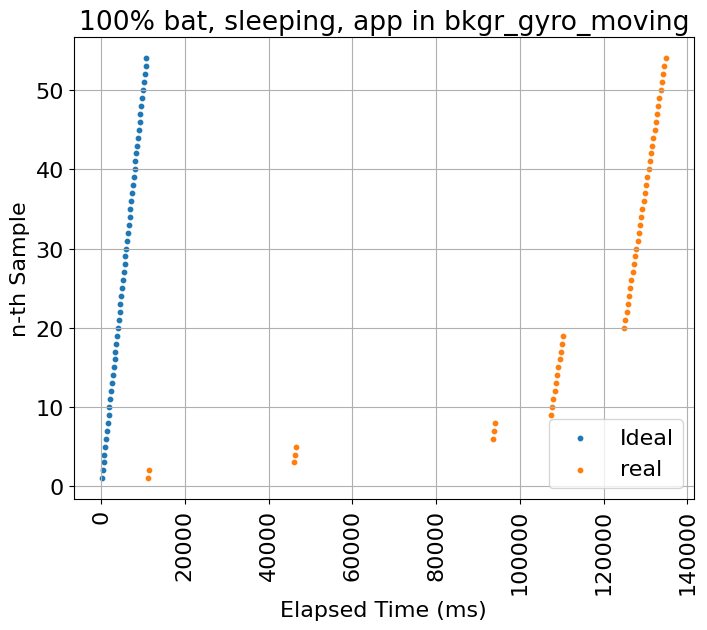

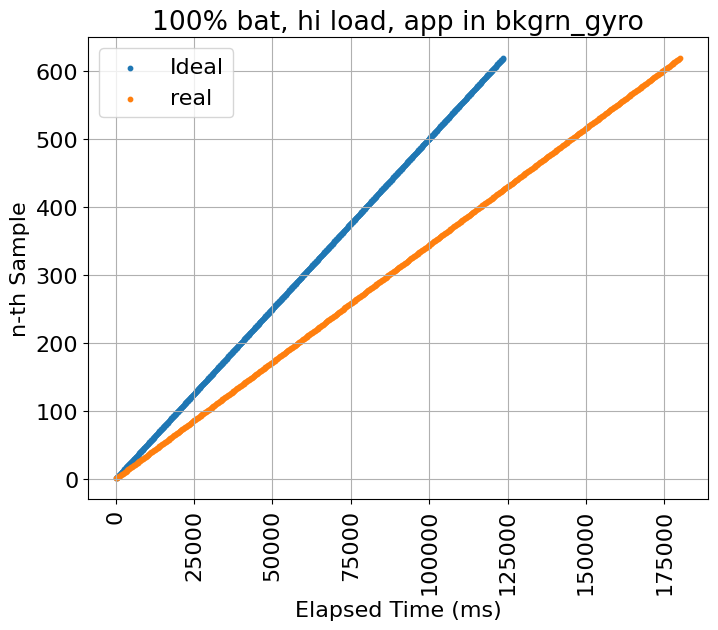

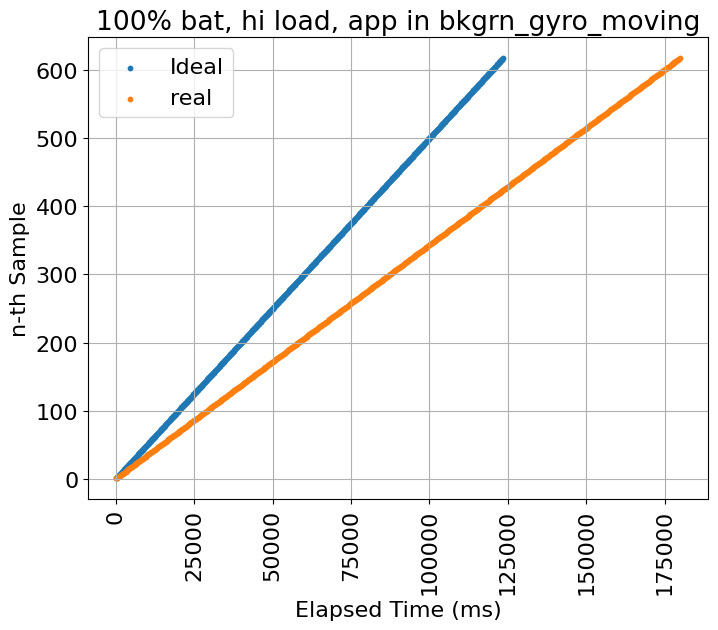

In [32]:
plt.rcParams['font.size'] = 16
plt.rcParams["figure.figsize"] = (8,6)

obj1.plot2()
obj2.plot2()
obj3.plot2()
obj4.plot2()
obj5.plot2()
obj6.plot2()

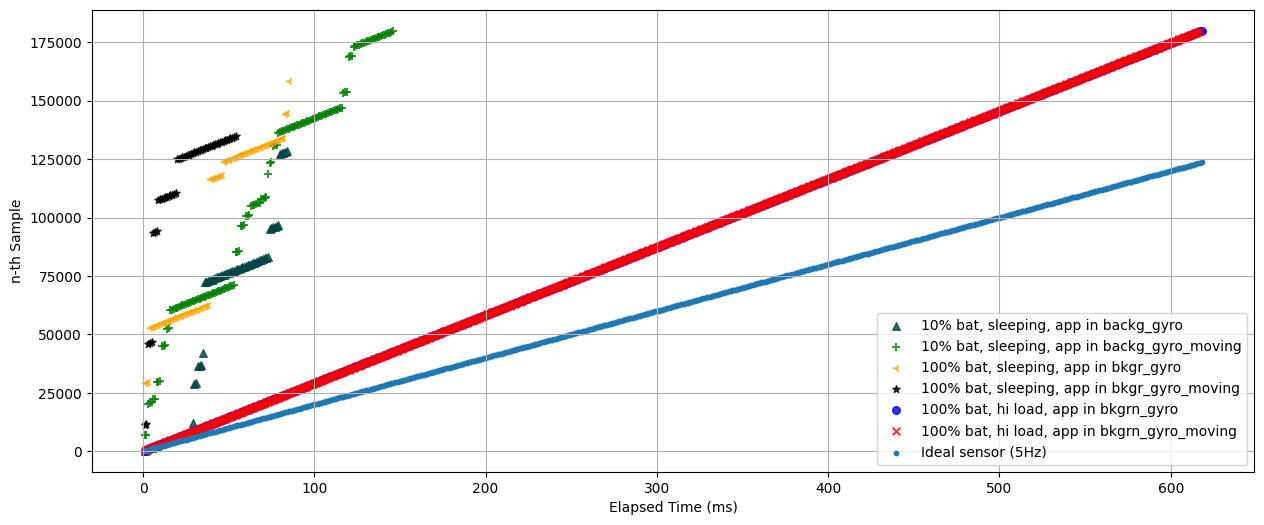

In [36]:
plt.rcdefaults()
plt.rcParams["figure.figsize"] = (15,6)
d = plot_sampling_period_cm([obj1, obj2, obj3, obj4, obj5, obj6])

### Sampling Period

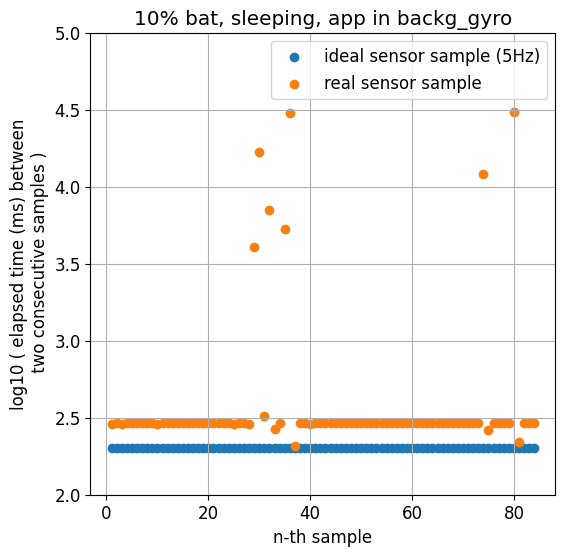

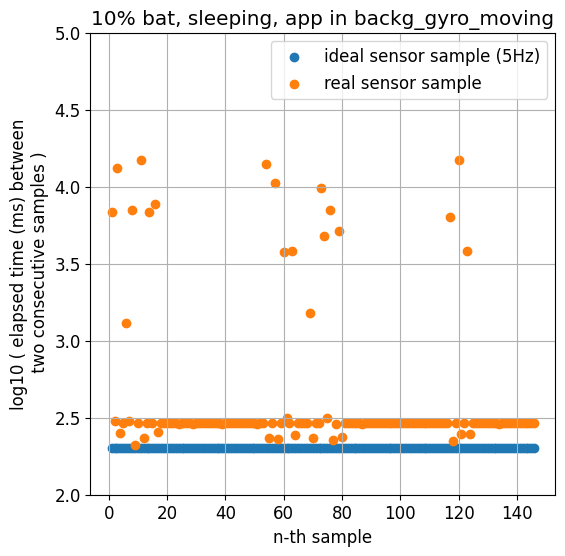

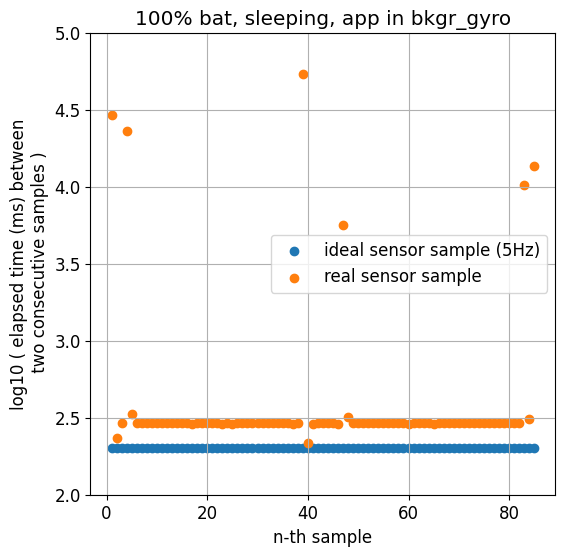

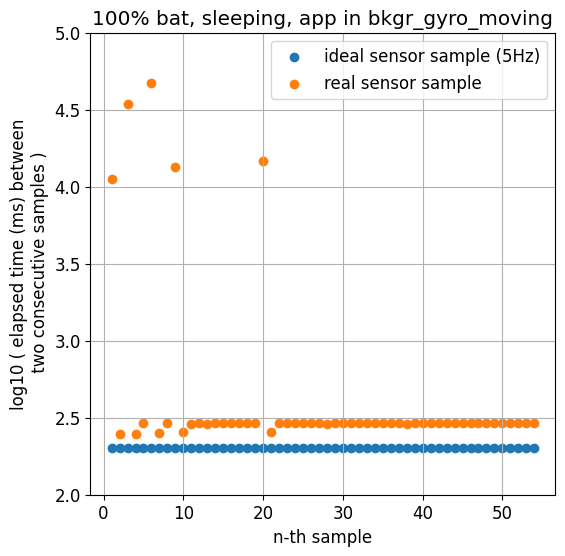

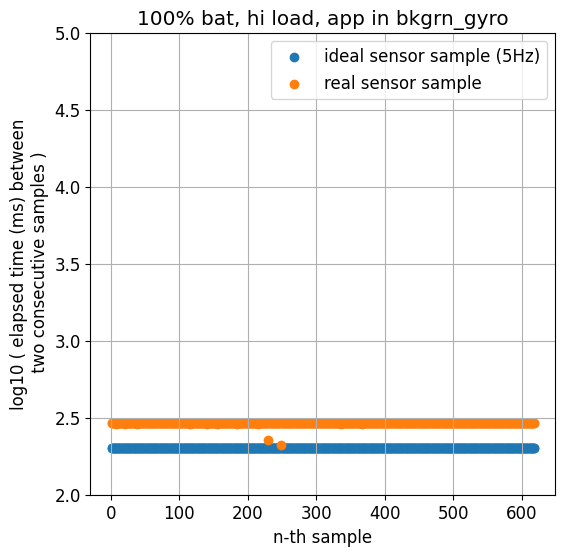

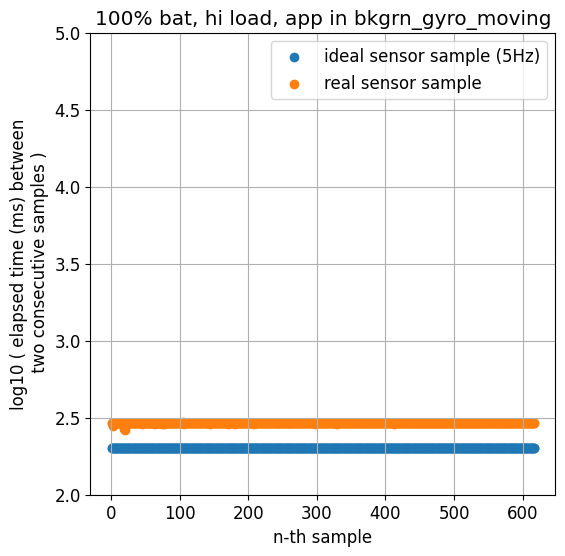

In [37]:
plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (6,6)

obj1.plot3_log()
obj2.plot3_log()
obj3.plot3_log()
obj4.plot3_log()
obj5.plot3_log()
obj6.plot3_log()

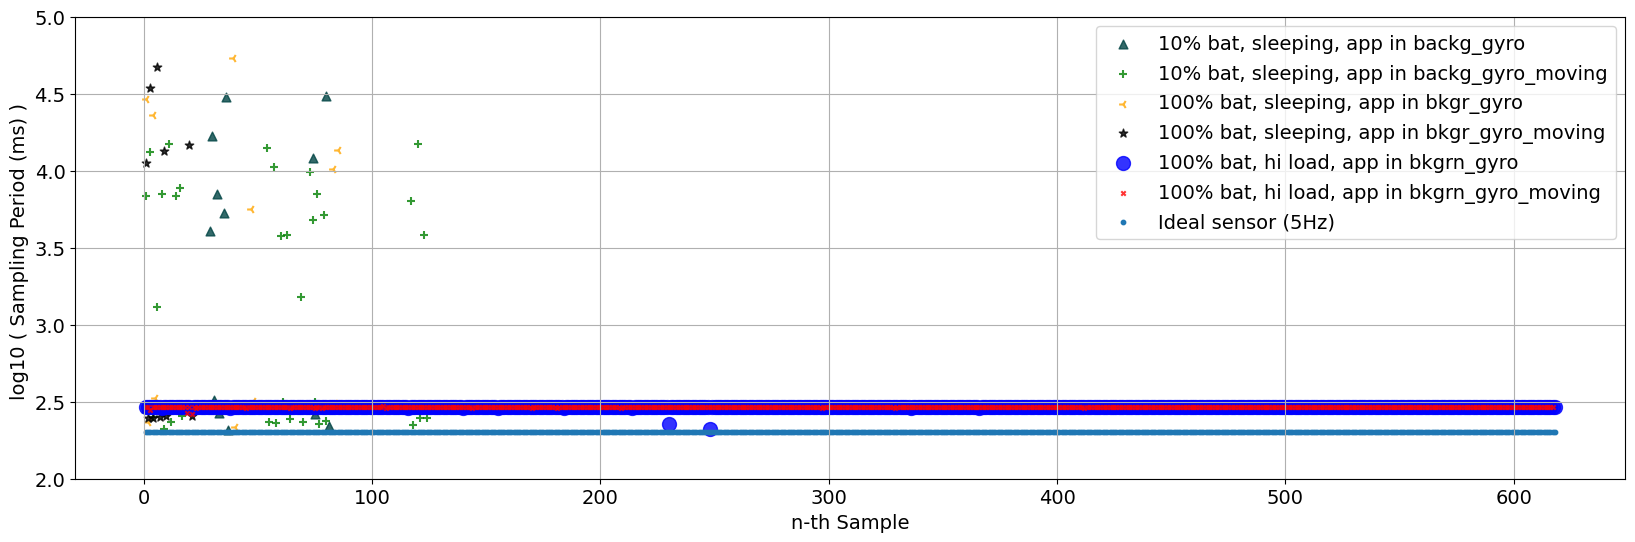

In [44]:
plt.rcdefaults()
plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = (20,6)
d = plot_sampling_period_log([obj1, obj2, obj3, obj4, obj5, obj6])

### Missing Interval plot

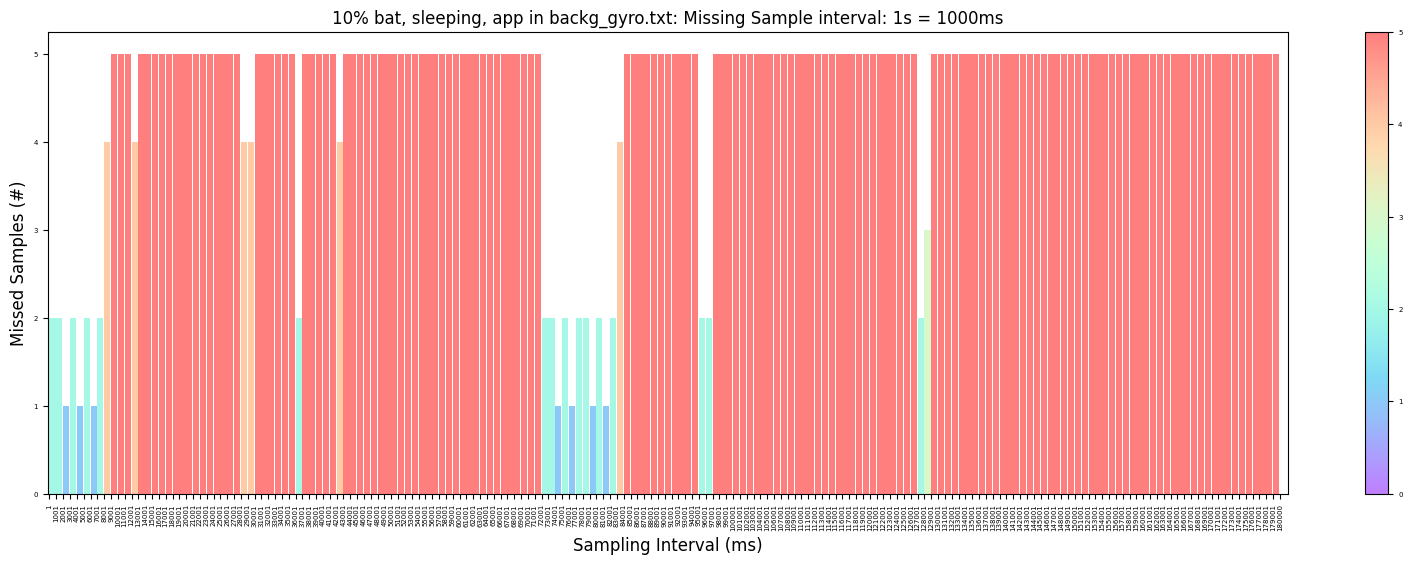

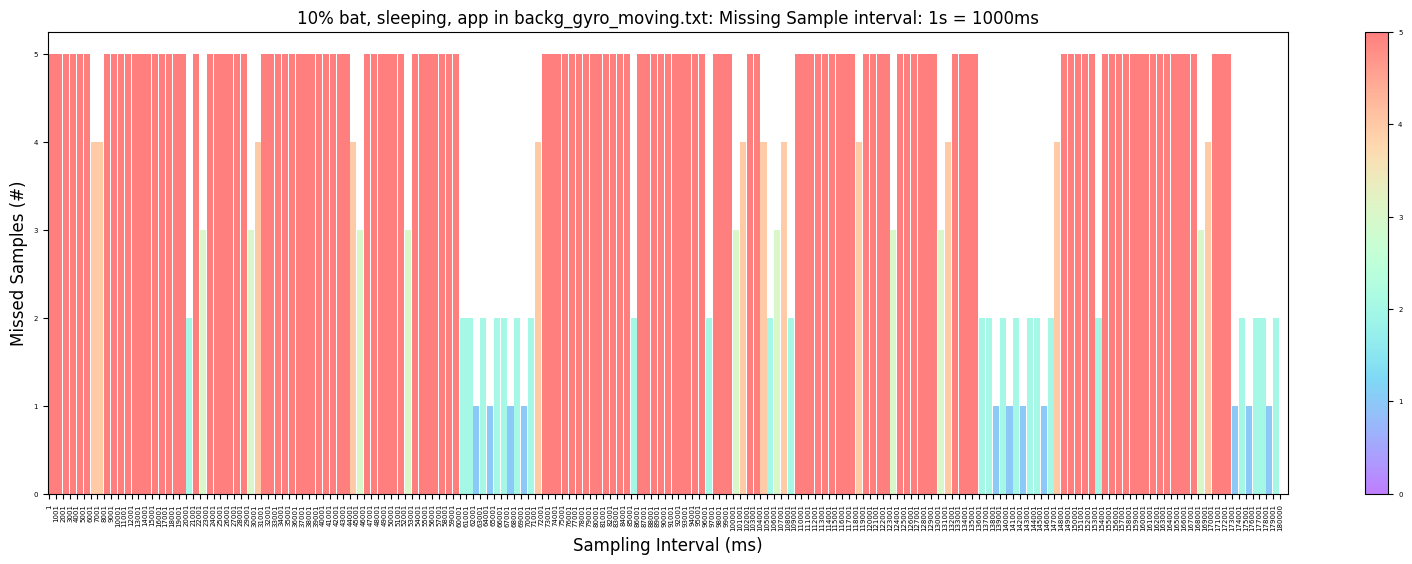

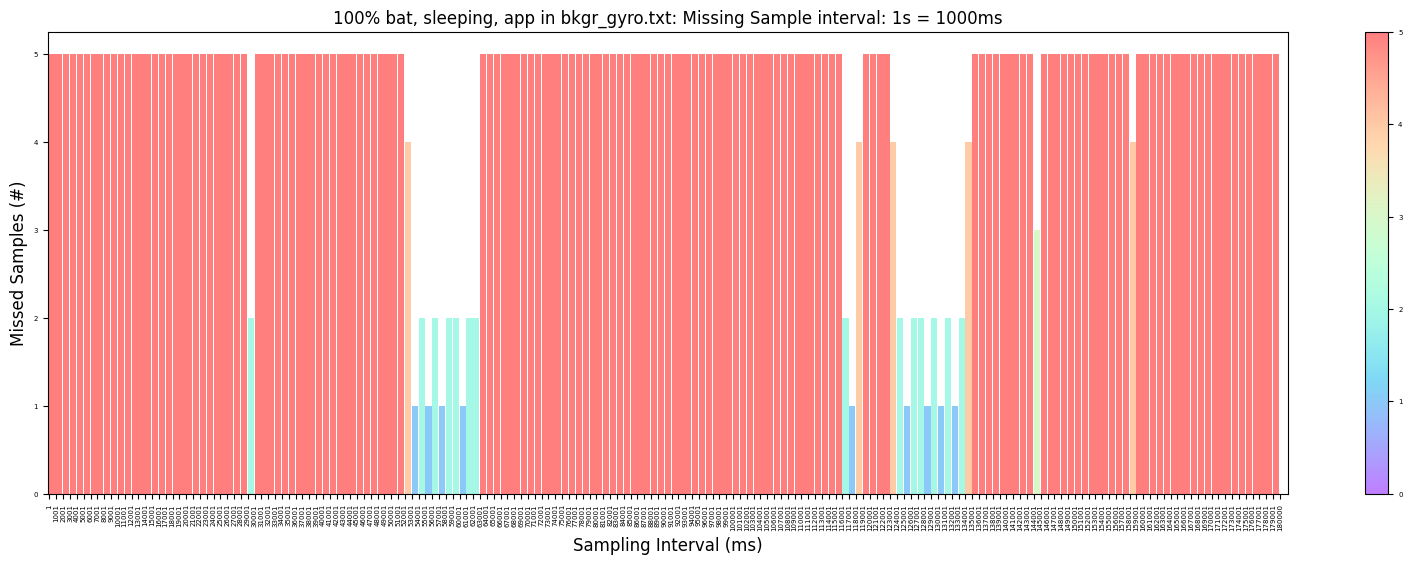

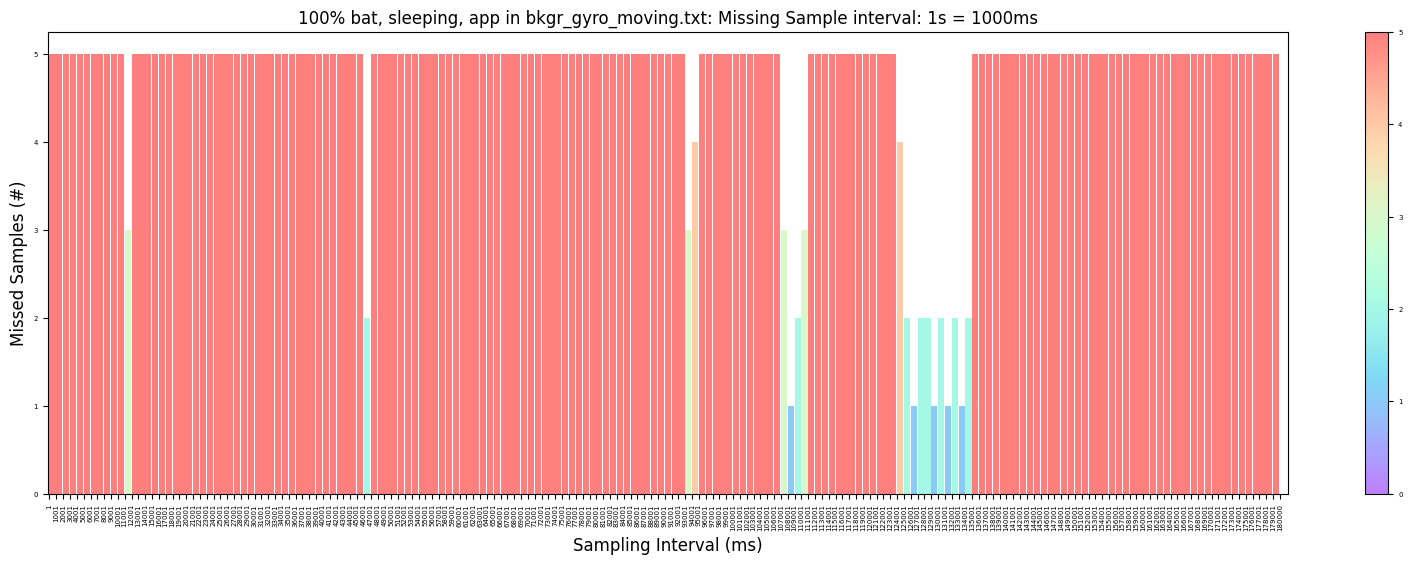

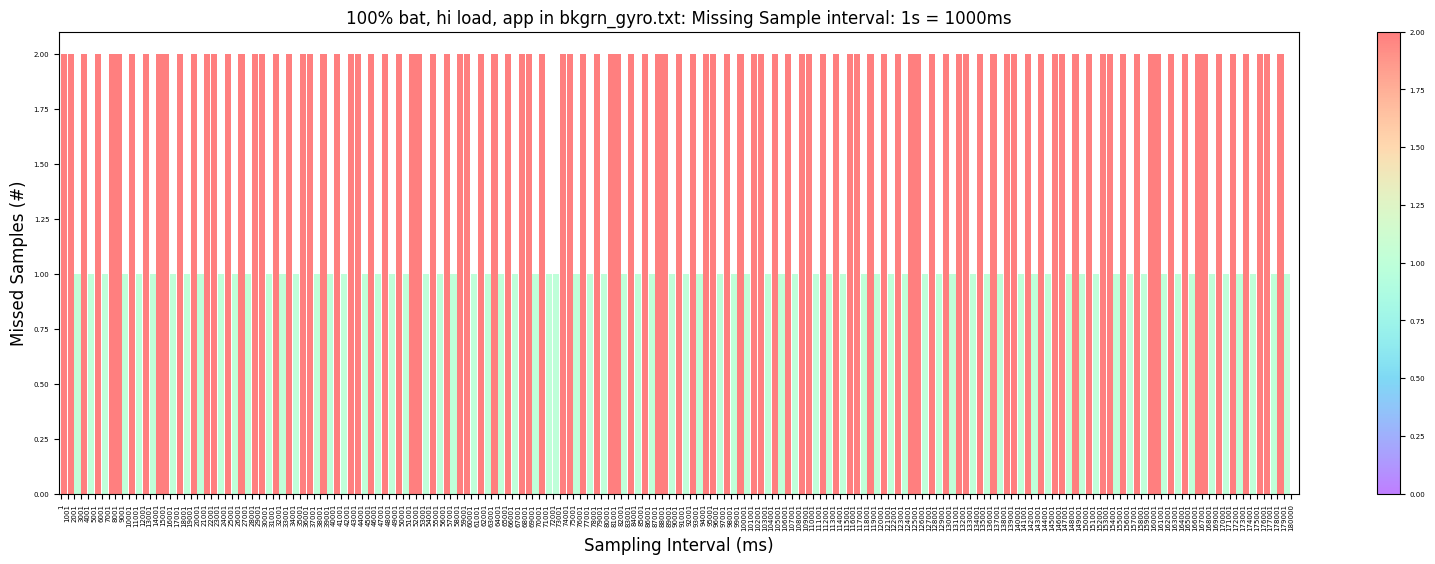

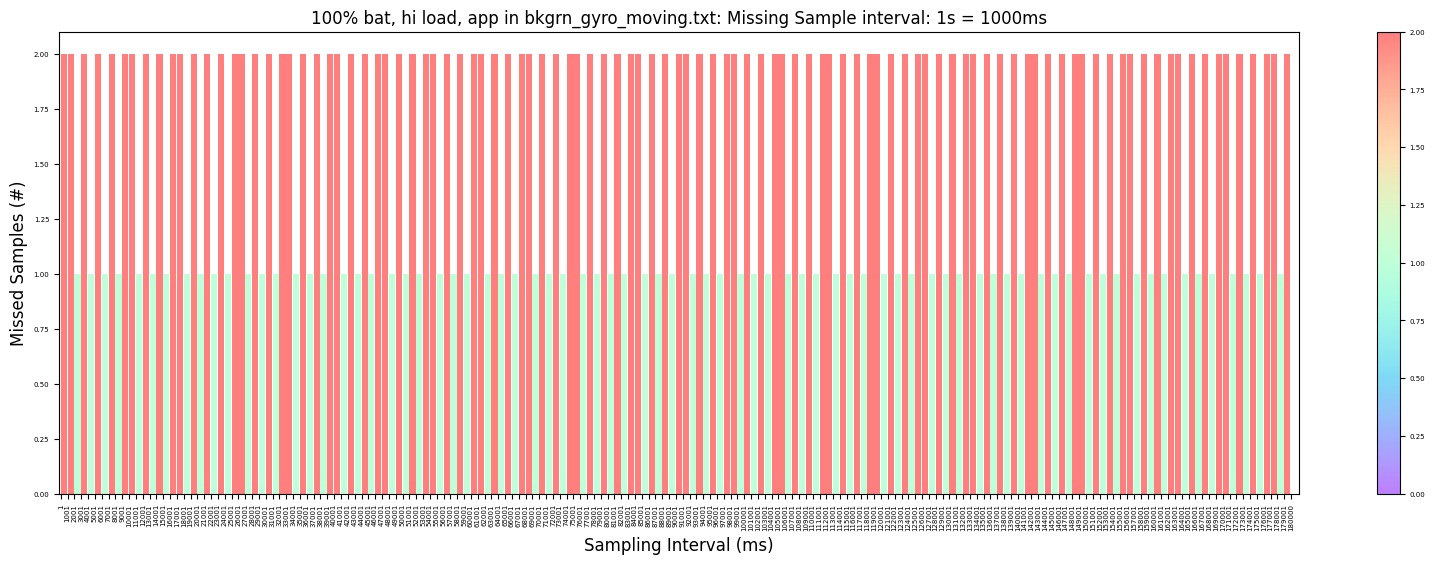

In [53]:
plt.rcParams['font.size'] = 5
obj1.plot_missing_intervals_color(1)
obj2.plot_missing_intervals_color(1)
obj3.plot_missing_intervals_color(1)
obj4.plot_missing_intervals_color(1)
obj5.plot_missing_intervals_color(1)
obj6.plot_missing_intervals_color(1)

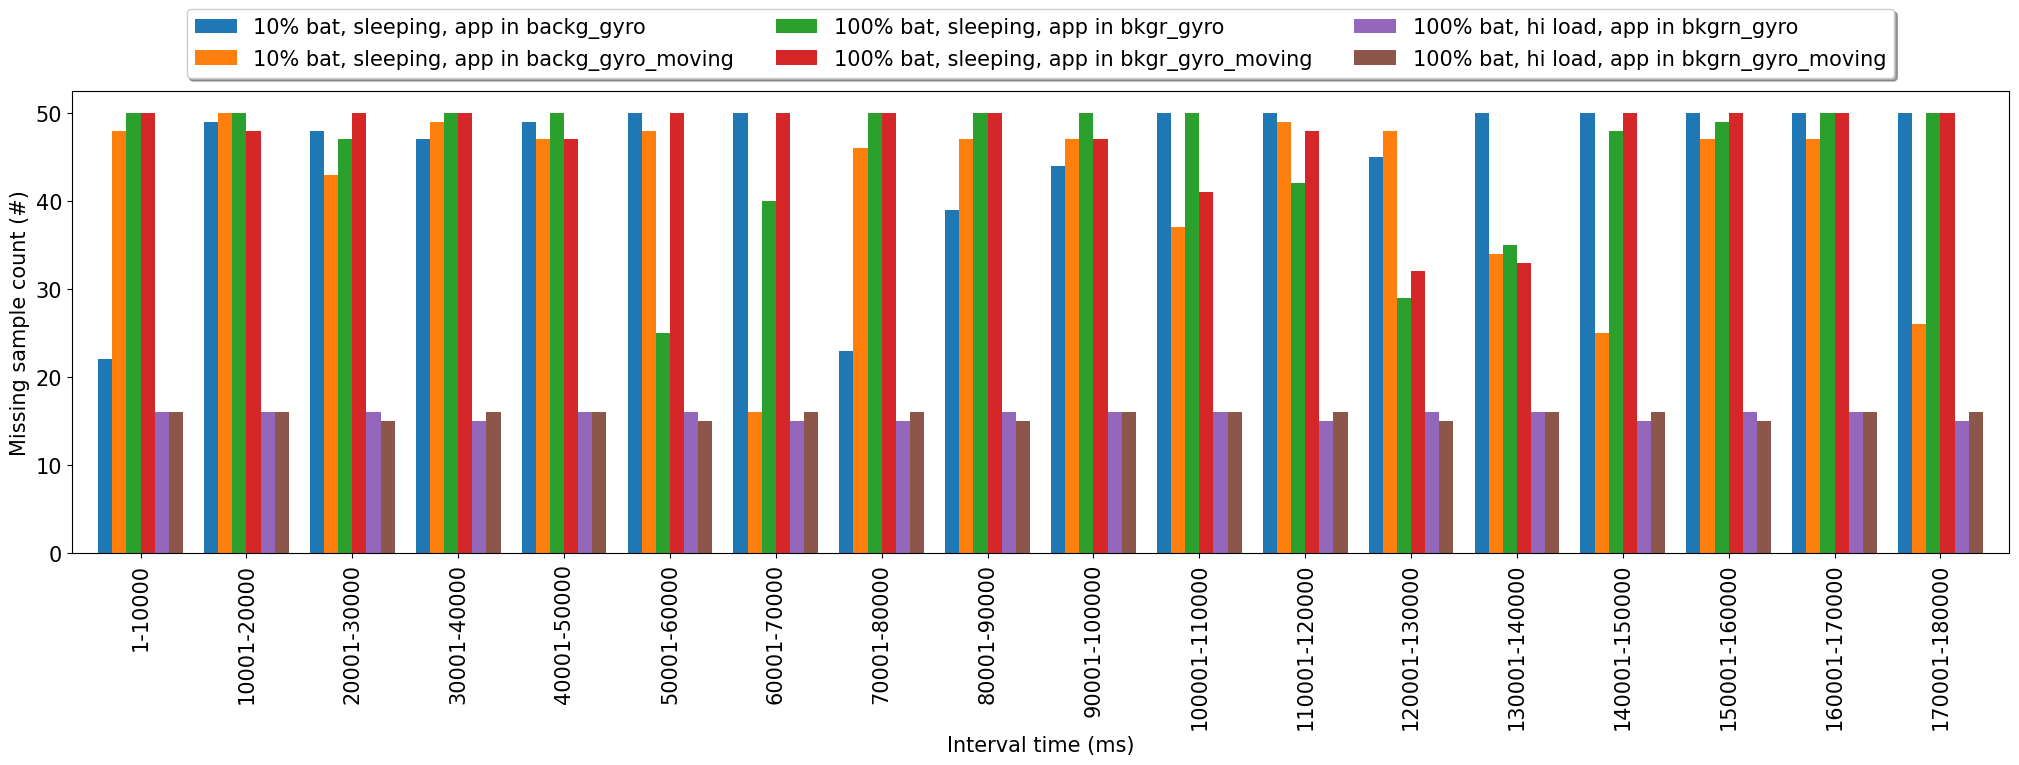

In [50]:
interval = 10
plt.rcParams['font.size'] = 15
combined_pd_freq = multiple_plot_missing_intervals([obj1, obj2, obj3, obj4, obj5, obj6], interval)

# Compare Accelerometer and Gyroscope